In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Dropping null columns with more than 50% missing values except the columns used for identifying high value customers

In [4]:
null_counts = pd.DataFrame(data.isnull().sum()).reset_index().sort_values(by = 0,ascending = False)

In [5]:
null_counts = null_counts[null_counts[0] > 0]

In [6]:
null_counts['Percent'] = round(null_counts[0]/len(data.index)*100,2)

In [7]:
null_counts

,index,0,Percent
189,arpu_3g_6,74846,74.85
197,night_pck_user_6,74846,74.85
161,total_rech_data_6,74846,74.85
193,arpu_2g_6,74846,74.85
165,max_rech_data_6,74846,74.85
217,fb_user_6,74846,74.85
177,av_rech_amt_data_6,74846,74.85
157,date_of_last_rech_data_6,74846,74.85
169,count_rech_2g_6,74846,74.85
173,count_rech_3g_6,74846,74.85


In [8]:
#Columns used for identifying high value customers
null_counts.loc[ (null_counts['index'] == 'total_rech_data_6' )| (null_counts['index'] == 'total_rech_data_7' )| (null_counts['index'] == 'total_rech_data_8' )| (null_counts['index'] == 'total_rech_data_9'
                    )| (null_counts['index'] == 'av_rech_amt_data_6' )| (null_counts['index'] == 'av_rech_amt_data_7' )| (null_counts['index'] == 'av_rech_amt_data_8' )| (null_counts['index'] == 'av_rech_amt_data_9'
                   )| (null_counts['index'] == 'total_rech_amt_6' )| (null_counts['index'] == 'total_rech_amt_7' )| (null_counts['index'] == 'total_rech_amt_8' )| (null_counts['index'] == 'total_rech_amt_9')]

,index,0,Percent
161,total_rech_data_6,74846,74.85
177,av_rech_amt_data_6,74846,74.85
162,total_rech_data_7,74428,74.43
178,av_rech_amt_data_7,74428,74.43
164,total_rech_data_9,74077,74.08
180,av_rech_amt_data_9,74077,74.08
163,total_rech_data_8,73660,73.66
179,av_rech_amt_data_8,73660,73.66


In [9]:
null_counts.loc[null_counts.Percent > 50,:]

,index,0,Percent
189,arpu_3g_6,74846,74.85
197,night_pck_user_6,74846,74.85
161,total_rech_data_6,74846,74.85
193,arpu_2g_6,74846,74.85
165,max_rech_data_6,74846,74.85
217,fb_user_6,74846,74.85
177,av_rech_amt_data_6,74846,74.85
157,date_of_last_rech_data_6,74846,74.85
169,count_rech_2g_6,74846,74.85
173,count_rech_3g_6,74846,74.85


In [10]:
Drop_Cols = list(null_counts.loc[null_counts.Percent > 50,'index'])

In [11]:
Drop_Cols.remove('total_rech_data_6')
Drop_Cols.remove('av_rech_amt_data_6')
Drop_Cols.remove('total_rech_data_7')
Drop_Cols.remove('av_rech_amt_data_7')
Drop_Cols.remove('total_rech_data_9')
Drop_Cols.remove('av_rech_amt_data_9')
Drop_Cols.remove('total_rech_data_8')
Drop_Cols.remove('av_rech_amt_data_8')

In [12]:
print(Drop_Cols)
print(len(Drop_Cols))
#Dropping 32 columns

['arpu_3g_6', 'night_pck_user_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8']
32


In [13]:
data.drop(Drop_Cols, axis=1,inplace=True)

In [14]:
#Dropping columns with single value for all rows, as they add no value
len(data.std_og_t2c_mou_9.value_counts().index)

1

In [15]:
single_val_cols = [x for x in data.columns if len(data[x].value_counts().index) == 1]

In [16]:
print(single_val_cols)
print(len(single_val_cols))
#dropping 16 columns

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
16


In [17]:
data.drop(single_val_cols,axis=1,inplace=True)

In [18]:
null_counts = null_counts.loc[null_counts.Percent <= 50]

In [19]:
null_counts

,index,0,Percent
136,ic_others_9,7745,7.75
68,std_og_mou_9,7745,7.75
64,std_og_t2c_mou_9,7745,7.75
132,isd_ic_mou_9,7745,7.75
120,std_ic_mou_9,7745,7.75
72,isd_og_mou_9,7745,7.75
76,spl_og_mou_9,7745,7.75
128,spl_ic_mou_9,7745,7.75
80,og_others_9,7745,7.75
88,loc_ic_t2t_mou_9,7745,7.75


## Imputing Missing values either with single value or with the top 'n' values according to their proportions/distribution

In [20]:
data['ic_others_9'].value_counts()

0.00      72018
0.06        566
0.10        518
0.08        495
0.13        364
0.11        325
0.18        310
0.16        309
0.21        309
0.05        307
0.25        295
0.01        273
0.23        259
0.15        257
0.31        242
0.28        237
0.33        236
0.26        236
0.20        232
0.43        223
0.38        215
0.41        204
0.36        202
0.46        200
0.30        195
0.51        190
0.48        190
0.53        187
0.40        154
0.03        152
          ...  
25.24         1
34.39         1
14.14         1
30.63         1
51.41         1
17.71         1
17.54         1
40.96         1
29.11         1
27.28         1
15.73         1
15.71         1
15.54         1
17.64         1
16.50         1
72.49         1
59.26         1
50.05         1
29.33         1
32.16         1
14.66         1
15.58         1
205.18        1
41.69         1
27.56         1
26.40         1
43.53         1
13.49         1
30.54         1
20.23         1
Name: ic_others_9, Lengt

In [21]:
data.loc[data.ic_others_9.isnull(),'ic_others_9'] = 0.0

In [22]:
data['std_og_mou_9'].value_counts()

0.00       31207
0.31          95
0.38          95
0.28          92
0.45          89
1.01          87
0.48          85
0.51          85
0.30          82
0.25          81
0.23          81
0.53          79
0.01          79
0.40          79
0.61          78
0.33          78
0.15          76
0.68          75
0.58          74
0.63          73
0.03          73
0.16          72
0.20          72
0.43          71
0.26          70
0.56          70
0.66          69
0.36          68
0.35          68
0.71          68
           ...  
73.79          1
38.35          1
899.06         1
974.78         1
528.41         1
2526.53        1
363.51         1
34.06          1
956.13         1
691.56         1
838.74         1
470.93         1
474.41         1
1122.89        1
471.48         1
600.73         1
421.19         1
356.81         1
1334.48        1
118.13         1
757.56         1
416.63         1
268.14         1
475.59         1
507.91         1
1626.81        1
62.31          1
86.31         

In [23]:
data.loc[data.std_og_mou_9.isnull(), 'std_og_mou_9'] = 0.0

In [24]:
data['isd_ic_mou_9'].value_counts()

0.00      76854
0.01        297
0.46        134
0.03        121
0.05        106
0.20         87
0.48         85
0.45         81
0.43         79
0.31         67
0.06         66
0.28         64
0.33         55
0.26         54
0.50         51
0.36         51
0.08         47
0.53         46
0.41         46
0.30         46
0.21         45
0.40         44
0.38         43
0.15         41
0.35         40
0.23         40
0.16         40
0.93         38
0.25         37
0.58         37
          ...  
90.19         1
107.81        1
133.21        1
110.46        1
120.44        1
23.70         1
115.15        1
39.31         1
338.96        1
106.01        1
63.23         1
27.51         1
125.96        1
452.28        1
0.79          1
104.61        1
26.73         1
33.08         1
208.96        1
960.74        1
355.63        1
216.74        1
36.74         1
5.14          1
41.13         1
82.73         1
30.26         1
101.59        1
10.34         1
56.43         1
Name: isd_ic_mou_9, Leng

In [25]:
data.loc[data.isd_ic_mou_9.isnull(),'isd_ic_mou_9'] = 0.0

In [26]:
data['std_ic_mou_9'].value_counts()

0.00      23711
0.41        185
0.33        180
0.31        176
0.26        175
0.25        171
0.03        170
0.18        163
0.28        157
0.36        155
0.21        151
0.51        148
0.23        148
0.56        148
0.48        143
0.43        142
0.35        138
0.38        137
0.76        136
0.20        136
0.40        133
0.46        133
0.11        130
0.93        127
0.30        126
0.58        126
0.66        125
0.01        123
0.16        122
0.91        117
          ...  
148.81        1
411.24        1
124.21        1
129.46        1
129.54        1
102.06        1
280.66        1
52.38         1
237.91        1
130.33        1
112.46        1
123.39        1
397.03        1
195.16        1
68.23         1
160.88        1
74.09         1
810.61        1
85.26         1
141.84        1
69.78         1
216.41        1
105.83        1
85.68         1
154.39        1
171.78        1
228.33        1
530.68        1
141.16        1
241.14        1
Name: std_ic_mou_9, Leng

In [27]:
data.loc[data.std_ic_mou_9.isnull(),'std_ic_mou_9'] = 0.0

In [28]:
data['isd_og_mou_9'].value_counts()

0.00      87950
0.01         99
1.01         98
0.03         75
0.05         68
0.06         67
0.20         61
0.16         58
0.15         57
0.11         56
0.25         55
0.08         54
0.26         54
0.21         54
0.23         51
0.33         50
0.18         49
0.13         48
0.28         46
0.30         46
0.35         46
0.10         44
0.41         43
0.31         43
2.01         42
0.40         41
0.43         39
0.36         38
0.46         37
0.38         35
          ...  
40.91         1
7.11          1
52.48         1
7.64          1
10.31         1
41.01         1
133.36        1
10.99         1
16.61         1
37.58         1
10.06         1
275.04        1
39.23         1
94.04         1
129.86        1
130.14        1
2.24          1
30.26         1
41.14         1
6.38          1
8.48          1
17.59         1
88.03         1
89.89         1
130.39        1
101.78        1
6.68          1
15.44         1
6.58          1
7.90          1
Name: isd_og_mou_9, Leng

In [29]:
data.loc[data.isd_og_mou_9.isnull(),'isd_og_mou_9'] = 0.0

In [30]:
data['spl_og_mou_9'].value_counts()

0.00      48710
0.01        349
0.03        302
0.21        267
0.06        262
0.05        230
0.10        216
0.63        210
0.38        205
0.08        202
0.16        193
0.40        187
0.68        182
0.11        180
0.61        179
0.43        177
0.66        177
0.70        175
0.20        174
0.15        172
0.36        167
0.46        164
0.78        162
0.71        162
0.81        161
0.73        160
0.58        160
0.48        159
0.13        158
0.86        155
          ...  
160.49        1
40.93         1
44.43         1
48.06         1
63.84         1
44.66         1
25.65         1
42.44         1
41.04         1
25.25         1
24.40         1
153.11        1
44.53         1
21.41         1
53.39         1
37.11         1
58.14         1
45.54         1
25.89         1
58.21         1
42.03         1
33.90         1
61.38         1
32.14         1
231.89        1
89.84         1
103.78        1
63.26         1
63.49         1
38.18         1
Name: spl_og_mou_9, Leng

In [31]:
data.loc[data.spl_og_mou_9.isnull(),'spl_og_mou_9'] = 0.0

In [32]:
data['spl_ic_mou_9'].value_counts()

0.00     67169
0.06      1292
0.08       989
0.05       974
0.25       887
0.10       854
0.11       826
0.21       655
0.13       643
0.16       575
0.15       472
0.18       441
0.46       431
0.50       427
0.48       424
1.61       411
0.23       411
0.28       409
0.36       366
0.33       349
0.26       348
0.31       344
0.43       340
0.20       324
0.03       323
0.51       312
0.38       300
0.53       295
0.56       257
0.41       251
         ...  
5.16         1
4.90         1
6.63         1
8.58         1
5.25         1
6.14         1
3.83         1
3.19         1
6.48         1
4.31         1
7.30         1
11.41        1
4.06         1
4.56         1
7.60         1
4.66         1
6.21         1
2.55         1
4.09         1
4.46         1
5.34         1
17.56        1
4.73         1
3.65         1
7.18         1
4.93         1
3.64         1
10.28        1
2.85         1
62.38        1
Name: spl_ic_mou_9, Length: 384, dtype: int64

In [33]:
data.loc[data.spl_ic_mou_9.isnull(),'spl_ic_mou_9'] = 0.0

In [34]:
data['loc_ic_t2t_mou_9'].value_counts()

0.00       11126
0.41         103
0.48          98
0.78          98
0.21          93
0.68          93
0.31          91
0.46          89
0.63          87
0.26          87
0.28          86
0.25          86
0.20          85
1.06          85
0.38          85
0.71          84
0.30          83
0.36          83
0.51          81
0.53          80
0.33          80
0.35          80
0.91          79
0.23          79
0.83          78
0.58          78
0.88          77
0.45          77
0.66          77
1.11          76
           ...  
3680.14        1
38.85          1
19.45          1
183.93         1
118.64         1
274.89         1
273.11         1
190.36         1
129.89         1
268.33         1
159.83         1
190.68         1
88.93          1
86.24          1
519.81         1
511.19         1
309.16         1
2556.28        1
112.36         1
1011.79        1
153.99         1
156.78         1
624.88         1
567.61         1
415.58         1
417.19         1
252.66         1
319.91        

In [35]:
data.loc[data.loc_ic_t2t_mou_9.isnull(),'loc_ic_t2t_mou_9'] = 0.0

In [36]:
data['og_others_9'].value_counts()

0.00      91832
0.16         17
0.18         11
0.66          8
0.98          7
0.36          7
0.60          6
0.33          5
0.01          5
0.70          4
0.85          4
0.28          4
0.61          4
0.71          4
1.06          4
0.53          4
2.26          4
0.35          4
0.15          4
0.03          4
0.83          4
0.10          4
1.45          4
0.05          4
1.18          4
0.81          4
0.76          4
0.50          4
0.63          3
0.68          3
          ...  
27.13         1
4.28          1
2.56          1
2.60          1
102.39        1
145.16        1
10.08         1
2.31          1
0.13          1
6.94          1
1.40          1
3.94          1
3.01          1
7.30          1
8.51          1
90.00         1
435.98        1
136.23        1
3.80          1
37.53         1
9.40          1
1.03          1
1.20          1
20.63         1
25.86         1
2.28          1
2.68          1
9.76          1
35.46         1
60.43         1
Name: og_others_9, Lengt

In [37]:
#Dropping the column as there is very less variance
data.drop('og_others_9',axis=1,inplace=True)

In [38]:
data['loc_ic_t2m_mou_9'].value_counts()

0.00       5339
0.38         40
0.36         37
0.56         37
0.53         36
0.21         36
0.51         35
0.28         34
0.26         33
0.46         33
0.66         33
2.23         33
0.23         32
4.41         32
1.21         31
1.68         31
2.51         31
0.41         31
1.01         31
1.98         30
0.63         29
0.71         28
3.08         28
0.68         28
1.58         28
0.33         28
0.20         28
0.78         28
3.36         28
0.93         28
           ... 
260.61        1
472.49        1
11.70         1
401.49        1
1491.18       1
228.16        1
345.19        1
300.21        1
836.11        1
498.36        1
488.61        1
146.36        1
241.91        1
407.88        1
396.64        1
360.64        1
668.06        1
655.38        1
910.54        1
335.73        1
420.41        1
244.03        1
255.26        1
465.49        1
768.66        1
455.28        1
373.83        1
180.34        1
390.76        1
241.34        1
Name: loc_ic_t2m_mou_9, 

In [39]:
data.loc[data.loc_ic_t2m_mou_9.isnull(),'loc_ic_t2m_mou_9'] = 0.0

In [40]:
data['std_ic_t2f_mou_9'].value_counts()

0.00      70927
0.31        184
0.25        158
0.21        157
0.26        156
0.33        149
0.23        141
0.36        140
0.30        139
0.41        138
0.38        135
0.51        127
0.43        127
0.28        123
0.10        122
0.16        119
0.46        119
0.35        118
0.56        118
0.20        111
0.45        111
0.40        111
0.48        109
0.13        107
0.53        106
0.18        103
0.58        103
0.11        102
0.50        102
0.73        100
          ...  
42.39         1
61.79         1
59.53         1
26.40         1
35.38         1
156.08        1
64.65         1
52.38         1
66.46         1
8.40          1
40.66         1
89.41         1
26.75         1
24.56         1
83.63         1
98.84         1
10.90         1
27.61         1
195.84        1
61.86         1
93.96         1
35.36         1
21.58         1
49.23         1
12.69         1
150.91        1
67.08         1
140.13        1
287.74        1
95.26         1
Name: std_ic_t2f_mou_9, 

In [41]:
data.loc[data.std_ic_t2f_mou_9.isnull(),'std_ic_t2f_mou_9'] = 0.0

In [42]:
data['loc_ic_t2f_mou_9'].value_counts()

0.00      35854
0.25        261
0.41        256
0.26        247
0.45        241
0.35        239
0.30        233
0.46        232
0.31        232
0.23        231
0.33        230
0.38        230
0.28        229
0.53        227
0.40        220
0.48        218
0.43        216
0.21        209
0.56        206
0.51        204
0.36        197
0.18        194
0.68        192
0.50        189
0.66        186
0.63        183
0.20        178
0.78        176
0.91        175
0.61        173
          ...  
121.06        1
113.66        1
196.99        1
195.83        1
71.49         1
99.86         1
143.06        1
285.88        1
57.26         1
326.66        1
70.39         1
102.11        1
190.61        1
221.39        1
24.89         1
67.26         1
101.74        1
54.24         1
65.61         1
9.50          1
46.76         1
231.49        1
263.41        1
186.71        1
116.46        1
116.04        1
185.84        1
192.41        1
114.54        1
429.51        1
Name: loc_ic_t2f_mou_9, 

In [43]:
data.loc[data.loc_ic_t2f_mou_9.isnull(),'loc_ic_t2f_mou_9'] = 0.0

In [44]:
data['loc_ic_mou_9'].value_counts()

0.00       4387
0.53         30
0.23         26
0.26         26
0.36         26
0.21         24
0.45         24
1.21         24
0.28         24
0.93         24
0.76         23
0.41         23
0.51         23
0.68         22
1.58         22
0.56         22
0.38         22
0.66         22
2.01         22
0.61         21
0.46         21
1.18         21
0.73         20
0.31         20
0.60         19
2.11         19
0.58         19
0.33         19
1.38         19
0.43         19
           ... 
646.14        1
405.74        1
378.39        1
382.03        1
1186.34       1
850.83        1
492.86        1
495.14        1
368.71        1
844.61        1
719.39        1
356.84        1
386.79        1
226.78        1
377.64        1
263.43        1
493.34        1
446.69        1
604.33        1
463.08        1
425.06        1
520.79        1
300.23        1
519.93        1
2140.09       1
120.33        1
361.33        1
435.38        1
1396.74       1
965.36        1
Name: loc_ic_mou_9, Leng

In [45]:
data.loc[data.loc_ic_mou_9.isnull(),'loc_ic_mou_9'] = 0.0

In [46]:
data['std_ic_t2m_mou_9'].value_counts()

0.00      34357
0.03        212
0.26        187
0.33        185
0.41        168
0.31        167
0.51        164
0.25        163
0.35        161
0.36        159
0.46        154
0.18        152
0.40        152
0.28        149
0.01        148
0.43        148
0.48        147
0.23        146
0.56        146
0.21        144
0.30        144
0.38        142
0.05        139
0.68        136
0.53        133
0.58        133
0.50        130
0.20        130
0.66        129
0.16        129
          ...  
233.19        1
156.51        1
292.13        1
109.64        1
109.86        1
470.08        1
271.56        1
102.79        1
85.49         1
105.36        1
47.51         1
223.58        1
27.45         1
124.51        1
124.99        1
84.86         1
360.49        1
22.90         1
333.56        1
456.64        1
82.89         1
82.61         1
43.91         1
114.84        1
167.08        1
171.76        1
176.03        1
179.26        1
133.66        1
92.04         1
Name: std_ic_t2m_mou_9, 

In [47]:
data.loc[data.std_ic_t2m_mou_9.isnull(),'std_ic_t2m_mou_9'] = 0.0

In [48]:
data['std_og_t2f_mou_9'].value_counts()

0.00      81852
0.25         78
0.33         55
0.28         54
0.26         53
0.68         53
0.55         53
0.53         52
0.18         52
0.11         52
0.38         51
0.41         51
0.46         51
0.48         51
0.43         50
0.30         49
0.51         48
0.03         48
0.50         48
0.23         47
0.61         47
0.71         46
0.45         46
0.36         45
0.10         45
0.21         44
0.86         44
0.78         44
1.01         44
0.56         43
          ...  
63.91         1
75.96         1
82.79         1
56.68         1
57.34         1
56.33         1
88.49         1
47.55         1
54.94         1
32.49         1
15.71         1
37.36         1
92.29         1
49.78         1
70.94         1
32.48         1
50.63         1
16.39         1
42.11         1
42.39         1
30.28         1
114.79        1
67.38         1
50.14         1
49.66         1
73.66         1
49.34         1
39.01         1
11.81         1
23.81         1
Name: std_og_t2f_mou_9, 

In [49]:
data.loc[data.std_og_t2f_mou_9.isnull(),'std_og_t2f_mou_9'] = 0.0

In [50]:
data['std_og_t2t_mou_9'].value_counts()

0.00       51977
0.51          62
0.48          60
0.58          58
0.38          57
0.71          56
0.31          56
0.78          54
0.33          54
0.46          54
1.01          53
0.30          52
0.61          52
0.21          51
0.63          51
0.35          51
0.41          51
1.06          50
0.36          49
0.91          48
0.73          46
0.45          46
0.01          45
0.43          45
0.66          45
0.55          45
0.60          44
0.96          44
0.26          43
0.23          43
           ...  
278.29         1
585.43         1
213.14         1
295.44         1
154.48         1
46.89          1
1259.08        1
1110.41        1
223.34         1
306.14         1
1878.68        1
483.56         1
72.61          1
463.33         1
54.48          1
217.08         1
526.44         1
320.78         1
528.03         1
334.29         1
466.11         1
465.89         1
110.34         1
291.18         1
310.68         1
308.91         1
431.24         1
292.16        

In [51]:
data.loc[data.std_og_t2t_mou_9.isnull(),'std_og_t2t_mou_9'] = 0.0

In [52]:
data['std_ic_t2t_mou_9'].value_counts()

0.00      53636
0.03        349
0.01        222
0.05        215
0.28        173
0.06        165
0.31        161
0.36        160
0.21        157
0.41        156
0.26        152
0.23        146
0.18        139
0.48        138
0.11        134
0.43        132
0.53        132
0.51        132
0.20        132
0.15        132
0.16        131
0.38        126
0.33        126
0.35        125
0.30        124
0.13        123
0.08        121
0.46        121
0.25        120
0.56        119
          ...  
55.51         1
54.51         1
190.81        1
145.41        1
107.01        1
75.49         1
76.28         1
171.66        1
424.34        1
132.93        1
80.98         1
54.24         1
355.43        1
46.99         1
67.51         1
135.49        1
59.01         1
192.51        1
114.29        1
308.58        1
630.06        1
101.68        1
94.03         1
122.56        1
42.18         1
49.54         1
40.71         1
122.24        1
53.69         1
125.41        1
Name: std_ic_t2t_mou_9, 

In [53]:
data.loc[data.std_ic_t2t_mou_9.isnull(),'std_ic_t2t_mou_9'] = 0.0

In [54]:
data['loc_og_mou_9'].value_counts()

0.00       8739
0.03         47
0.01         43
1.01         39
0.26         38
0.21         38
0.43         37
0.68         37
0.88         34
0.36         34
0.51         34
1.83         33
0.46         33
0.63         32
0.23         32
0.98         32
0.56         32
1.68         31
1.06         31
0.48         31
0.66         31
0.33         31
0.31         31
0.25         31
0.93         30
1.41         30
0.45         30
0.40         30
3.36         30
0.53         30
           ... 
2094.04       1
314.81        1
842.53        1
675.16        1
731.64        1
287.08        1
539.68        1
223.63        1
577.24        1
1231.88       1
568.03        1
861.44        1
3860.68       1
582.83        1
291.58        1
198.29        1
293.14        1
370.36        1
411.39        1
281.14        1
114.71        1
517.41        1
167.16        1
358.99        1
413.83        1
247.44        1
356.49        1
1621.81       1
235.89        1
510.06        1
Name: loc_og_mou_9, Leng

In [55]:
data.loc[data.loc_og_mou_9.isnull(),'loc_og_mou_9'] = 0.0

In [56]:
data['roam_og_mou_9'].value_counts()

0.00      79359
0.21         47
1.01         35
0.43         32
0.26         28
0.01         26
0.63         24
0.13         24
0.16         24
0.56         23
0.20         23
0.18         22
0.48         21
1.21         21
0.30         21
0.38         21
0.73         20
0.31         20
1.03         20
0.58         20
0.86         20
0.76         20
0.15         20
0.61         19
0.35         19
0.03         19
0.46         19
0.65         19
0.40         19
0.70         18
          ...  
92.13         1
155.19        1
99.23         1
108.68        1
20.54         1
110.28        1
27.19         1
750.21        1
54.64         1
106.31        1
183.38        1
91.21         1
70.83         1
98.36         1
178.94        1
197.04        1
606.64        1
72.39         1
4.10          1
193.39        1
10.75         1
6.94          1
52.63         1
42.60         1
19.39         1
22.40         1
97.76         1
204.04        1
71.33         1
125.41        1
Name: roam_og_mou_9, Len

In [57]:
data.loc[data.roam_og_mou_9.isnull(),'roam_og_mou_9'] = 0.0

In [58]:
data['loc_og_t2m_mou_9'].value_counts()

0.00      9833
0.45        51
0.36        50
0.66        50
0.53        49
0.48        49
0.26        49
1.01        48
0.01        48
0.31        48
0.68        48
0.35        47
0.91        47
0.78        47
0.71        47
0.03        45
0.73        44
2.33        44
0.23        44
1.26        43
0.40        43
1.61        43
1.03        42
0.46        41
0.56        41
1.46        41
1.36        41
0.38        41
1.28        40
0.61        40
          ... 
136.91       1
394.08       1
233.38       1
218.99       1
189.01       1
317.59       1
841.99       1
366.66       1
159.83       1
530.86       1
179.66       1
312.38       1
664.66       1
232.76       1
181.08       1
226.11       1
225.89       1
478.63       1
337.11       1
274.89       1
538.18       1
229.34       1
47.41        1
673.16       1
358.44       1
56.84        1
328.99       1
200.96       1
246.48       1
368.54       1
Name: loc_og_t2m_mou_9, Length: 20141, dtype: int64

In [59]:
data.loc[data.loc_og_t2m_mou_9.isnull(),'loc_og_t2m_mou_9'] = 0.0

In [60]:
data['loc_og_t2f_mou_9'].value_counts()

0.00      54667
0.38        217
0.26        200
0.31        199
0.28        197
0.23        196
0.51        190
0.56        189
0.33        184
0.21        183
0.41        177
0.58        176
0.40        174
0.36        172
0.46        172
0.45        171
0.43        171
0.53        170
0.30        167
0.35        166
0.25        166
0.61        165
0.48        161
0.73        161
0.68        159
0.66        158
0.63        156
0.16        154
0.60        153
0.71        150
          ...  
46.76         1
55.83         1
90.16         1
57.44         1
30.23         1
122.79        1
69.94         1
19.69         1
50.09         1
90.66         1
95.46         1
46.74         1
29.21         1
53.36         1
60.31         1
90.84         1
31.41         1
221.64        1
47.59         1
97.79         1
174.19        1
50.08         1
71.04         1
65.66         1
29.43         1
25.08         1
101.68        1
116.46        1
128.51        1
23.81         1
Name: loc_og_t2f_mou_9, 

In [61]:
data.loc[data.loc_og_t2f_mou_9.isnull(),'loc_og_t2f_mou_9'] = 0.0

In [62]:
data['roam_ic_mou_9'].value_counts()

0.00       79116
1.01          60
0.03          34
1.03          33
0.68          32
0.86          31
0.26          31
0.71          31
0.08          31
0.05          31
0.41          31
0.40          30
0.33          30
0.36          29
0.48          28
0.46          28
0.23          28
0.20          28
0.81          27
0.56          27
0.91          27
0.93          27
0.98          27
0.43          27
0.55          26
0.61          26
0.53          26
1.61          26
0.45          26
0.30          26
           ...  
34.91          1
34.09          1
41.61          1
167.28         1
329.98         1
36.03          1
19.20          1
58.14          1
63.09          1
180.98         1
106.01         1
1206.94        1
48.68          1
52.31          1
237.81         1
64.79          1
142.03         1
367.84         1
39.91          1
70.11          1
28.24          1
56.11          1
37.13          1
38.28          1
1288.86        1
56.69          1
499.44         1
248.04        

In [63]:
data.loc[data.roam_ic_mou_9.isnull(),'roam_ic_mou_9'] = 0.0

In [64]:
data['offnet_mou_9'].value_counts()

0.00       5216
0.03         48
1.01         46
0.18         43
0.31         38
0.26         36
0.01         35
0.21         35
0.05         34
0.10         33
0.41         33
0.53         32
0.40         32
0.68         32
0.15         32
0.35         31
0.28         31
0.56         30
0.46         30
0.25         30
0.38         30
0.43         29
0.20         29
0.73         29
1.88         28
0.16         28
0.48         28
0.23         28
0.63         28
0.78         28
           ... 
1444.46       1
663.69        1
194.03        1
644.28        1
383.34        1
465.61        1
881.54        1
439.23        1
412.48        1
1617.09       1
566.89        1
210.48        1
834.61        1
649.63        1
666.59        1
431.01        1
977.98        1
734.64        1
281.41        1
280.59        1
893.43        1
406.23        1
882.29        1
77.56         1
192.11        1
840.01        1
392.69        1
294.66        1
425.28        1
2282.73       1
Name: offnet_mou_9, Leng

In [65]:
data.loc[data.offnet_mou_9.isnull(),'offnet_mou_9'] = 0.0

In [66]:
data['loc_og_t2c_mou_9'].value_counts()

0.00      72758
0.01        221
0.06        185
0.05        161
0.03        157
0.10        144
0.08        135
1.08        134
0.11        128
0.48        113
0.16        110
0.50        108
0.13        107
0.31        104
0.36        102
0.18         99
0.53         99
0.26         97
0.25         94
0.28         91
0.41         91
0.46         91
0.33         90
0.15         90
0.63         90
0.21         90
0.51         89
0.30         89
0.23         88
0.88         85
          ...  
23.58         1
56.63         1
76.96         1
24.28         1
29.14         1
15.45         1
31.59         1
25.63         1
38.31         1
43.53         1
13.09         1
23.35         1
57.56         1
23.16         1
11.94         1
22.14         1
26.36         1
38.61         1
38.89         1
33.29         1
63.03         1
23.18         1
112.66        1
47.76         1
35.51         1
36.81         1
34.21         1
24.23         1
22.04         1
19.39         1
Name: loc_og_t2c_mou_9, 

In [67]:
data.loc[data.loc_og_t2c_mou_9.isnull(),'loc_og_t2c_mou_9'] = 0.0

In [68]:
data['loc_og_t2t_mou_9'].value_counts()

0.00       16320
0.68         108
1.01         107
0.28         104
0.36         102
0.56         101
0.41         101
0.61         101
0.76         100
0.66          98
0.58          97
0.40          97
0.81          97
0.88          95
0.53          95
0.51          94
0.26          93
0.46          93
0.38          93
0.63          92
0.73          91
0.43          90
0.96          90
1.13          90
0.33          90
0.78          88
0.23          88
0.31          88
1.06          86
0.48          86
           ...  
195.64         1
364.59         1
365.41         1
330.78         1
347.19         1
861.08         1
106.73         1
215.73         1
272.78         1
385.89         1
20.50          1
694.63         1
176.76         1
419.41         1
305.68         1
78.36          1
244.64         1
664.21         1
802.31         1
375.76         1
62.61          1
109.26         1
835.61         1
210.18         1
144.88         1
14.05          1
1020.94        1
885.98        

In [69]:
data.loc[data.loc_og_t2t_mou_9.isnull(),'loc_og_t2t_mou_9'] = 0.0

In [70]:
data['std_og_t2m_mou_9'].value_counts()

0.00       38289
0.38          95
0.51          89
0.63          87
0.28          85
0.53          85
0.31          84
0.40          83
0.36          81
1.01          81
0.45          80
0.01          80
0.30          79
0.25          78
0.35          77
0.86          75
0.33          74
0.48          72
0.65          71
0.23          71
0.73          70
0.18          70
0.15          69
0.43          68
0.41          68
0.46          68
0.55          67
0.20          67
0.71          67
0.58          67
           ...  
273.36         1
245.04         1
845.11         1
535.46         1
657.78         1
822.16         1
119.91         1
223.68         1
1597.78        1
233.28         1
247.18         1
1252.13        1
411.31         1
1055.56        1
662.21         1
452.11         1
352.76         1
228.84         1
597.18         1
1092.88        1
134.76         1
993.09         1
564.04         1
198.58         1
252.73         1
595.08         1
991.53         1
210.68        

In [71]:
data.loc[data.std_og_t2m_mou_9.isnull(),'std_og_t2m_mou_9'] = 0.0

In [72]:
data['onnet_mou_9'].value_counts()

0.00       10827
1.01          86
0.38          75
0.41          73
0.36          71
0.26          69
0.53          69
0.01          64
0.23          63
0.48          63
0.51          63
0.61          63
0.40          62
0.03          62
0.28          60
0.68          60
0.76          59
0.46          59
1.06          59
0.43          59
0.16          58
0.20          58
0.33          58
0.35          58
0.21          58
0.73          57
0.63          57
0.81          57
0.31          57
0.45          56
           ...  
991.24         1
254.83         1
476.76         1
963.24         1
290.38         1
368.73         1
119.98         1
246.93         1
638.54         1
2280.94        1
265.96         1
264.04         1
251.26         1
1381.96        1
1183.76        1
762.86         1
246.73         1
918.34         1
394.83         1
701.48         1
184.36         1
471.61         1
468.39         1
1139.78        1
255.59         1
166.34         1
469.24         1
189.01        

In [73]:
data.loc[data.onnet_mou_9.isnull(), 'onnet_mou_9'] = 0.0

In [74]:
data['onnet_mou_8'].value_counts()

0.00       9419
0.38         87
1.01         83
0.41         77
0.36         74
0.48         74
0.28         71
0.88         70
0.01         70
0.76         68
0.66         67
0.25         66
0.55         66
0.18         66
0.40         65
0.63         64
0.33         64
0.35         64
0.50         64
0.43         63
0.21         63
0.30         61
0.96         61
0.03         59
0.51         59
0.23         58
1.13         58
0.26         58
0.31         58
0.45         58
           ... 
80.56         1
302.79        1
166.78        1
786.69        1
283.69        1
474.31        1
448.31        1
359.44        1
382.28        1
239.96        1
398.83        1
150.94        1
2454.78       1
1372.28       1
367.66        1
278.93        1
1143.48       1
1717.86       1
128.81        1
360.08        1
1075.41       1
129.93        1
140.29        1
477.21        1
858.46        1
476.79        1
453.41        1
403.04        1
94.43         1
466.94        1
Name: onnet_mou_8, Lengt

In [75]:
data.loc[data.onnet_mou_8.isnull(),'onnet_mou_8'] = 0.0

In [76]:
null_counts.reset_index(inplace=True)

In [77]:
null_counts.iloc[30:60]

,level_0,index,0,Percent
30,103,std_ic_t2t_mou_8,5378,5.38
31,119,std_ic_mou_8,5378,5.38
32,87,loc_ic_t2t_mou_8,5378,5.38
33,27,roam_og_mou_8,5378,5.38
34,107,std_ic_t2m_mou_8,5378,5.38
35,99,loc_ic_mou_8,5378,5.38
36,111,std_ic_t2f_mou_8,5378,5.38
37,23,roam_ic_mou_8,5378,5.38
38,115,std_ic_t2o_mou_8,5378,5.38
39,31,loc_og_t2t_mou_8,5378,5.38


In [78]:
data['std_ic_t2t_mou_8'].value_counts()

0.00      53544
0.03        332
0.01        211
0.05        199
0.06        177
0.31        177
0.23        175
0.25        173
0.13        167
0.28        164
0.26        162
0.35        157
0.18        152
0.41        151
0.21        150
0.30        146
0.20        145
0.36        145
0.48        145
0.33        141
0.38        140
0.16        140
0.11        138
0.40        135
0.51        134
0.15        134
0.08        129
0.53        128
0.43        121
0.56        120
          ...  
418.46        1
214.34        1
277.93        1
52.36         1
94.98         1
228.33        1
328.91        1
115.63        1
90.56         1
52.74         1
26.70         1
54.09         1
20.75         1
71.28         1
88.91         1
164.59        1
172.43        1
73.31         1
140.46        1
111.56        1
14.20         1
57.06         1
630.41        1
134.44        1
50.64         1
41.41         1
22.75         1
60.24         1
41.59         1
125.41        1
Name: std_ic_t2t_mou_8, 

In [79]:
data.loc[data.std_ic_t2t_mou_8.isnull(),'std_ic_t2t_mou_8'] = 0.0

In [80]:
data['std_ic_mou_8'].value_counts()

0.00       23543
0.03         184
0.31         180
0.36         168
0.35         163
0.26         160
0.41         159
0.46         158
0.28         158
0.43         158
0.51         157
0.33         157
0.23         157
0.48         156
0.38         155
0.53         146
0.56         143
0.40         143
0.58         140
0.25         139
0.30         138
0.61         137
0.01         136
0.18         134
0.21         131
0.13         131
0.71         127
0.15         126
0.66         124
0.78         124
           ...  
114.16         1
184.89         1
202.73         1
155.06         1
449.31         1
49.49          1
197.04         1
143.56         1
947.14         1
655.69         1
177.58         1
796.59         1
299.99         1
837.13         1
763.43         1
90.23          1
246.48         1
276.54         1
159.56         1
89.89          1
458.68         1
12.50          1
1099.56        1
181.08         1
380.06         1
1385.53        1
324.64         1
363.88        

In [81]:
data.loc[data.std_ic_mou_8.isnull(),'std_ic_mou_8'] = 0.0

In [82]:
data['loc_ic_t2t_mou_8'].value_counts()

0.00       11505
0.36         105
0.53          99
0.43          96
0.40          95
0.31          95
0.46          92
0.35          92
0.96          91
0.50          91
0.66          90
0.58          88
0.73          88
0.25          88
0.41          88
1.01          87
0.30          86
0.56          86
0.76          85
0.33          85
0.28          82
0.68          82
0.48          81
0.38          80
0.81          79
0.65          76
2.16          76
0.60          76
0.51          76
0.78          76
           ...  
155.79         1
451.76         1
182.18         1
107.91         1
367.89         1
210.36         1
156.61         1
225.08         1
150.76         1
274.24         1
174.78         1
932.64         1
294.04         1
83.83          1
202.78         1
322.66         1
323.34         1
140.94         1
205.06         1
1108.21        1
200.06         1
973.36         1
535.44         1
167.76         1
438.49         1
105.36         1
76.73          1
563.51        

In [83]:
data.loc[data.loc_ic_t2t_mou_8.isnull(),'loc_ic_t2t_mou_8'] = 0.0

In [84]:
data['roam_og_mou_8'].value_counts()

0.00       80273
0.03          33
0.43          28
0.23          28
0.18          27
0.55          27
1.01          25
0.51          25
0.01          25
0.60          24
0.50          24
0.16          24
0.31          24
0.38          23
0.26          23
0.13          23
1.21          23
0.78          22
0.53          22
0.20          21
0.76          21
1.03          21
0.40          21
0.56          21
0.30          21
0.08          21
1.18          21
0.81          21
0.71          20
0.85          20
           ...  
88.13          1
29.29          1
301.54         1
209.34         1
196.34         1
195.23         1
103.53         1
206.94         1
57.26          1
192.19         1
86.39          1
118.11         1
3493.36        1
673.81         1
253.39         1
97.18          1
79.19          1
296.11         1
581.11         1
252.76         1
47.03          1
8.29           1
62.78          1
53.36          1
112.41         1
112.59         1
118.71         1
87.73         

In [85]:
data.loc[data.roam_og_mou_8.isnull(),'roam_og_mou_8'] = 0.0

In [86]:
data['std_ic_t2m_mou_8'].value_counts()

0.00      34018
0.03        216
0.01        191
0.33        187
0.31        185
0.40        179
0.30        179
0.36        178
0.48        173
0.28        171
0.41        169
0.23        168
0.43        168
0.21        167
0.53        160
0.46        159
0.35        156
0.51        155
0.25        152
0.26        150
0.18        148
0.38        139
0.06        139
0.71        137
0.58        136
0.16        134
0.61        132
0.13        132
0.05        131
0.20        131
          ...  
342.03        1
185.54        1
124.73        1
96.09         1
897.04        1
34.96         1
227.26        1
196.74        1
369.88        1
17.45         1
161.46        1
426.41        1
205.09        1
155.83        1
87.61         1
87.89         1
192.33        1
99.01         1
128.06        1
305.13        1
97.31         1
214.01        1
178.66        1
210.34        1
363.54        1
245.23        1
84.19         1
145.99        1
69.81         1
117.61        1
Name: std_ic_t2m_mou_8, 

In [87]:
data.loc[data.std_ic_t2m_mou_8.isnull(),'std_ic_t2m_mou_8'] = 0.0

In [88]:
data['loc_ic_mou_8'].value_counts()

0.00       4525
0.46         29
0.66         27
1.41         26
0.76         25
0.30         25
1.73         24
8.26         24
0.23         23
1.08         23
1.33         23
0.33         23
0.43         22
0.38         22
0.58         22
1.01         22
1.13         21
0.41         21
0.98         21
1.56         21
0.71         20
0.73         20
0.36         20
0.56         20
0.83         20
0.63         20
0.60         19
0.16         19
0.18         19
16.34        19
           ... 
650.79        1
155.69        1
1577.39       1
385.74        1
863.01        1
480.71        1
235.24        1
689.16        1
694.48        1
6.80          1
203.78        1
459.34        1
205.64        1
1109.99       1
129.78        1
218.56        1
313.24        1
674.01        1
2309.18       1
1224.39       1
531.89        1
303.78        1
477.99        1
274.71        1
441.54        1
429.53        1
114.56        1
1004.31       1
321.39        1
453.88        1
Name: loc_ic_mou_8, Leng

In [89]:
data.loc[data.loc_ic_mou_8.isnull(),'loc_ic_mou_8'] = 0.0

In [90]:
data['std_ic_t2f_mou_8'].value_counts()

0.00      73994
0.33        175
0.26        152
0.31        142
0.36        142
0.41        138
0.23        137
0.51        133
0.46        133
0.63        132
0.43        130
0.56        125
0.50        123
0.30        122
0.38        121
0.28        120
0.25        119
0.58        119
0.35        119
0.18        118
0.48        117
0.21        116
0.45        113
0.71        112
0.13        111
0.11        107
0.40        107
0.15        107
0.10        106
0.53        106
          ...  
16.94         1
34.63         1
332.08        1
127.54        1
46.08         1
283.93        1
12.84         1
48.59         1
41.98         1
57.63         1
85.01         1
22.80         1
17.43         1
85.68         1
68.46         1
27.41         1
58.76         1
131.56        1
222.08        1
23.36         1
191.33        1
22.65         1
97.66         1
27.33         1
134.46        1
65.69         1
25.66         1
39.46         1
423.84        1
7.95          1
Name: std_ic_t2f_mou_8, 

In [91]:
data.loc[data.std_ic_t2f_mou_8.isnull(),'std_ic_t2f_mou_8'] = 0.0

In [92]:
data['roam_ic_mou_8'].value_counts()

0.00      80169
1.01         64
0.25         38
0.28         36
0.68         34
0.30         34
1.18         33
0.88         33
0.53         32
0.66         31
0.46         31
0.31         31
1.11         30
0.61         29
2.28         29
0.26         29
0.63         28
1.16         27
0.55         27
0.50         27
0.48         27
0.71         27
0.56         27
1.66         26
1.08         26
1.21         26
1.13         26
1.23         26
0.75         26
0.96         25
          ...  
222.94        1
107.11        1
25.13         1
163.83        1
291.01        1
672.73        1
65.79         1
312.68        1
413.86        1
140.03        1
47.59         1
435.41        1
17.24         1
306.59        1
66.89         1
154.51        1
296.13        1
139.28        1
68.56         1
27.23         1
18.85         1
18.90         1
27.21         1
60.76         1
100.86        1
36.11         1
28.95         1
77.84         1
40.19         1
99.01         1
Name: roam_ic_mou_8, Len

In [93]:
data.loc[data.roam_ic_mou_8.isnull(),'roam_ic_mou_8'] = 0.0

In [94]:
data['loc_og_t2t_mou_8'].value_counts()

0.00      15604
0.38        139
0.43        119
0.48        117
0.36        116
0.41        112
0.33        111
0.88        111
1.01        109
0.63        108
0.28        107
0.40        103
0.01        102
1.13        100
0.26         99
0.50         99
0.58         98
0.25         96
0.66         96
0.93         94
0.96         94
0.46         94
0.73         93
1.03         93
0.81         93
0.35         93
0.76         91
0.61         91
0.83         89
0.68         88
          ...  
224.19        1
416.46        1
296.99        1
101.58        1
294.66        1
674.86        1
210.48        1
131.56        1
130.44        1
302.44        1
694.89        1
336.11        1
107.68        1
194.61        1
152.39        1
97.34         1
385.59        1
318.66        1
447.34        1
753.54        1
197.04        1
311.23        1
412.48        1
146.94        1
147.06        1
240.83        1
97.66         1
268.16        1
87.84         1
57.99         1
Name: loc_og_t2t_mou_8, 

In [95]:
data.loc[data.loc_og_t2t_mou_8.isnull(),'loc_og_t2t_mou_8'] = 0.0

In [96]:
data['loc_ic_t2f_mou_8'].value_counts()

0.00       37341
0.45         286
0.38         244
0.41         243
0.33         241
0.28         241
0.36         241
0.35         233
0.26         230
0.31         229
0.46         228
0.23         226
0.40         221
0.25         221
0.30         220
0.48         219
0.16         217
0.21         214
0.68         205
0.58         204
0.18         202
0.20         202
0.66         193
0.61         193
0.51         191
0.76         186
0.50         184
0.43         182
0.53         181
0.56         180
           ...  
254.29         1
154.96         1
117.68         1
147.74         1
1004.74        1
66.86          1
153.48         1
75.81          1
77.36          1
158.46         1
125.46         1
31.26          1
318.76         1
156.56         1
76.76          1
66.06          1
184.64         1
20.60          1
94.31          1
101.53         1
98.38          1
48.81          1
137.41         1
106.93         1
149.66         1
66.64          1
119.49         1
119.01        

In [97]:
data.loc[data.loc_ic_t2f_mou_8.isnull(),'loc_ic_t2f_mou_8'] = 0.0

In [98]:
data['offnet_mou_8'].value_counts()

0.00       4176
0.03         40
0.41         39
1.01         37
0.18         35
0.01         34
0.21         31
1.08         30
0.31         29
1.81         29
0.10         29
0.28         28
0.16         28
0.53         28
0.40         28
0.13         28
0.66         28
0.23         27
0.93         27
0.36         27
0.56         27
0.35         27
0.15         26
0.48         26
0.70         26
0.46         25
0.06         25
0.26         25
1.16         25
0.68         24
           ... 
360.46        1
793.68        1
865.09        1
334.46        1
335.38        1
895.36        1
5738.13       1
518.93        1
140.43        1
480.16        1
307.08        1
133.91        1
763.48        1
537.59        1
316.48        1
464.78        1
418.14        1
1555.08       1
1567.06       1
359.01        1
459.23        1
449.66        1
595.98        1
657.78        1
387.74        1
158.98        1
1108.21       1
1905.51       1
201.94        1
762.18        1
Name: offnet_mou_8, Leng

In [99]:
data.loc[data.offnet_mou_8.isnull(),'offnet_mou_8'] = 0.0

In [100]:
data['loc_ic_t2m_mou_8'].value_counts()

0.00       5459
0.46         38
0.41         37
0.98         35
3.99         33
0.33         33
1.08         33
0.61         32
0.38         32
1.23         32
1.66         31
0.78         31
0.73         31
0.66         31
0.31         31
2.11         30
0.76         30
1.01         30
0.30         29
0.26         29
0.21         29
1.21         29
0.23         29
0.48         29
0.58         29
0.63         29
3.26         29
4.76         28
0.25         28
0.36         28
           ... 
431.31        1
14.85         1
207.14        1
284.31        1
335.98        1
342.11        1
293.71        1
144.94        1
580.24        1
285.69        1
314.79        1
628.86        1
371.66        1
309.63        1
182.54        1
221.74        1
496.58        1
301.41        1
848.61        1
306.39        1
209.43        1
367.09        1
366.91        1
736.06        1
383.03        1
340.53        1
440.44        1
5214.93       1
403.48        1
222.31        1
Name: loc_ic_t2m_mou_8, 

In [101]:
data.loc[data.loc_ic_t2m_mou_8.isnull(),'loc_ic_t2m_mou_8'] = 0.0

In [102]:
data['loc_og_t2m_mou_8'].value_counts()

0.00      9183
0.01        57
0.73        57
0.33        54
0.41        49
0.46        49
0.66        49
1.01        49
0.56        49
1.93        48
0.35        48
0.21        47
0.61        46
1.08        46
0.23        45
0.58        44
1.16        44
0.30        44
0.48        43
0.31        42
0.98        41
0.38        41
1.28        41
0.36        40
0.75        40
0.71        40
1.98        39
0.86        39
0.53        39
0.25        39
          ... 
466.08       1
262.23       1
276.43       1
247.61       1
466.39       1
485.71       1
493.89       1
347.48       1
355.11       1
211.51       1
397.11       1
281.74       1
375.96       1
262.68       1
546.63       1
93.51        1
275.28       1
263.71       1
254.68       1
585.08       1
0.34         1
351.24       1
236.48       1
146.13       1
433.59       1
708.66       1
303.31       1
660.78       1
191.63       1
296.71       1
Name: loc_og_t2m_mou_8, Length: 20544, dtype: int64

In [103]:
data.loc[data.loc_og_t2m_mou_8.isnull(),'loc_og_t2m_mou_8'] = 0.0

In [104]:
data['isd_og_mou_8'].value_counts()

0.00       90457
0.01          97
0.03          86
1.01          85
0.06          62
0.10          57
0.18          55
0.23          54
0.11          49
0.20          49
0.15          46
0.26          46
0.05          45
0.21          44
0.08          44
0.13          44
0.16          44
0.25          43
0.33          42
0.38          41
0.36          41
0.31          39
0.48          38
0.28          37
0.30          35
0.41          35
0.40          34
0.63          31
2.01          31
0.35          30
           ...  
9.08           1
18.79          1
29.11          1
5.20           1
8.34           1
123.41         1
44.08          1
3629.91        1
24.23          1
13.58          1
10.35          1
420.48         1
38.01          1
193.16         1
425.46         1
261.18         1
113.49         1
432.33         1
12.71          1
11.48          1
132.99         1
151.43         1
11.29          1
9.41           1
37.38          1
21.38          1
16.01          1
98.51         

In [105]:
data.loc[data.isd_og_mou_8.isnull(),'isd_og_mou_8'] = 0.0

In [106]:
data['ic_others_8'].value_counts()

0.00      72892
0.10        831
0.06        771
0.08        676
0.13        486
0.11        396
0.16        395
0.21        383
0.18        358
0.25        356
0.05        348
0.23        320
0.38        295
0.26        283
0.45        276
0.31        268
0.15        267
0.36        263
0.20        260
0.28        250
0.46        247
0.33        235
0.43        228
0.41        218
0.48        209
0.30        189
0.53        189
0.35        180
0.51        179
0.01        161
          ...  
15.79         1
31.98         1
9.60          1
44.43         1
128.09        1
26.43         1
15.16         1
30.86         1
42.04         1
48.51         1
21.21         1
71.39         1
34.78         1
11.29         1
10.29         1
72.88         1
16.98         1
396.64        1
44.79         1
14.59         1
37.83         1
32.69         1
13.54         1
10.35         1
28.94         1
41.70         1
94.18         1
22.99         1
52.54         1
21.89         1
Name: ic_others_8, Lengt

In [107]:
data.loc[data.ic_others_8.isnull(),'ic_others_8'] = 0.0

In [108]:
data['og_others_8'].value_counts()

0.00      94210
0.16         23
0.01         13
0.03         11
0.11          9
0.30          7
0.05          7
2.26          6
0.15          6
0.06          5
0.85          5
0.40          5
0.21          5
0.10          5
0.66          5
1.03          5
0.23          5
0.48          5
0.88          4
0.63          4
0.33          4
0.35          4
0.13          4
0.93          4
0.38          4
0.26          4
0.71          4
1.68          4
1.31          3
0.51          3
          ...  
15.56         1
0.68          1
2.81          1
4.46          1
37.38         1
2.71          1
1.85          1
7.44          1
5.15          1
2.04          1
1.06          1
1.15          1
2.23          1
13.61         1
4.06          1
2.41          1
5.86          1
1.91          1
0.73          1
6.44          1
101.66        1
1.49          1
16.63         1
1.10          1
0.91          1
84.91         1
2.68          1
5.24          1
1.20          1
4.58          1
Name: og_others_8, Lengt

In [109]:
#Dropping as it has very low variance
data.drop('og_others_8',axis=1, inplace=True)

In [110]:
data['spl_ic_mou_8'].value_counts()

0.00     82923
0.25      1525
0.50       831
0.21       733
0.06       420
0.08       367
0.75       366
0.11       340
0.10       319
0.13       307
0.43       295
0.23       294
0.05       288
0.18       247
0.16       244
0.31       243
0.33       237
0.01       212
0.28       200
0.36       187
0.26       187
0.46       163
0.48       156
0.20       153
0.41       151
0.15       148
0.38       147
0.03       144
0.29       138
0.24       137
         ...  
0.84        11
1.25        10
0.80        10
0.85        10
0.79         9
0.90         8
0.95         7
0.89         5
1.15         3
1.20         3
0.94         2
1.06         2
1.16         2
1.01         2
1.23         1
16.86        1
2.68         1
1.08         1
1.18         1
1.05         1
1.10         1
5.59         1
4.54         1
3.40         1
1.11         1
1.19         1
6.23         1
0.99         1
1.26         1
1.71         1
Name: spl_ic_mou_8, Length: 102, dtype: int64

In [111]:
data.loc[data.spl_ic_mou_8.isnull(),'spl_ic_mou_8'] = 0.0

In [112]:
data['loc_og_t2f_mou_8'].value_counts()

0.00      55595
0.38        204
0.25        204
0.23        201
0.31        196
0.35        195
0.36        194
0.30        192
0.40        190
0.28        188
0.53        188
0.41        188
0.48        187
0.33        186
0.46        180
0.56        179
0.58        179
0.50        177
0.51        175
0.43        174
0.61        171
0.26        166
0.63        165
0.45        165
0.66        164
0.20        163
0.75        161
0.21        157
0.83        156
1.13        152
          ...  
10.55         1
17.48         1
61.16         1
73.26         1
48.28         1
21.34         1
54.59         1
72.11         1
47.51         1
63.83         1
53.29         1
34.41         1
35.03         1
44.21         1
107.68        1
52.33         1
88.34         1
25.10         1
111.48        1
38.41         1
41.19         1
40.81         1
10.75         1
17.15         1
58.59         1
57.98         1
25.29         1
84.66         1
51.01         1
42.14         1
Name: loc_og_t2f_mou_8, 

In [113]:
data.loc[data.loc_og_t2f_mou_8.isnull(),'loc_og_t2f_mou_8'] = 0.0

In [114]:
data['std_og_t2m_mou_8'].value_counts()

0.00       37699
1.01          95
0.38          92
0.58          90
0.36          85
0.73          85
0.43          85
0.40          84
0.66          84
0.41          84
0.68          83
0.23          82
0.33          80
0.50          80
0.26          79
0.25          78
0.30          77
0.65          77
0.35          77
0.46          76
0.31          75
0.53          75
0.48          75
0.63          71
0.78          71
0.21          70
0.56          70
0.81          70
0.51          70
0.71          68
           ...  
205.64         1
85.16          1
406.76         1
617.09         1
116.33         1
736.84         1
701.59         1
335.48         1
688.38         1
62.51          1
200.94         1
149.51         1
160.26         1
706.46         1
327.09         1
1060.28        1
1801.94        1
281.81         1
546.73         1
582.39         1
93.23          1
392.58         1
309.84         1
263.79         1
629.06         1
124.68         1
731.83         1
574.41        

In [115]:
data.loc[data.std_og_t2m_mou_8.isnull(),'std_og_t2m_mou_8'] = 0.0

In [116]:
data['spl_og_mou_8'].value_counts()

0.00      48069
0.01        364
0.03        276
0.08        274
0.06        264
0.05        245
0.16        243
0.68        214
0.13        214
0.10        209
0.63        206
0.18        202
0.40        202
0.61        177
0.11        175
0.70        175
0.36        174
0.26        171
0.21        168
0.38        168
0.71        165
0.20        165
0.41        164
0.23        164
0.28        161
0.43        159
0.25        159
0.15        157
0.65        155
0.76        153
          ...  
48.39         1
45.13         1
59.53         1
49.78         1
59.89         1
238.44        1
22.25         1
47.00         1
44.64         1
57.48         1
117.14        1
54.49         1
30.04         1
58.11         1
288.54        1
52.83         1
43.99         1
43.80         1
55.01         1
80.43         1
69.24         1
33.69         1
46.36         1
272.63        1
62.43         1
40.43         1
248.86        1
25.03         1
42.46         1
16.00         1
Name: spl_og_mou_8, Leng

In [117]:
data.loc[data.spl_og_mou_8.isnull(),'spl_og_mou_8'] = 0.0

In [118]:
data['isd_ic_mou_8'].value_counts()

0.00       78966
0.46         142
0.01         114
0.03         108
0.45          89
0.05          88
0.33          81
0.48          78
0.31          73
0.25          72
0.43          71
0.30          70
0.41          66
0.38          65
0.28          65
0.20          63
0.26          60
0.06          57
0.23          55
0.36          54
0.16          51
0.35          50
0.40          49
0.08          47
0.10          45
0.21          42
0.55          40
0.56          40
0.51          40
0.53          37
           ...  
13.24          1
574.84         1
118.11         1
47.06          1
106.09         1
344.81         1
31.71          1
16.16          1
126.16         1
118.86         1
50.54          1
80.31          1
80.13          1
1114.54        1
93.23          1
308.16         1
256.14         1
70.39          1
193.93         1
1092.71        1
85.36          1
364.46         1
72.83          1
143.68         1
114.36         1
4.59           1
122.19         1
161.26        

In [119]:
data.loc[data.isd_ic_mou_8.isnull(),'isd_ic_mou_8'] = 0.0

In [120]:
data['loc_og_t2c_mou_8'].value_counts()

0.00      73299
0.01        249
0.13        195
0.03        181
0.06        173
0.08        171
0.05        170
0.10        168
0.26        148
0.16        141
0.11        133
0.20        128
0.18        126
0.15        121
0.31        117
0.25        111
0.21        110
0.36        100
0.43        100
0.40         98
0.38         95
0.41         95
0.46         93
0.28         92
0.23         92
0.45         91
0.96         90
0.33         89
0.56         87
0.53         86
          ...  
101.84        1
29.15         1
29.10         1
19.39         1
129.39        1
105.53        1
24.59         1
33.19         1
84.34         1
31.18         1
26.24         1
17.40         1
14.25         1
70.33         1
16.84         1
18.80         1
18.33         1
67.73         1
34.13         1
34.09         1
97.93         1
41.44         1
9.69          1
25.94         1
21.51         1
10.39         1
44.18         1
43.29         1
45.03         1
13.65         1
Name: loc_og_t2c_mou_8, 

In [121]:
data.loc[data.loc_og_t2c_mou_8.isnull(),'loc_og_t2c_mou_8'] = 0.0

In [122]:
data['std_og_t2f_mou_8'].value_counts()

0.00      83754
0.43         60
0.21         60
0.36         60
0.35         59
0.41         59
0.25         58
0.45         57
0.46         56
0.56         55
0.30         55
0.55         55
0.20         54
0.40         54
0.48         52
0.28         51
0.51         51
0.50         49
0.38         47
0.26         47
0.83         46
0.61         46
1.00         45
0.80         45
0.71         45
0.31         45
0.18         44
0.65         44
0.58         44
1.58         44
          ...  
50.11         1
10.09         1
45.79         1
26.03         1
71.06         1
21.85         1
6.60          1
22.41         1
36.93         1
89.66         1
26.23         1
49.69         1
14.49         1
252.83        1
19.85         1
52.14         1
35.71         1
15.41         1
39.88         1
39.54         1
55.31         1
18.19         1
58.34         1
50.76         1
57.23         1
45.89         1
22.61         1
27.06         1
61.78         1
34.29         1
Name: std_og_t2f_mou_8, 

In [123]:
data.loc[data.std_og_t2f_mou_8.isnull(),'std_og_t2f_mou_8'] = 0.0

In [124]:
data['std_og_t2t_mou_8'].value_counts()

0.00       52113
0.31          74
0.50          64
0.56          61
0.45          61
0.28          59
0.48          58
1.01          56
0.46          55
0.68          54
0.61          54
0.41          54
0.63          53
0.01          53
0.40          51
0.30          51
0.21          50
0.53          50
0.33          50
0.38          49
0.55          49
0.36          49
0.18          49
0.65          47
0.25          47
0.60          46
0.58          46
0.51          45
0.96          45
0.70          45
           ...  
120.19         1
1296.63        1
52.89          1
498.88         1
627.36         1
642.84         1
1107.91        1
347.93         1
820.14         1
172.94         1
1953.21        1
364.98         1
124.51         1
257.44         1
223.38         1
19.45          1
292.63         1
438.48         1
511.09         1
1020.18        1
252.66         1
375.49         1
1155.24        1
311.48         1
517.14         1
3877.54        1
90.68          1
1168.71       

In [125]:
data.loc[data.std_og_t2t_mou_8.isnull(),'std_og_t2t_mou_8'] = 0.0

In [126]:
data['loc_og_mou_8'].value_counts()

0.00       8119
0.23         41
0.01         39
0.43         38
0.38         36
0.73         35
0.41         35
0.31         33
0.36         33
1.43         32
0.46         32
0.71         31
0.56         31
0.33         31
1.93         31
0.35         31
1.01         31
0.21         30
1.03         30
1.56         30
0.95         30
2.53         30
1.68         29
0.58         29
0.61         29
0.48         29
0.40         29
1.08         29
2.81         28
0.25         28
           ... 
362.43        1
920.06        1
431.79        1
167.58        1
1154.06       1
479.39        1
1683.84       1
367.91        1
430.09        1
247.93        1
179.24        1
199.04        1
206.11        1
626.48        1
269.08        1
399.13        1
308.63        1
350.86        1
466.11        1
731.38        1
522.43        1
315.66        1
121.88        1
269.38        1
492.98        1
820.13        1
237.06        1
236.94        1
1006.41       1
715.86        1
Name: loc_og_mou_8, Leng

In [127]:
data.loc[data.loc_og_mou_8.isnull(),'loc_og_mou_8'] = 0.0

In [128]:
data['std_og_mou_8'].value_counts()

0.00       30381
1.01          94
0.25          91
0.23          90
0.43          89
0.41          88
0.58          85
0.40          85
0.35          85
0.36          84
0.66          83
0.31          83
0.50          83
0.30          80
0.38          80
0.45          79
0.33          77
0.48          77
0.56          76
0.65          75
0.61          75
0.21          75
0.46          73
0.20          73
0.28          70
0.68          70
1.11          70
0.26          68
0.15          66
0.73          66
           ...  
406.68         1
755.43         1
466.44         1
1115.69        1
371.13         1
164.54         1
739.71         1
1354.59        1
364.48         1
445.53         1
705.74         1
80.79          1
124.69         1
2131.86        1
180.49         1
1690.51        1
135.28         1
3103.01        1
628.16         1
7519.28        1
1505.39        1
1249.16        1
1072.81        1
571.14         1
1620.06        1
1189.06        1
1101.16        1
492.81        

In [129]:
data.loc[data.std_og_mou_8.isnull(),'std_og_mou_8'] = 0.0

In [130]:
data['date_of_last_rech_9'].value_counts()

9/29/2014    22623
9/30/2014    21713
9/28/2014    10601
9/27/2014     6473
9/26/2014     6282
9/25/2014     5617
9/24/2014     3224
9/21/2014     2888
9/20/2014     2579
9/23/2014     2435
9/22/2014     1617
9/19/2014     1109
9/16/2014      889
9/17/2014      753
9/18/2014      653
9/14/2014      608
9/11/2014      555
9/15/2014      535
9/10/2014      481
9/12/2014      443
9/13/2014      440
9/6/2014       434
9/9/2014       434
9/2/2014       429
9/3/2014       338
9/5/2014       295
9/8/2014       257
9/4/2014       202
9/7/2014       199
9/1/2014       133
Name: date_of_last_rech_9, dtype: int64

In [131]:
data.date_of_last_rech_9.isnull().sum()

4760

In [132]:
print(22623/(22623+21713+10601+6473+6282+5617))
print(21713/(22623+21713+10601+6473+6282+5617))
print(10601/(22623+21713+10601+6473+6282+5617))
print(6473/(22623+21713+10601+6473+6282+5617))
print(6282/(22623+21713+10601+6473+6282+5617))
print(5617/(22623+21713+10601+6473+6282+5617))
print(0.3086+0.2962+0.1446+0.0883+0.0857+0.0766)

0.3085978529239248
0.2961846430861149
0.14460707416551855
0.08829748052762962
0.08569207055068273
0.0766208787461294
1.0


In [133]:
last_rchg_date_ar = ['9/29/2014','9/30/2014','9/28/2014','9/27/2014','9/26/2014','9/25/2014']
print(last_rchg_date_ar)
#Choosing the top 5 values, randomly based on their distribution ratio
print(np.random.choice(last_rchg_date_ar, 4760, p=[0.3086,0.2962,0.1446,0.0883,0.0857,0.0766])[:15])

['9/29/2014', '9/30/2014', '9/28/2014', '9/27/2014', '9/26/2014', '9/25/2014']
['9/29/2014' '9/29/2014' '9/27/2014' '9/30/2014' '9/26/2014' '9/26/2014'
 '9/27/2014' '9/27/2014' '9/29/2014' '9/28/2014' '9/29/2014' '9/30/2014'
 '9/26/2014' '9/25/2014' '9/27/2014']


In [134]:
data.loc[data.date_of_last_rech_9.isnull(),'date_of_last_rech_9'] = np.random.choice(last_rchg_date_ar, 4760, p=[0.3086,0.2962,0.1446,0.0883,0.0857,0.0766])


In [135]:
data.date_of_last_rech_9.isnull().sum()

0

In [136]:
data['std_ic_t2f_mou_6'].value_counts()

0.00      75459
0.31        179
0.43        170
0.33        169
0.20        147
0.41        146
0.28        143
0.56        140
0.36        138
0.35        138
0.30        135
0.23        135
0.25        134
0.18        129
0.21        129
0.13        127
0.26        123
0.48        123
0.51        122
0.45        121
0.38        120
0.46        118
0.15        115
0.53        113
0.55        111
0.40        110
0.11        108
0.68        107
0.16        107
0.10        106
          ...  
20.03         1
52.28         1
22.30         1
180.43        1
120.09        1
11.25         1
26.40         1
59.44         1
62.78         1
16.80         1
104.76        1
174.94        1
28.59         1
365.54        1
82.06         1
47.26         1
31.33         1
135.74        1
118.64        1
11.70         1
14.03         1
111.43        1
113.96        1
28.49         1
34.48         1
41.64         1
75.26         1
20.94         1
29.58         1
23.81         1
Name: std_ic_t2f_mou_6, 

In [137]:
data.loc[data.std_ic_t2f_mou_6.isnull(),'std_ic_t2f_mou_6'] = 0.0

In [138]:
null_counts.iloc[60:100]

,level_0,index,0,Percent
60,133,ic_others_6,3937,3.94
61,129,isd_ic_mou_6,3937,3.94
62,105,std_ic_t2m_mou_6,3937,3.94
63,117,std_ic_mou_6,3937,3.94
64,125,spl_ic_mou_6,3937,3.94
65,113,std_ic_t2o_mou_6,3937,3.94
66,93,loc_ic_t2f_mou_6,3937,3.94
67,85,loc_ic_t2t_mou_6,3937,3.94
68,61,std_og_t2c_mou_6,3937,3.94
69,57,std_og_t2f_mou_6,3937,3.94


In [139]:
data['ic_others_6'].value_counts()

0.00       73919
0.06         798
0.48         759
0.05         718
0.08         691
0.15         671
0.10         566
0.11         457
0.13         437
0.18         403
0.16         361
0.20         313
0.33         309
0.03         309
0.21         293
0.28         290
0.30         290
0.23         288
0.26         285
0.36         281
0.41         281
0.38         273
0.46         271
0.43         261
0.25         260
0.31         258
0.40         245
0.45         206
0.56         191
0.35         191
           ...  
9.30           1
14.49          1
32.48          1
32.70          1
15.75          1
22.75          1
26.91          1
46.79          1
23.10          1
11.34          1
36.78          1
18.69          1
28.88          1
17.79          1
40.26          1
19.53          1
47.10          1
6.54           1
40.31          1
47.24          1
12.59          1
21.04          1
15.49          1
75.58          1
11.36          1
1065.61        1
20.83          1
215.03        

In [140]:
data.loc[data.ic_others_6.isnull(), 'ic_others_6'] = 0.0

In [141]:
data['isd_ic_mou_6'].value_counts()

0.00      80463
0.01        365
0.03        239
0.05        177
0.46         95
0.06         83
0.53         82
0.43         76
0.45         70
0.08         69
0.51         68
0.50         66
0.48         66
0.31         62
0.33         61
0.28         61
0.10         56
0.30         50
0.11         49
0.25         49
0.36         48
0.18         47
0.26         46
0.38         46
0.41         46
0.15         45
0.35         45
0.20         44
0.21         44
0.23         44
          ...  
53.69         1
38.05         1
746.09        1
62.78         1
48.38         1
26.56         1
145.66        1
67.95         1
64.13         1
154.46        1
299.64        1
163.23        1
190.58        1
31.19         1
111.19        1
273.24        1
182.23        1
114.36        1
2.44          1
62.81         1
110.81        1
57.26         1
172.78        1
86.11         1
438.49        1
157.39        1
97.18         1
150.53        1
427.89        1
16.00         1
Name: isd_ic_mou_6, Leng

In [142]:
data.loc[data.isd_ic_mou_6.isnull(),'isd_ic_mou_6'] = 0.0

In [143]:
data['std_ic_t2m_mou_6'].value_counts()

0.00      34602
0.03        212
0.31        196
0.35        178
0.36        178
0.30        177
0.33        177
0.26        174
0.38        173
0.43        168
0.48        162
0.53        159
0.58        157
0.23        157
0.21        155
0.41        154
0.28        153
0.51        147
0.18        144
0.01        142
0.56        137
0.91        136
0.40        136
0.46        134
0.45        133
0.25        133
0.61        133
0.63        131
0.76        127
0.73        126
          ...  
163.11        1
188.76        1
106.56        1
110.63        1
190.83        1
147.33        1
246.68        1
279.46        1
63.96         1
466.01        1
249.58        1
173.28        1
96.54         1
65.06         1
113.98        1
345.38        1
140.98        1
228.68        1
233.13        1
254.43        1
115.73        1
41.53         1
165.88        1
222.94        1
606.46        1
606.28        1
308.16        1
258.41        1
194.01        1
124.04        1
Name: std_ic_t2m_mou_6, 

In [144]:
data.loc[data.std_ic_t2m_mou_6.isnull(),'std_ic_t2m_mou_6'] = 0.0

In [145]:
data['std_ic_mou_6'].value_counts()

0.00       24166
0.31         181
0.43         179
0.33         178
0.03         173
0.41         163
0.35         162
0.36         162
0.26         160
0.30         159
0.28         155
0.23         150
0.51         148
0.38         146
0.18         143
0.21         140
0.48         139
0.25         135
0.53         129
0.58         129
0.61         127
0.46         127
0.68         126
0.76         125
0.20         124
0.45         124
0.56         124
0.63         123
0.71         123
0.78         121
           ...  
435.96         1
373.63         1
100.86         1
147.74         1
192.29         1
708.39         1
77.88          1
195.83         1
147.64         1
169.14         1
668.46         1
522.33         1
284.88         1
259.39         1
511.36         1
311.18         1
131.68         1
505.09         1
349.44         1
398.94         1
365.46         1
47.10          1
124.38         1
104.08         1
104.36         1
141.46         1
1004.99        1
574.49        

In [146]:
data.loc[data.std_ic_mou_6.isnull(),'std_ic_mou_6'] = 0.0

In [147]:
data['spl_ic_mou_6'].value_counts()

0.00     75316
0.15      1653
0.18       948
0.06       895
0.13       893
0.20       764
0.28       738
0.05       699
0.30       676
0.08       656
0.11       591
0.21       587
0.10       571
0.26       531
0.36       524
0.23       512
0.43       479
0.33       415
0.45       398
0.31       390
0.16       390
0.38       383
0.25       333
0.03       330
0.34       324
0.41       320
0.19       298
0.58       279
0.29       278
0.24       272
         ...  
0.09        73
0.69        73
0.55        45
0.88        43
0.81        38
0.90        38
0.76        37
0.86        31
0.78        31
0.83        28
0.65        25
0.74        23
0.79        22
0.84        20
0.70        19
0.80        13
0.85        10
0.04         8
6.74         1
1.00         1
1.21         1
1.03         1
19.76        1
2.99         1
0.99         1
1.33         1
2.18         1
2.83         1
2.33         1
3.56         1
Name: spl_ic_mou_6, Length: 84, dtype: int64

In [148]:
data.loc[data.spl_ic_mou_6.isnull(),'spl_ic_mou_6'] = 0.0

In [149]:
data['loc_ic_t2f_mou_6'].value_counts()

0.00      39141
0.23        229
0.21        228
0.33        217
0.28        216
0.43        214
0.38        210
0.36        209
0.25        207
0.31        207
0.30        205
0.41        203
0.45        202
0.35        201
0.63        199
0.61        198
0.20        198
0.26        197
0.48        196
0.50        195
0.56        195
0.53        192
0.40        189
0.46        186
0.18        181
0.51        178
0.68        178
0.88        177
0.66        176
0.76        174
          ...  
107.86        1
368.19        1
104.08        1
16.95         1
78.08         1
55.74         1
122.34        1
154.18        1
179.74        1
56.03         1
126.39        1
106.51        1
108.28        1
78.74         1
78.76         1
57.24         1
104.79        1
93.29         1
70.86         1
55.29         1
326.34        1
70.56         1
113.28        1
73.61         1
127.16        1
61.56         1
74.23         1
137.14        1
85.43         1
129.48        1
Name: loc_ic_t2f_mou_6, 

In [150]:
data.loc[data.loc_ic_t2f_mou_6.isnull(),'loc_ic_t2f_mou_6'] = 0.0

In [151]:
data['loc_ic_t2t_mou_6'].value_counts()

0.00       12379
0.38         104
0.33         100
0.36         100
0.43          97
0.40          97
0.21          94
0.31          94
0.53          94
0.48          93
0.63          93
0.18          92
0.28          92
0.58          91
0.30          89
0.68          88
0.56          85
0.66          84
0.81          83
0.45          83
0.78          83
0.35          82
0.76          82
0.91          82
0.73          81
1.01          81
0.26          80
0.46          80
0.50          80
1.63          79
           ...  
274.03         1
143.51         1
159.06         1
1400.21        1
188.06         1
99.51          1
373.78         1
228.64         1
178.48         1
34.50          1
97.43          1
211.13         1
180.38         1
301.88         1
129.31         1
1142.91        1
154.88         1
325.94         1
142.76         1
177.08         1
86.23          1
164.11         1
207.33         1
165.39         1
413.28         1
285.84         1
187.78         1
267.28        

In [152]:
data.loc[data.loc_ic_t2t_mou_6.isnull(),'loc_ic_t2t_mou_6'] = 0.0

In [153]:
data['std_og_t2f_mou_6'].value_counts()

0.00      84451
0.53         67
0.38         67
0.41         63
0.36         63
0.40         63
0.26         63
0.61         62
0.48         61
0.31         60
0.51         59
0.23         59
0.35         57
0.43         57
0.50         57
0.60         56
0.18         56
0.55         55
0.46         54
0.28         53
0.70         52
0.33         52
0.58         51
0.81         51
0.65         51
0.45         51
0.63         49
0.16         49
0.21         48
0.66         47
          ...  
27.54         1
42.63         1
28.51         1
31.91         1
29.79         1
151.63        1
12.84         1
27.45         1
34.09         1
160.39        1
67.36         1
56.16         1
18.68         1
18.33         1
17.56         1
18.54         1
37.06         1
34.91         1
19.68         1
55.19         1
9.69          1
43.33         1
69.56         1
30.89         1
48.64         1
25.73         1
45.03         1
33.51         1
41.74         1
45.88         1
Name: std_og_t2f_mou_6, 

In [154]:
data.loc[data.std_og_t2f_mou_6.isnull(),'std_og_t2f_mou_6'] = 0.0

In [155]:
data['std_og_mou_6'].value_counts()

0.00       29413
0.58          89
0.48          89
0.31          89
0.53          88
0.38          87
0.50          86
0.46          85
0.56          84
0.35          84
0.36          82
0.33          82
0.23          80
0.43          79
1.01          79
0.78          77
0.40          77
0.28          77
0.45          76
0.25          76
0.18          75
0.41          75
0.01          75
0.68          75
0.55          73
0.63          73
0.20          73
0.71          72
0.26          72
0.21          71
           ...  
367.74         1
717.63         1
241.69         1
946.66         1
111.08         1
765.18         1
883.93         1
654.88         1
214.43         1
412.18         1
223.91         1
78.66          1
483.38         1
115.63         1
156.03         1
372.41         1
210.39         1
497.73         1
1356.91        1
209.61         1
176.31         1
3469.59        1
2594.74        1
375.69         1
2589.26        1
58.60          1
425.96         1
1470.21       

In [156]:
data.loc[data.std_og_mou_6.isnull(),'std_og_mou_6'] = 0.0

In [157]:
data['std_og_t2m_mou_6'].value_counts()

0.00       36795
0.50          98
0.46          92
0.35          89
0.33          89
0.31          88
0.56          88
0.58          88
0.43          87
0.76          86
0.23          86
0.71          85
1.01          85
0.36          85
0.40          84
0.45          82
0.41          81
0.51          81
0.38          80
0.78          79
0.01          79
0.63          78
0.48          77
2.01          76
0.25          75
0.68          75
0.20          74
0.30          73
0.66          72
0.61          71
           ...  
266.16         1
1077.18        1
396.41         1
1388.23        1
208.28         1
162.14         1
427.64         1
103.66         1
232.56         1
459.03         1
147.88         1
2016.13        1
817.51         1
122.61         1
379.08         1
488.48         1
124.36         1
516.93         1
1149.48        1
247.41         1
401.78         1
670.11         1
40.80          1
631.33         1
151.08         1
1008.19        1
187.29         1
605.53        

In [158]:
data.loc[data.std_og_t2m_mou_6.isnull(),'std_og_t2m_mou_6'] = 0.0

In [159]:
data['isd_og_mou_6'].value_counts()

0.00      91263
1.01        114
0.01        105
0.03         94
0.06         69
0.13         66
0.18         65
0.25         61
0.05         61
0.10         60
0.23         60
0.30         59
0.31         59
0.21         58
2.01         58
0.11         57
0.20         52
0.28         52
0.15         48
0.16         46
0.33         46
0.43         45
0.26         44
0.08         44
0.36         41
0.56         41
0.38         39
0.35         37
0.45         35
0.41         34
          ...  
59.93         1
89.08         1
9.28          1
60.71         1
13.26         1
85.81         1
105.33        1
71.89         1
19.33         1
56.96         1
5.68          1
49.76         1
185.71        1
9.04          1
8.03          1
22.99         1
5.80          1
18.38         1
146.59        1
39.34         1
39.66         1
6.70          1
18.23         1
38.26         1
7.69          1
6.74          1
45.58         1
34.04         1
37.31         1
3.75          1
Name: isd_og_mou_6, Leng

In [160]:
data.loc[data.isd_og_mou_6.isnull(),'isd_og_mou_6'] = 0.0

In [161]:
data['std_og_t2t_mou_6'].value_counts()

0.00       52259
0.43          71
0.01          61
0.48          61
0.25          61
0.23          60
0.63          57
0.60          57
0.21          57
0.30          55
0.38          54
0.46          54
0.45          53
0.28          52
0.53          52
0.35          52
0.33          52
0.41          51
0.50          51
1.06          50
0.20          50
0.51          50
0.98          50
0.58          50
0.56          49
0.31          49
0.36          48
0.26          47
1.00          46
0.40          46
           ...  
2072.08        1
160.66         1
425.96         1
487.88         1
699.64         1
244.13         1
423.31         1
1690.76        1
395.58         1
440.16         1
519.94         1
260.03         1
406.86         1
554.28         1
216.18         1
300.84         1
121.56         1
2076.01        1
45.86          1
582.51         1
2041.58        1
883.93         1
445.68         1
1050.58        1
111.08         1
649.76         1
241.69         1
863.48        

In [162]:
data.loc[data.std_og_t2t_mou_6.isnull(),'std_og_t2t_mou_6'] = 0.0

In [163]:
data['spl_og_mou_6'].value_counts()

0.00      54326
0.21        402
0.01        354
0.03        298
0.08        253
0.06        251
0.05        237
0.16        226
0.43        217
0.10        207
0.63        199
0.15        197
0.20        197
0.11        196
0.36        192
0.41        188
0.38        183
0.71        181
0.86        174
0.13        173
0.56        171
0.33        171
0.18        170
0.26        169
0.68        167
0.28        167
0.73        166
0.53        166
0.23        166
0.65        164
          ...  
43.75         1
40.16         1
17.10         1
32.41         1
35.28         1
36.69         1
42.01         1
59.38         1
88.16         1
48.04         1
41.91         1
34.53         1
60.00         1
43.98         1
83.29         1
67.21         1
23.41         1
47.76         1
73.51         1
131.98        1
121.99        1
19.65         1
25.00         1
36.79         1
42.58         1
51.63         1
105.74        1
43.96         1
262.88        1
54.41         1
Name: spl_og_mou_6, Leng

In [164]:
data.loc[data.spl_og_mou_6.isnull(),'spl_og_mou_6'] = 0.0

In [165]:
data['loc_og_mou_6'].value_counts()

0.00       8200
0.63         41
0.23         37
0.28         37
0.01         37
0.48         36
0.68         36
0.58         35
0.88         35
0.43         35
0.86         34
0.36         34
1.01         34
3.58         33
1.11         33
0.73         33
2.43         32
0.38         32
1.36         31
0.61         31
1.68         31
0.71         31
3.88         31
0.56         30
0.93         30
0.33         30
0.20         29
0.21         29
0.30         28
7.01         28
           ... 
418.21        1
483.79        1
836.44        1
843.03        1
382.68        1
299.68        1
192.34        1
710.04        1
641.64        1
301.91        1
531.64        1
69.36         1
393.24        1
288.29        1
681.14        1
255.78        1
2419.23       1
696.03        1
317.98        1
181.64        1
323.84        1
343.84        1
412.69        1
2179.96       1
413.31        1
465.54        1
150.54        1
464.46        1
2408.06       1
1001.16       1
Name: loc_og_mou_6, Leng

In [166]:
data.loc[data.loc_og_mou_6.isnull(),'loc_og_mou_6'] = 0.0

In [167]:
data['og_others_6'].value_counts()

0.00     79128
0.21       584
0.43       218
0.20       152
0.65       146
0.40       138
0.68       134
0.66       133
0.86       132
0.71       128
0.63       122
0.76       120
0.56       120
0.78       113
0.70       112
0.98       111
0.61       111
0.58       109
0.83       106
0.81       106
0.91       105
0.38       104
0.41       103
1.43       102
0.53       100
0.85        99
1.08        99
0.73        98
0.80        97
1.41        96
         ...  
10.76        1
6.29         1
10.08        1
9.15         1
12.33        1
12.38        1
22.71        1
15.01        1
11.13        1
83.63        1
20.51        1
15.41        1
9.88         1
21.34        1
34.39        1
13.49        1
6.60         1
13.81        1
4.05         1
15.49        1
13.66        1
13.38        1
12.26        1
12.36        1
58.66        1
6.80         1
28.74        1
10.88        1
38.24        1
7.95         1
Name: og_others_6, Length: 1018, dtype: int64

In [168]:
data.loc[data.og_others_6.isnull(),'og_others_6'] = 0.0

In [169]:
data['loc_og_t2c_mou_6'].value_counts()

0.00      77022
0.01        215
0.03        187
0.06        168
0.08        158
0.05        147
0.11        132
0.10        130
0.13        128
0.20        118
0.16        117
0.18        115
0.15        113
0.21        110
0.26        109
0.36        106
0.38        105
0.33        103
0.25        101
0.23        100
0.30         99
0.31         97
0.35         95
0.51         93
0.98         82
0.45         80
0.40         80
0.41         79
0.46         79
0.28         79
          ...  
12.36         1
21.65         1
24.46         1
33.70         1
67.38         1
20.50         1
13.34         1
36.83         1
35.38         1
26.54         1
43.53         1
26.98         1
25.06         1
50.39         1
26.80         1
107.33        1
15.11         1
17.49         1
26.79         1
45.73         1
15.41         1
39.54         1
65.74         1
49.23         1
16.51         1
27.06         1
18.73         1
24.56         1
28.79         1
13.80         1
Name: loc_og_t2c_mou_6, 

In [170]:
data.loc[data.loc_og_t2c_mou_6.isnull(),'loc_og_t2c_mou_6'] = 0.0

In [171]:
data['loc_og_t2m_mou_6'].value_counts()

0.00       9366
1.01         53
0.48         53
0.56         52
0.23         50
0.68         50
0.61         50
0.88         50
0.01         49
0.71         48
0.33         46
0.38         45
0.46         45
0.41         45
0.28         44
0.36         44
0.21         44
0.86         44
2.61         42
1.18         42
1.68         42
1.08         42
0.43         42
0.66         41
0.31         41
2.18         41
0.51         41
1.26         41
0.45         40
0.53         40
           ... 
229.23        1
623.66        1
271.34        1
377.74        1
521.16        1
130.68        1
523.88        1
258.61        1
308.91        1
137.69        1
334.24        1
562.23        1
219.61        1
154.48        1
203.06        1
321.16        1
1414.64       1
119.01        1
252.99        1
264.26        1
608.24        1
683.19        1
790.38        1
461.74        1
525.28        1
213.09        1
815.44        1
217.83        1
181.34        1
173.49        1
Name: loc_og_t2m_mou_6, 

In [172]:
data.loc[data.loc_og_t2m_mou_6.isnull(),'loc_og_t2m_mou_6'] = 0.0

In [173]:
data['loc_og_t2f_mou_6'].value_counts()

0.00      56420
0.28        223
0.38        211
0.33        206
0.43        195
0.26        195
0.46        193
0.58        193
0.51        192
0.35        191
0.30        190
0.41        189
0.45        186
0.48        186
0.66        180
0.23        179
0.36        176
0.53        175
0.21        174
0.63        173
0.25        172
0.78        169
0.31        169
0.56        169
0.50        166
1.01        162
0.83        159
0.61        158
0.40        154
0.60        152
          ...  
70.56         1
40.58         1
46.59         1
52.48         1
143.94        1
46.83         1
78.38         1
30.68         1
74.59         1
80.63         1
90.16         1
43.99         1
74.21         1
30.53         1
55.98         1
33.46         1
34.34         1
42.91         1
63.13         1
33.94         1
40.73         1
22.94         1
71.08         1
51.53         1
93.56         1
67.36         1
129.01        1
53.94         1
35.26         1
62.43         1
Name: loc_og_t2f_mou_6, 

In [174]:
data.loc[data.loc_og_t2f_mou_6.isnull(),'loc_og_t2f_mou_6'] = 0.0

In [175]:
data['loc_og_t2t_mou_6'].value_counts()

0.00       15994
0.33         133
0.48         119
0.26         105
0.31         105
0.43         104
0.36         103
0.30         101
0.41         101
0.28         100
0.38          99
0.83          98
1.01          97
0.58          95
0.46          94
0.45          94
0.68          94
0.53          93
0.98          93
1.06          91
1.56          91
0.51          90
0.76          90
0.35          90
2.01          89
0.21          88
0.66          88
1.13          88
0.25          88
0.01          88
           ...  
210.34         1
99.43          1
189.61         1
151.13         1
321.93         1
226.96         1
205.43         1
785.71         1
265.88         1
564.01         1
93.04          1
262.68         1
129.59         1
88.64          1
254.39         1
418.43         1
519.04         1
329.46         1
385.34         1
136.93         1
165.83         1
215.04         1
765.26         1
173.94         1
282.03         1
129.94         1
1083.91        1
190.14        

In [176]:
data.loc[data.loc_og_t2t_mou_6.isnull(),'loc_og_t2t_mou_6'] = 0.0

In [177]:
data['roam_og_mou_6'].value_counts()

0.00      76664
0.21         73
1.01         42
0.33         37
0.35         35
0.23         34
0.36         34
0.01         33
0.43         32
0.60         29
0.18         29
0.48         29
0.58         29
0.66         29
0.38         28
0.03         28
0.28         28
0.53         27
2.01         27
0.73         27
0.68         26
0.45         26
0.30         25
0.91         25
0.05         25
0.51         25
1.13         24
0.65         24
0.20         24
1.18         24
          ...  
143.49        1
67.03         1
105.14        1
88.66         1
237.59        1
88.34         1
117.01        1
120.78        1
85.44         1
88.93         1
90.68         1
77.29         1
75.94         1
74.06         1
373.06        1
31.18         1
190.41        1
156.84        1
136.68        1
520.94        1
124.58        1
282.78        1
47.74         1
190.04        1
18.10         1
639.13        1
310.99        1
553.58        1
22.90         1
119.25        1
Name: roam_og_mou_6, Len

In [178]:
data.loc[data.roam_og_mou_6.isnull(),'roam_og_mou_6'] = 0.0

In [179]:
data['std_ic_t2t_mou_6'].value_counts()

0.00      54957
0.03        310
0.01        203
0.05        181
0.21        161
0.26        154
0.43        150
0.46        147
0.18        147
0.33        147
0.23        143
0.31        140
0.30        139
0.28        138
0.20        136
0.25        135
0.06        135
0.41        131
0.16        130
0.15        129
0.48        123
0.51        123
0.63        120
0.36        119
0.38        118
0.35        117
0.68        117
0.58        116
0.13        113
0.08        111
          ...  
81.94         1
85.68         1
167.08        1
232.93        1
61.69         1
165.69        1
41.05         1
117.49        1
69.01         1
205.41        1
116.16        1
210.19        1
127.71        1
79.79         1
41.98         1
97.18         1
126.74        1
90.41         1
43.91         1
120.78        1
57.13         1
21.60         1
62.06         1
204.56        1
38.90         1
47.51         1
55.73         1
90.68         1
84.34         1
61.23         1
Name: std_ic_t2t_mou_6, 

In [180]:
data.loc[data.std_ic_t2t_mou_6.isnull(),'std_ic_t2t_mou_6'] = 0.0

In [181]:
data['onnet_mou_6'].value_counts()

0.00       8928
0.33         80
0.26         76
0.48         75
0.31         72
0.28         68
2.01         66
0.36         65
1.01         63
0.43         63
0.83         62
0.35         61
0.98         61
0.91         60
0.01         58
0.45         57
0.18         57
0.86         56
1.51         56
0.25         55
0.78         55
0.38         54
0.46         54
0.20         54
0.53         54
0.76         53
0.50         53
1.63         52
0.55         52
1.33         52
           ... 
1769.56       1
620.06        1
301.23        1
453.19        1
427.69        1
402.94        1
1328.83       1
568.34        1
1746.11       1
681.13        1
413.99        1
411.86        1
755.41        1
153.58        1
416.71        1
289.29        1
270.29        1
914.06        1
242.94        1
541.94        1
673.73        1
399.71        1
836.56        1
539.11        1
326.58        1
91.43         1
818.31        1
195.71        1
237.73        1
730.43        1
Name: onnet_mou_6, Lengt

In [182]:
data.loc[data.onnet_mou_6.isnull(),'onnet_mou_6'] = 0.0

In [183]:
data['loc_ic_mou_6'].value_counts()

0.00       5176
0.58         30
0.26         30
0.30         29
0.83         28
0.18         27
0.41         26
0.63         25
3.86         25
0.56         25
0.48         25
0.16         25
0.43         25
0.23         25
0.96         24
1.38         24
0.28         24
0.66         24
0.68         23
6.34         23
0.81         23
0.93         22
0.78         22
0.31         22
0.73         22
1.18         21
0.21         21
11.36        21
1.26         21
2.48         21
           ... 
390.53        1
512.66        1
334.76        1
32.10         1
1615.78       1
488.88        1
672.64        1
631.59        1
2601.39       1
382.21        1
373.08        1
761.84        1
354.23        1
762.16        1
656.43        1
894.71        1
241.16        1
604.99        1
492.69        1
437.41        1
455.51        1
588.34        1
2666.26       1
401.44        1
828.98        1
186.23        1
314.66        1
571.13        1
747.08        1
437.48        1
Name: loc_ic_mou_6, Leng

In [184]:
data.loc[data.loc_ic_mou_6.isnull(),'loc_ic_mou_6'] = 0.0

In [185]:
data['offnet_mou_6'].value_counts()

0.00       3715
1.01         42
0.01         41
0.58         35
0.03         31
0.43         30
0.05         29
0.61         29
0.63         28
0.53         28
0.48         28
0.86         27
0.56         27
0.36         26
0.68         26
0.25         26
0.08         26
0.66         25
0.31         25
0.33         25
0.73         25
41.38        24
0.20         24
0.23         24
0.38         24
0.16         24
0.15         24
0.81         23
1.18         23
1.26         23
           ... 
233.59        1
822.89        1
249.28        1
781.26        1
1361.34       1
1432.23       1
792.38        1
370.24        1
1349.14       1
1809.64       1
614.83        1
262.01        1
774.31        1
765.43        1
102.79        1
665.41        1
666.59        1
277.93        1
431.01        1
416.46        1
593.98        1
816.03        1
5.60          1
29.10         1
311.56        1
1625.28       1
650.73        1
2154.61       1
407.68        1
172.88        1
Name: offnet_mou_6, Leng

In [186]:
data.offnet_mou_6.isnull().sum()

3937

In [187]:
print(3715/(3715+42+41+35+31+30))
print(42/(3715+42+41+35+31+30))
print(41/(3715+42+41+35+31+30))
print(35/(3715+42+41+35+31+30))
print(31/(3715+42+41+35+31+30))
print(30/(3715+42+41+35+31+30))
print(0.9540+0.0108+0.0105+0.0090+0.0080+0.0077)

0.9540318438623523
0.01078582434514638
0.010529019003595274
0.008988186954288649
0.007960965588084233
0.007704160246533128
1.0


In [188]:
offnet_ar = [0.00,1.01,0.01,0.58,0.03,0.43]
print(offnet_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(offnet_ar, 3937, p=[0.9540,0.0108,0.0105,0.0090,0.0080,0.0077])[:15])

[0.0, 1.01, 0.01, 0.58, 0.03, 0.43]
[0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [189]:
data.loc[data.offnet_mou_6.isnull(),'offnet_mou_6'] = np.random.choice(offnet_ar, 3937, p=[0.9540,0.0108,0.0105,0.0090,0.0080,0.0077])

In [190]:
data.offnet_mou_6.isnull().sum()

0

In [191]:
data['roam_ic_mou_6'].value_counts()

0.00        76747
1.01           78
0.71           47
0.30           43
0.15           38
0.93           38
0.35           38
2.01           37
0.03           37
0.31           37
0.61           37
0.86           37
0.46           37
1.03           37
0.63           36
0.05           36
0.65           35
0.48           35
0.36           34
0.33           34
0.21           34
0.96           34
1.18           34
0.23           34
0.88           34
0.76           34
0.60           34
0.20           33
0.28           33
0.41           33
            ...  
97.16           1
52.93           1
65.71           1
889.19          1
67.93           1
107.49          1
600.08          1
355.18          1
209.41          1
121.36          1
83.03           1
396.76          1
132.41          1
228.59          1
113.51          1
65.79           1
135.24          1
65.99           1
63.59           1
63.41           1
298.36          1
13724.38        1
66.26           1
58.31           1
17.14     

In [192]:
data.loc[data.roam_ic_mou_6.isnull(),'roam_ic_mou_6'] = 0.0

In [193]:
data['loc_ic_t2m_mou_6'].value_counts()

0.00       6269
0.58         43
0.31         42
0.30         41
0.26         39
0.56         39
0.66         37
0.40         36
0.33         36
1.16         35
0.96         35
0.81         33
0.38         33
0.76         33
0.83         33
0.21         32
0.43         32
0.88         32
0.46         32
0.16         32
0.78         32
0.28         31
0.63         31
5.68         31
0.18         30
0.20         30
0.50         30
0.53         30
0.51         29
2.03         29
           ... 
354.26        1
345.93        1
618.96        1
266.34        1
151.38        1
145.44        1
439.68        1
981.76        1
470.18        1
393.06        1
20.65         1
1167.26       1
362.74        1
670.09        1
281.16        1
525.19        1
223.86        1
225.71        1
220.14        1
190.58        1
225.99        1
501.99        1
1239.51       1
407.11        1
158.38        1
955.71        1
366.31        1
716.76        1
1001.46       1
241.34        1
Name: loc_ic_t2m_mou_6, 

In [194]:
data.loc[data.loc_ic_t2m_mou_6.isnull(),'loc_ic_t2m_mou_6'] = 0.0

In [195]:
data['loc_og_t2c_mou_7'].value_counts()

0.00      75744
0.01        209
0.06        183
0.08        175
0.03        166
0.05        155
0.13        149
0.10        148
0.11        147
0.18        131
0.16        116
0.20        114
0.21        112
0.38        112
0.36        104
0.23        103
0.33        103
0.26        101
0.31         94
0.25         92
0.15         91
0.35         91
2.26         91
0.58         90
0.48         90
0.41         89
0.28         88
0.30         83
0.51         80
0.43         79
          ...  
160.68        1
40.65         1
59.38         1
19.20         1
43.11         1
49.84         1
10.25         1
35.20         1
8.04          1
18.11         1
18.39         1
28.81         1
48.58         1
72.04         1
71.14         1
42.48         1
12.60         1
61.48         1
175.11        1
55.89         1
25.34         1
38.84         1
19.08         1
35.81         1
34.53         1
59.13         1
10.20         1
30.73         1
30.03         1
27.99         1
Name: loc_og_t2c_mou_7, 

In [196]:
data.loc[data.loc_og_t2c_mou_7.isnull(),'loc_og_t2c_mou_7'] = 0.0

In [197]:
data['roam_ic_mou_7'].value_counts()

0.00       81294
1.01          79
0.20          44
0.03          38
0.51          38
0.05          37
1.28          35
0.38          34
0.43          34
0.33          33
0.21          32
0.26          32
0.56          32
0.58          31
0.48          31
0.60          30
0.06          30
0.46          30
0.45          29
0.18          29
0.53          29
0.88          28
2.01          28
0.35          28
0.50          27
1.58          27
0.30          27
0.93          26
0.01          26
1.48          26
           ...  
430.96         1
303.04         1
144.91         1
23.88          1
46.76          1
35.99          1
174.64         1
15.51          1
24.09          1
94.96          1
74.56          1
108.28         1
246.83         1
69.94          1
93.29          1
728.68         1
88.58          1
229.76         1
239.56         1
74.23          1
29.28          1
462.23         1
1565.09        1
102.14         1
125.49         1
711.11         1
127.78         1
75.26         

In [198]:
data.loc[data.roam_ic_mou_7.isnull(),'roam_ic_mou_7'] = 0.0

In [199]:
data['loc_og_mou_7'].value_counts()

0.00       7998
0.03         43
0.56         39
2.48         38
0.33         38
1.01         36
0.01         35
0.38         34
0.36         33
0.51         33
0.71         33
0.40         33
0.41         33
0.93         33
0.28         32
2.76         32
0.20         32
1.56         31
0.30         31
0.18         31
0.61         31
0.68         30
0.48         30
0.21         30
0.35         30
1.03         29
0.96         29
0.53         29
1.11         29
1.16         29
           ... 
308.21        1
1205.03       1
1093.14       1
539.31        1
324.06        1
408.11        1
211.31        1
602.39        1
1308.41       1
610.29        1
353.08        1
359.94        1
393.04        1
765.71        1
267.84        1
258.64        1
262.33        1
262.38        1
527.66        1
985.61        1
332.36        1
221.54        1
275.26        1
372.53        1
7483.08       1
421.68        1
809.93        1
1357.78       1
475.89        1
241.34        1
Name: loc_og_mou_7, Leng

In [200]:
data['loc_og_mou_7'].isnull().sum()

3859

In [201]:
print(7998/(7998+43+39+38+38+36))
print(43/(7998+43+39+38+38+36))
print(39/(7998+43+39+38+38+36))
print(38/(7998+43+39+38+38+36))
print(38/(7998+43+39+38+38+36))
print(36/(7998+43+39+38+38+36))
print(0.9763+0.0052+0.0048+0.0046+0.0047+0.0044)

0.976318359375
0.0052490234375
0.0047607421875
0.004638671875
0.004638671875
0.00439453125
1.0


In [202]:
loc_og_ar = [0.00,0.03,0.56,2.48,0.33,1.01]

print(loc_og_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(loc_og_ar, 3859, p=[0.9763,0.0052,0.0048,0.0046,0.0047,0.0044])[:15])

[0.0, 0.03, 0.56, 2.48, 0.33, 1.01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [203]:
data.loc[data['loc_og_mou_7'].isnull(),'loc_og_mou_7'] = np.random.choice(loc_og_ar, 3859, p=[0.9763,0.0052,0.0048,0.0046,0.0047,0.0044])

In [204]:
data.loc_og_mou_7.isnull().sum()

0

In [205]:
data['loc_og_t2t_mou_7'].value_counts()

0.00       15764
0.48         118
1.01         113
0.56         112
0.43         104
0.41         104
0.81         102
0.36         101
0.26         101
0.01         100
0.28         100
0.21          99
0.53          98
0.83          98
0.63          98
0.23          98
1.13          97
0.35          97
0.46          97
0.18          97
0.61          96
0.03          95
0.73          95
0.31          95
0.38          93
0.20          93
0.25          93
0.30          93
0.58          92
0.78          92
           ...  
99.44          1
246.76         1
187.54         1
840.51         1
26.20          1
683.68         1
139.99         1
547.89         1
239.21         1
567.28         1
467.68         1
470.36         1
466.14         1
200.93         1
259.03         1
97.74          1
179.63         1
68.46          1
134.29         1
232.81         1
155.49         1
420.13         1
334.04         1
83.99          1
157.14         1
67.89          1
216.44         1
341.71        

In [206]:
data.loc_og_t2t_mou_7.isnull().sum()

3859

In [207]:
print(15764/(15764+118+113+112+104+104))
print(118/(15764+118+113+112+104+104))
print(113/(15764+118+113+112+104+104))
print(112/(15764+118+113+112+104+104))
print(104/(15764+118+113+112+104+104))
print(104/(15764+118+113+112+104+104))
print(0.9662+0.0072+0.0069+0.0069+0.0064+0.0064)

0.9662273980999081
0.007232608029420778
0.006926141587496169
0.006864848299111248
0.006374501992031873
0.006374501992031873
0.9999999999999999


In [208]:
loc_og_t2t_ar = [0.00,0.48,1.01,0.56,0.43,0.41]
print(loc_og_t2t_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(loc_og_t2t_ar, 3859, p=[0.9662,0.0072,0.0069,0.0069,0.0064,0.0064])[:15])

[0.0, 0.48, 1.01, 0.56, 0.43, 0.41]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [209]:
data.loc[data.loc_og_t2t_mou_7.isnull(),'loc_og_t2t_mou_7'] = np.random.choice(loc_og_t2t_ar, 3859, p=[0.9662,0.0072,0.0069,0.0069,0.0064,0.0064])

In [210]:
data.loc_og_t2t_mou_7.isnull().sum()

0

In [211]:
data['offnet_mou_7'].value_counts()

0.00       3840
0.03         38
0.35         35
1.01         33
0.36         33
0.33         32
0.13         31
0.78         31
0.28         31
0.16         30
1.46         29
0.53         29
0.11         29
0.20         29
0.73         29
0.26         29
0.55         28
0.43         28
0.41         27
0.83         27
0.98         26
0.23         26
0.40         26
2.18         26
0.93         26
2.01         26
0.06         26
0.30         26
0.10         25
2.13         25
           ... 
177.53        1
4832.54       1
416.61        1
420.33        1
1241.18       1
419.39        1
619.44        1
303.29        1
407.63        1
850.03        1
1032.83       1
288.43        1
707.14        1
1047.76       1
256.41        1
153.14        1
257.59        1
713.64        1
2278.71       1
734.68        1
454.83        1
2644.94       1
4533.96       1
1642.51       1
913.96        1
470.04        1
334.43        1
622.41        1
721.54        1
885.96        1
Name: offnet_mou_7, Leng

In [212]:
data.offnet_mou_7.isnull().sum()

3859

In [213]:
print(3840/(3840+38+35+33+33+32))
print(38/(3840+38+35+33+33+32))
print(35/(3840+38+35+33+33+32))
print(33/(3840+38+35+33+33+32))
print(33/(3840+38+35+33+33+32))
print(32/(3840+38+35+33+33+32))
print(0.9574+0.0095+0.0087+0.0082+0.0082+0.0080)

0.9573672400897532
0.009473946646721515
0.008726003490401396
0.008227374719521317
0.008227374719521317
0.007978060334081277
1.0


In [214]:
offnet_7_ar = [0.00,0.03,0.35,1.01,0.36,0.33]
print(offnet_7_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(offnet_7_ar, 3859, p=[0.9574,0.0095,0.0087,0.0082,0.0082,0.0080])[:15])

[0.0, 0.03, 0.35, 1.01, 0.36, 0.33]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [215]:
data.loc[data.offnet_mou_7.isnull(),'offnet_mou_7'] = np.random.choice(offnet_7_ar, 3859, p=[0.9574,0.0095,0.0087,0.0082,0.0082,0.0080])

In [216]:
data.offnet_mou_7.isnull().sum()

0

In [217]:
data.loc_og_t2f_mou_7.value_counts()

0.00      55984
0.38        221
0.46        214
0.36        211
0.33        211
0.43        201
0.28        200
0.41        199
0.25        198
0.26        194
0.48        193
0.31        191
0.30        184
0.35        180
0.51        178
0.21        177
0.68        177
0.66        177
0.61        175
0.50        175
0.40        169
0.13        169
0.56        165
0.60        161
0.20        160
0.53        160
0.23        160
0.45        160
0.73        157
0.63        155
          ...  
33.86         1
103.23        1
30.23         1
55.59         1
30.63         1
104.49        1
237.63        1
63.61         1
156.29        1
62.58         1
107.14        1
135.76        1
15.75         1
60.59         1
37.63         1
170.88        1
144.23        1
21.53         1
102.69        1
119.31        1
77.54         1
65.36         1
37.03         1
121.09        1
67.43         1
58.73         1
43.04         1
44.09         1
35.08         1
117.61        1
Name: loc_og_t2f_mou_7, 

In [218]:
data.loc[data.loc_og_t2f_mou_7.isnull(),'loc_og_t2f_mou_7'] = 0.0

In [219]:
data['std_og_t2t_mou_7'].value_counts()

0.00       52535
0.36          63
0.33          63
0.31          62
0.61          60
1.01          60
0.66          59
0.26          56
0.28          55
0.46          55
0.38          52
0.68          52
0.50          51
0.30          51
0.41          50
0.35          50
0.45          49
0.56          49
0.23          49
0.70          46
0.53          46
0.60          46
0.76          46
0.58          45
0.78          45
1.08          45
0.16          45
0.80          45
0.51          45
0.65          45
           ...  
845.66         1
197.41         1
197.59         1
651.26         1
174.03         1
941.53         1
59.79          1
516.36         1
129.91         1
87.66          1
65.01          1
328.34         1
933.39         1
140.93         1
418.79         1
564.28         1
122.63         1
572.89         1
2115.56        1
140.19         1
2268.96        1
224.73         1
5822.16        1
531.34         1
456.33         1
82.54          1
1349.34        1
225.36        

In [220]:
data.loc[data.std_og_t2t_mou_7.isnull(),'std_og_t2t_mou_7'] = 0.0

In [221]:
data.std_ic_t2t_mou_7.value_counts()

0.00      54535
0.03        318
0.01        213
0.05        179
0.23        173
0.28        157
0.18        156
0.11        154
0.21        153
0.38        151
0.06        149
0.36        146
0.16        146
0.13        144
0.31        142
0.33        141
0.26        140
0.08        138
0.25        136
0.43        132
0.51        130
0.40        125
0.35        123
0.30        122
0.48        121
0.46        120
0.53        118
0.20        117
0.45        116
0.10        115
          ...  
76.43         1
56.09         1
590.78        1
243.06        1
71.64         1
174.44        1
143.48        1
351.83        1
18.95         1
92.06         1
45.81         1
27.68         1
46.18         1
70.03         1
65.74         1
222.13        1
77.64         1
72.98         1
178.99        1
85.56         1
258.86        1
101.28        1
526.83        1
143.21        1
182.44        1
45.89         1
149.01        1
110.23        1
55.96         1
482.68        1
Name: std_ic_t2t_mou_7, 

In [222]:
data.loc[data.std_ic_t2t_mou_7.isnull(),'std_ic_t2t_mou_7'] = 0.0

In [223]:
data['onnet_mou_7'].value_counts()

0.00       9291
1.01         82
0.03         77
0.48         72
0.18         67
0.21         67
0.46         67
0.41         66
0.58         65
0.26         65
0.61         64
0.35         63
0.81         63
0.01         63
0.98         63
0.23         62
0.63         61
0.25         61
0.31         61
0.83         61
0.56         61
0.36         60
0.73         60
0.53         59
0.28         59
0.16         58
1.66         58
0.30         57
0.76         57
2.01         57
           ... 
990.29        1
1257.66       1
577.96        1
352.66        1
165.14        1
570.08        1
1144.24       1
606.94        1
173.56        1
790.03        1
414.81        1
351.19        1
1074.28       1
461.43        1
206.26        1
641.33        1
470.96        1
98.79         1
293.73        1
565.41        1
822.59        1
400.46        1
189.53        1
987.89        1
1310.31       1
203.89        1
298.11        1
601.29        1
297.89        1
1626.66       1
Name: onnet_mou_7, Lengt

In [224]:
data.onnet_mou_7.isnull().sum()

3859

In [225]:
print(9291/(9291+82+77+72+67+67+67))
print(82/(9291+82+77+72+67+67+67))
print(77/(9291+82+77+72+67+67+67))
print(72/(9291+82+77+72+67+67+67))
print(67/(9291+82+77+72+67+67+67))
print(67/(9291+82+77+72+67+67+67))
print(67/(9291+82+77+72+67+67+67))
print(0.9556+0.0084+0.0079+0.0074+0.0069+0.0069+0.0069)

0.9555692687442148
0.008433611025403681
0.007919366450683946
0.007405121875964209
0.006890877301244472
0.006890877301244472
0.006890877301244472
1.0


In [226]:
onnet_7_ar = [0.00,1.01,0.03,0.48,0.18,0.21,0.46]
print(onnet_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(onnet_7_ar, 3859, p=[0.9556,0.0084,0.0079,0.0074,0.0069,0.0069,0.0069])[:15])

[0.0, 1.01, 0.03, 0.48, 0.18, 0.21, 0.46]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.46
 0.  ]


In [227]:
data.loc[data.onnet_mou_7.isnull(),'onnet_mou_7'] = np.random.choice(onnet_7_ar, 3859, p=[0.9556,0.0084,0.0079,0.0074,0.0069,0.0069,0.0069])

In [228]:
data.onnet_mou_7.isnull().sum()

0

In [229]:
data.std_og_t2m_mou_7.value_counts()

0.00       37779
0.31         117
0.51          97
0.33          95
0.35          92
1.01          92
0.45          88
0.65          86
0.48          86
0.38          85
0.28          83
0.36          80
0.96          80
0.01          80
0.68          78
0.58          77
0.61          77
0.56          75
0.30          75
0.53          75
0.63          74
0.21          74
0.20          74
0.43          72
0.41          72
0.50          72
0.03          71
0.26          70
1.66          68
0.23          68
           ...  
226.68         1
62.01          1
568.08         1
140.44         1
96.81          1
144.83         1
309.73         1
516.94         1
155.96         1
1012.54        1
1590.91        1
555.18         1
151.84         1
345.94         1
1374.48        1
241.53         1
290.94         1
453.46         1
452.54         1
796.34         1
543.66         1
509.88         1
203.08         1
244.38         1
104.59         1
83.64          1
819.89         1
263.18        

In [230]:
data.loc[data.std_og_t2m_mou_7.isnull(),'std_og_t2m_mou_7'] = 0.0

In [231]:
data['loc_og_t2m_mou_7'].value_counts()

0.00       9095
0.53         63
0.36         56
0.33         55
0.78         51
1.01         50
0.98         49
0.56         48
0.23         48
0.71         47
0.61         45
0.40         45
0.03         44
0.31         44
0.58         43
2.56         42
0.48         41
0.63         41
0.21         41
0.51         41
0.38         41
0.93         41
0.16         40
0.76         40
0.41         40
0.50         40
0.18         40
0.30         40
0.86         39
2.16         39
           ... 
456.09        1
692.28        1
824.83        1
202.04        1
161.68        1
331.03        1
107.89        1
521.16        1
661.08        1
1910.76       1
16.05         1
217.84        1
695.28        1
877.84        1
169.11        1
743.56        1
342.94        1
343.06        1
637.21        1
1115.74       1
350.49        1
249.64        1
1732.78       1
173.76        1
225.13        1
747.31        1
205.31        1
291.21        1
418.79        1
253.41        1
Name: loc_og_t2m_mou_7, 

In [232]:
data.loc_og_t2m_mou_7.isnull().sum()

3859

In [233]:
print(9095/(9095+63+56+55+51+50))
print(63/(9095+63+56+55+51+50))
print(56/(9095+63+56+55+51+50))
print(55/(9095+63+56+55+51+50))
print(51/(9095+63+56+55+51+50))
print(50/(9095+63+56+55+51+50))
print(0.9707+.0067+0.0060+0.0059+0.0054+0.0053)

0.9706510138740662
0.00672358591248666
0.005976520811099253
0.005869797225186766
0.0054429028815368196
0.005336179295624333
1.0


In [234]:
loc_og_t2m_7_ar = [0.00,0.53,0.36,0.33,0.78,1.01]
print(loc_og_t2m_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(loc_og_t2m_7_ar, 3859, p=[0.9707,.0067,0.0060,0.0059,0.0054,0.0053])[:15])

[0.0, 0.53, 0.36, 0.33, 0.78, 1.01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [235]:
data.loc[data.loc_og_t2m_mou_7.isnull(),'loc_og_t2m_mou_7'] = np.random.choice(loc_og_t2m_7_ar, 3859, p=[0.9707,.0067,0.0060,0.0059,0.0054,0.0053])

In [236]:
data.loc_og_t2m_mou_7.isnull().sum()

0

In [237]:
data.std_og_t2f_mou_7.value_counts()

0.00      85213
0.21         60
0.28         56
0.83         55
0.23         54
0.48         54
0.60         53
0.33         53
0.45         53
0.43         53
0.01         52
0.75         52
0.40         51
0.35         51
0.25         50
0.26         49
0.76         49
0.78         49
0.20         49
0.53         49
0.58         49
0.38         48
0.36         47
0.30         46
0.51         46
0.50         46
0.68         45
0.91         44
0.46         44
0.55         44
          ...  
13.19         1
50.63         1
311.98        1
23.89         1
6.45          1
17.43         1
26.34         1
10.36         1
42.26         1
145.53        1
19.76         1
55.73         1
101.74        1
16.58         1
21.51         1
22.91         1
10.39         1
11.49         1
40.18         1
21.16         1
35.29         1
25.73         1
138.73        1
37.03         1
50.33         1
84.34         1
55.19         1
54.81         1
31.45         1
13.80         1
Name: std_og_t2f_mou_7, 

In [238]:
data.loc[data.std_og_t2f_mou_7.isnull(),'std_og_t2f_mou_7'] = 0.0

In [239]:
null_counts[100:]

,level_0,index,0,Percent
100,26,roam_og_mou_7,3859,3.86
101,62,std_og_t2c_mou_7,3859,3.86
102,106,std_ic_t2m_mou_7,3859,3.86
103,70,isd_og_mou_7,3859,3.86
104,134,ic_others_7,3859,3.86
105,94,loc_ic_t2f_mou_7,3859,3.86
106,90,loc_ic_t2m_mou_7,3859,3.86
107,118,std_ic_mou_7,3859,3.86
108,86,loc_ic_t2t_mou_7,3859,3.86
109,110,std_ic_t2f_mou_7,3859,3.86


In [240]:
data.roam_og_mou_7.value_counts()

0.00      81344
1.01         37
0.43         30
0.21         26
0.68         26
0.01         26
0.91         26
0.30         25
0.38         23
0.26         23
0.48         23
0.46         23
1.11         22
1.13         22
1.26         22
0.83         22
2.01         22
0.71         22
0.36         21
0.93         21
0.45         21
0.81         20
0.35         20
0.88         20
0.11         19
0.03         19
0.63         19
1.20         19
0.33         19
0.58         19
          ...  
73.83         1
147.34        1
210.68        1
488.46        1
117.31        1
147.04        1
102.58        1
228.84        1
13.80         1
51.14         1
51.36         1
119.91        1
22.20         1
102.53        1
236.94        1
103.39        1
369.33        1
17.55         1
19.50         1
60.89         1
10.79         1
136.88        1
100.59        1
112.18        1
200.86        1
221.58        1
71.43         1
359.43        1
54.58         1
388.08        1
Name: roam_og_mou_7, Len

In [241]:
data.loc[data.roam_og_mou_7.isnull(),'roam_og_mou_7'] = 0.0

In [242]:
data.std_ic_t2m_mou_7.value_counts()

0.00       34801
0.03         271
0.31         191
0.23         183
0.30         172
0.38         170
0.35         169
0.36         168
0.43         167
0.21         163
0.41         162
0.33         160
0.26         158
0.25         154
0.48         152
0.01         150
0.51         149
0.46         147
0.40         145
0.05         144
0.28         142
0.76         142
0.56         138
0.53         138
0.16         136
0.20         134
0.45         133
0.63         132
1.01         130
0.58         130
           ...  
894.18         1
54.74          1
187.74         1
65.69          1
299.96         1
132.04         1
404.21         1
159.33         1
225.81         1
208.78         1
158.86         1
533.08         1
71.33          1
882.04         1
356.13         1
205.38         1
83.99          1
109.86         1
101.16         1
102.79         1
130.61         1
296.99         1
1414.26        1
155.78         1
101.58         1
52.63          1
130.44         1
162.36        

In [243]:
data.loc[data.std_ic_t2m_mou_7.isnull(),'std_ic_t2m_mou_7'] = 0.0

In [244]:
data['isd_og_mou_7'].value_counts()

0.00      91650
0.01        112
1.01        101
0.03         77
0.05         76
0.08         60
0.06         58
0.25         58
0.13         55
0.18         55
0.11         55
0.10         53
0.30         50
0.16         49
0.31         47
0.28         47
0.26         46
0.23         44
0.15         44
0.21         43
0.33         41
0.20         39
0.46         39
0.36         36
0.38         36
0.41         36
0.35         35
0.43         35
0.45         34
2.01         33
          ...  
6.24          1
9.36          1
13.00         1
66.05         1
804.44        1
15.66         1
15.59         1
280.38        1
27.61         1
27.89         1
20.29         1
608.41        1
8.23          1
12.35         1
40.69         1
13.38         1
52.06         1
14.59         1
20.21         1
25.33         1
36.79         1
76.94         1
5.75          1
89.68         1
16.98         1
11.46         1
3.36          1
9.14          1
8.20          1
34.33         1
Name: isd_og_mou_7, Leng

In [245]:
data.loc[data['isd_og_mou_7'].isnull(),'isd_og_mou_7'] = 0.0

In [246]:
data['ic_others_7'].value_counts()

0.00      76848
0.05        418
0.06        413
0.10        406
0.46        357
0.08        344
0.20        342
0.11        340
0.18        309
0.13        309
0.16        274
0.48        255
0.28        248
0.26        246
0.15        238
0.23        227
0.21        226
0.31        222
0.38        215
0.36        208
0.33        205
0.25        186
0.43        184
0.35        183
0.41        181
0.40        177
0.53        174
0.30        172
0.51        165
0.03        153
          ...  
31.76         1
29.58         1
17.84         1
22.30         1
32.98         1
12.89         1
21.81         1
17.75         1
30.00         1
25.74         1
17.91         1
5.20          1
21.64         1
33.98         1
29.46         1
97.71         1
37.46         1
7.10          1
29.43         1
199.49        1
29.29         1
26.66         1
19.26         1
25.15         1
14.86         1
222.61        1
163.33        1
82.06         1
106.91        1
23.81         1
Name: ic_others_7, Lengt

In [247]:
data.loc[data['ic_others_7'].isnull(),'ic_others_7'] = 0.0

In [248]:
data['loc_ic_t2f_mou_7'].value_counts()

0.00      38362
0.50        248
0.41        247
0.31        242
0.48        241
0.26        230
0.33        226
0.28        225
0.23        224
0.40        221
0.36        218
0.43        216
0.56        214
0.46        210
0.38        210
0.25        209
0.35        208
0.51        203
0.21        202
0.20        202
0.30        199
0.58        195
0.71        195
0.63        193
0.18        193
0.53        189
0.55        184
0.45        181
0.61        176
0.76        175
          ...  
279.76        1
63.69         1
429.43        1
134.89        1
130.79        1
197.58        1
237.09        1
101.66        1
51.18         1
166.98        1
116.03        1
201.94        1
321.23        1
520.84        1
94.98         1
164.33        1
235.78        1
72.69         1
113.51        1
249.61        1
162.86        1
341.04        1
100.79        1
68.23         1
68.88         1
10.90         1
87.89         1
59.63         1
45.50         1
86.44         1
Name: loc_ic_t2f_mou_7, 

In [249]:
data.loc[data.loc_ic_t2f_mou_7.isnull(),'loc_ic_t2f_mou_7'] = 0.0

In [250]:
data['loc_ic_t2m_mou_7'].value_counts()

0.00       5673
2.36         39
0.76         38
0.93         37
0.21         36
0.48         35
1.76         34
0.26         34
0.68         34
0.45         34
1.11         33
0.35         33
0.78         33
0.28         33
0.23         33
0.38         32
0.36         32
0.41         32
1.36         32
1.61         32
0.15         31
2.28         31
0.98         31
0.31         31
0.56         31
0.88         31
0.73         31
1.13         31
0.46         30
0.61         30
           ... 
219.46        1
276.16        1
607.49        1
5.55          1
521.91        1
404.66        1
583.78        1
726.89        1
405.34        1
1044.43       1
763.68        1
340.48        1
161.81        1
166.51        1
128.98        1
153.94        1
161.49        1
529.56        1
134.83        1
353.66        1
512.08        1
230.06        1
192.13        1
234.94        1
532.16        1
678.36        1
95.36         1
334.66        1
268.96        1
241.34        1
Name: loc_ic_t2m_mou_7, 

In [251]:
data.loc_ic_t2m_mou_7.isnull().sum()

3859

In [252]:
print(5673/(5673+39+38+37+36+35))
print(39/(5673+39+38+37+36+35))
print(38/(5673+39+38+37+36+35))
print(37/(5673+39+38+37+36+35))
print(36/(5673+39+38+37+36+35))
print(35/(5673+39+38+37+36+35))
print(0.9684+0.0067+0.0065+0.0063+0.0061+0.0060)

0.9684192557186753
0.006657562307954934
0.0064868555821099355
0.006316148856264937
0.006145442130419939
0.0059747354045749405
1.0


In [253]:
loc_ic_t2m_7_ar = [0.00,2.36,0.76,0.93,0.21,0.48]
print(loc_ic_t2m_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(loc_ic_t2m_7_ar, 3859, p=[0.9684,0.0067,0.0065,0.0063,0.0061,0.0060])[:15])

[0.0, 2.36, 0.76, 0.93, 0.21, 0.48]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [254]:
data.loc[data.loc_ic_t2m_mou_7.isnull(),'loc_ic_t2m_mou_7'] = np.random.choice(loc_ic_t2m_7_ar, 3859, p=[0.9684,0.0067,0.0065,0.0063,0.0061,0.0060])

In [255]:
data.loc_ic_t2m_mou_7.isnull().sum()

0

In [256]:
data['std_ic_mou_7'].value_counts()

0.00       24401
0.03         219
0.31         196
0.33         169
0.36         165
0.23         163
0.21         163
0.48         162
0.35         156
0.25         155
0.20         150
0.26         150
0.43         148
0.30         146
0.38         146
0.58         144
0.28         142
0.51         142
0.18         137
0.13         137
0.63         135
0.46         134
0.16         130
0.41         130
0.45         129
0.76         128
0.01         128
0.81         123
0.56         123
0.53         120
           ...  
134.29         1
1862.44        1
164.21         1
1335.43        1
54.90          1
152.33         1
124.28         1
158.01         1
156.78         1
190.41         1
136.68         1
937.83         1
134.96         1
167.03         1
121.24         1
252.34         1
124.99         1
27.05          1
173.06         1
172.94         1
84.86          1
204.56         1
347.93         1
469.21         1
168.86         1
62.06          1
63.94          1
620.71        

In [257]:
data.loc[data.std_ic_mou_7.isnull(),'std_ic_mou_7'] = 0.0

In [258]:
data['loc_ic_t2t_mou_7'].value_counts()

0.00       11708
0.78         116
0.33         107
0.26          97
0.66          94
0.36          94
0.23          92
0.28          90
0.30          89
0.56          88
0.51          87
0.35          86
0.86          86
0.46          86
0.76          85
0.68          85
0.25          85
0.31          85
0.61          84
0.21          84
0.81          84
0.58          84
0.45          83
0.53          83
0.18          82
1.73          82
0.41          81
0.48          81
0.83          80
0.20          79
           ...  
204.91         1
190.36         1
172.09         1
225.28         1
492.26         1
129.69         1
83.28          1
170.78         1
239.16         1
168.18         1
233.43         1
135.79         1
290.69         1
291.31         1
149.03         1
316.41         1
133.93         1
359.13         1
233.38         1
264.98         1
139.98         1
740.56         1
406.71         1
640.31         1
428.01         1
1199.96        1
305.38         1
12.30         

In [259]:
data.loc[data.loc_ic_t2t_mou_7.isnull(),'loc_ic_t2t_mou_7'] = 0.0

In [260]:
data.std_ic_t2f_mou_7.value_counts()

0.00      75403
0.33        178
0.31        175
0.48        174
0.25        149
0.26        140
0.23        133
0.30        131
0.28        130
0.46        127
0.36        127
0.35        126
0.20        126
0.13        124
0.43        123
0.56        121
0.21        120
0.10        119
0.58        119
0.16        118
0.38        118
0.50        117
0.45        117
0.53        116
0.66        114
0.41        113
0.40        112
0.18        106
0.11        105
0.68        102
          ...  
17.10         1
9.20          1
72.21         1
67.41         1
101.39        1
101.11        1
168.29        1
9.96          1
84.89         1
122.78        1
40.13         1
63.09         1
54.91         1
66.71         1
72.01         1
14.10         1
285.79        1
33.64         1
21.66         1
62.84         1
62.58         1
159.74        1
27.28         1
92.13         1
65.23         1
29.39         1
54.73         1
70.09         1
75.04         1
74.83         1
Name: std_ic_t2f_mou_7, 

In [261]:
data.loc[data.std_ic_t2f_mou_7.isnull(),'std_ic_t2f_mou_7'] = 0.0

In [262]:
data['loc_ic_mou_7'].value_counts()

0.00       4698
0.76         33
0.56         29
0.35         27
0.38         27
0.78         26
0.25         26
0.31         24
0.88         24
0.20         23
0.36         23
15.61        23
8.21         22
0.33         22
0.96         22
0.66         22
0.26         22
1.11         21
1.76         21
7.09         21
16.43        20
0.51         20
0.21         20
7.41         20
0.41         20
4.46         20
1.48         20
25.64        20
0.98         20
0.23         20
           ... 
321.21        1
537.63        1
328.09        1
147.56        1
344.14        1
262.78        1
187.43        1
163.59        1
354.23        1
1246.11       1
551.39        1
344.86        1
799.44        1
448.49        1
371.58        1
1627.74       1
570.83        1
1138.34       1
2409.54       1
1754.08       1
265.84        1
162.21        1
593.38        1
291.21        1
236.81        1
237.19        1
450.88        1
729.04        1
898.24        1
241.34        1
Name: loc_ic_mou_7, Leng

In [263]:
data.loc_ic_mou_7.isnull().sum()

3859

In [264]:
print(4698/(4698+33+29+27+27+26+26))
print(33/(4698+33+29+27+27+26+26))
print(29/(4698+33+29+27+27+26+26))
print(27/(4698+33+29+27+27+26+26))
print(27/(4698+33+29+27+27+26+26))
print(26/(4698+33+29+27+27+26+26))
print(26/(4698+33+29+27+27+26+26))
print(0.9655+0.0068+0.0060+0.0056+0.0055+0.0053+0.0053)

0.9654747225647349
0.006781750924784217
0.005959720509658858
0.005548705302096177
0.005548705302096177
0.005343197698314837
0.005343197698314837
1.0


In [265]:
loc_ic_7_ar = [0.00,0.76,0.56,0.35,0.38,0.78,0.25]
print(loc_ic_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(loc_ic_7_ar, 3859, p=[0.9655,0.0068,0.0060,0.0056,0.0055,0.0053,0.0053])[:15])

[0.0, 0.76, 0.56, 0.35, 0.38, 0.78, 0.25]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [266]:
data.loc[data.loc_ic_mou_7.isnull(),'loc_ic_mou_7'] = np.random.choice(loc_ic_7_ar, 3859, p=[0.9655,0.0068,0.0060,0.0056,0.0055,0.0053,0.0053])

In [267]:
data.loc_ic_mou_7.isnull().sum()

0

In [268]:
data['spl_ic_mou_7'].value_counts()

0.00     85588
0.20      1254
0.18       773
0.06       481
0.05       455
0.08       412
0.40       369
0.11       351
0.10       322
0.36       302
0.13       292
0.16       269
0.31       232
0.26       219
0.23       212
0.38       207
0.03       206
0.15       200
0.28       196
0.33       185
0.60       163
0.21       161
0.24       147
0.29       133
0.54       132
0.46       122
0.41       118
0.43       113
0.53       104
0.51       103
         ...  
0.98         9
1.08         9
0.94         9
1.09         9
0.04         7
1.01         7
0.85         7
1.13         6
1.03         6
1.06         5
0.99         4
1.10         4
1.15         4
1.04         3
1.18         3
1.14         2
2.96         2
5.24         1
2.00         1
7.00         1
2.91         1
1.16         1
13.46        1
6.43         1
1.28         1
1.58         1
12.34        1
1.50         1
21.33        1
5.88         1
Name: spl_ic_mou_7, Length: 107, dtype: int64

In [269]:
data.loc[data.spl_ic_mou_7.isnull(),'spl_ic_mou_7'] = 0.0

In [270]:
data['og_others_7'].value_counts()

0.00      95793
0.16         16
0.33          7
0.05          7
0.25          6
0.38          6
0.45          6
0.21          6
0.03          6
0.06          5
0.35          5
0.96          5
0.01          5
1.61          5
0.18          5
0.36          5
0.91          4
0.75          4
0.20          4
0.53          4
0.11          4
0.81          4
0.15          3
1.23          3
0.90          3
0.83          3
0.58          3
1.71          3
0.88          3
0.71          3
          ...  
6.38          1
2.79          1
2.75          1
2.39          1
65.68         1
0.68          1
2.81          1
3.73          1
9.04          1
10.84         1
7.48          1
2.01          1
3.44          1
0.48          1
17.98         1
262.58        1
1.25          1
1.81          1
7.64          1
0.73          1
7.60          1
4.66          1
2.08          1
6.84          1
1.20          1
24.33         1
6.48          1
0.60          1
2.28          1
3.41          1
Name: og_others_7, Lengt

In [271]:
data.loc[data.og_others_7.isnull(),'og_others_7'] = 0.0

In [272]:
data['spl_og_mou_7'].value_counts()

0.00      50442
0.01        378
0.21        259
0.03        256
0.08        240
0.06        239
0.05        234
0.16        222
0.13        193
0.11        191
0.66        187
0.18        182
0.38        176
0.20        174
0.10        171
0.58        171
0.71        168
0.73        166
0.36        165
0.23        165
0.63        160
0.26        160
0.70        159
0.68        159
0.81        159
0.83        158
0.61        157
0.41        156
0.56        155
0.28        153
          ...  
81.01         1
34.79         1
54.86         1
142.88        1
62.23         1
312.58        1
340.31        1
56.76         1
50.76         1
35.01         1
46.79         1
15.65         1
51.05         1
65.49         1
295.89        1
71.31         1
133.41        1
187.39        1
60.33         1
313.33        1
101.11        1
101.39        1
30.63         1
273.88        1
100.53        1
28.20         1
123.83        1
144.23        1
118.69        1
64.54         1
Name: spl_og_mou_7, Leng

In [273]:
data.loc[data.spl_og_mou_7.isnull(),'spl_og_mou_7'] = 0.0

In [274]:
data['isd_ic_mou_7'].value_counts()

0.00      79890
0.01        153
0.46        104
0.03         98
0.05         92
0.45         75
0.06         70
0.43         68
0.33         65
0.53         65
0.20         64
0.26         62
0.25         61
0.48         61
0.28         61
0.36         56
0.35         55
0.51         54
0.41         53
0.08         52
0.31         52
0.21         51
0.16         50
0.30         48
0.18         48
0.55         42
0.10         42
0.50         42
0.23         42
0.13         41
          ...  
722.53        1
142.31        1
75.56         1
6.44          1
62.74         1
83.64         1
54.51         1
98.43         1
148.68        1
422.16        1
26.49         1
492.94        1
214.53        1
108.54        1
407.76        1
40.99         1
52.46         1
40.76         1
181.31        1
24.09         1
207.56        1
43.61         1
25.13         1
100.98        1
70.14         1
37.48         1
41.33         1
73.89         1
171.91        1
103.48        1
Name: isd_ic_mou_7, Leng

In [275]:
data.loc[data.isd_ic_mou_7.isnull(),'isd_ic_mou_7'] = 0.0

In [276]:
data['std_og_mou_7'].value_counts()

0.00       30566
0.31         103
0.33          97
0.28          87
0.38          87
0.68          86
0.36          86
0.01          83
0.50          82
1.01          81
0.45          81
0.51          79
0.25          77
0.46          77
0.53          77
0.21          77
0.35          76
0.56          75
0.48          74
0.20          74
0.65          73
0.43          73
0.30          73
0.55          73
0.26          73
0.66          73
1.13          72
0.41          71
0.63          70
0.76          69
           ...  
205.48         1
136.56         1
66.91          1
673.58         1
344.44         1
3151.11        1
111.68         1
284.71         1
910.76         1
171.23         1
934.54         1
786.69         1
1024.63        1
192.38         1
329.66         1
516.06         1
1670.28        1
579.98         1
335.18         1
350.64         1
129.91         1
2065.44        1
155.29         1
673.08         1
136.73         1
78.24          1
512.19         1
138.58        

In [277]:
data.loc[data.std_og_mou_7.isnull(),'std_og_mou_7'] = 0.0

In [278]:
data['date_of_last_rech_8'].value_counts()

8/31/2014    14706
8/30/2014    11707
8/29/2014    10057
8/28/2014     9816
8/26/2014     9297
8/24/2014     7722
8/25/2014     7655
8/27/2014     5688
8/22/2014     2017
8/20/2014     1986
8/23/2014     1806
8/19/2014     1590
8/21/2014     1347
8/18/2014     1027
8/9/2014       984
8/5/2014       943
8/14/2014      890
8/15/2014      813
8/16/2014      756
8/17/2014      735
8/12/2014      716
8/13/2014      705
8/8/2014       676
8/6/2014       618
8/11/2014      555
8/7/2014       447
8/10/2014      361
8/1/2014       254
8/2/2014       206
8/4/2014       170
8/3/2014       127
Name: date_of_last_rech_8, dtype: int64

In [279]:
data.date_of_last_rech_8.isnull().sum()

3622

In [280]:
print(14706/(14706+11707+10057+9816+9297+7722+7655))
print(11707/(14706+11707+10057+9816+9297+7722+7655))
print(10057/(14706+11707+10057+9816+9297+7722+7655))
print(9816/(14706+11707+10057+9816+9297+7722+7655))
print(9297/(14706+11707+10057+9816+9297+7722+7655))
print(7722/(14706+11707+10057+9816+9297+7722+7655))
print(7655/(14706+11707+10057+9816+9297+7722+7655))
print(0.2073+0.1650+0.1417+0.1383+0.1310+0.1088+0.1079)

0.2072435174746336
0.1649802705749718
0.14172773393461105
0.1383314543404735
0.1310174746335964
0.10882187147688839
0.10787767756482525
1.0


In [281]:
last_rech_8_ar = ['8/31/2014','8/30/2014','8/29/2014','8/28/2014','8/26/2014','8/24/2014','8/25/2014']

print(last_rech_8_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(last_rech_8_ar, 3622, p=[0.2073,0.1650,0.1417,0.1383,0.1310,0.1088,0.1079])[:15])

['8/31/2014', '8/30/2014', '8/29/2014', '8/28/2014', '8/26/2014', '8/24/2014', '8/25/2014']
['8/30/2014' '8/25/2014' '8/30/2014' '8/29/2014' '8/30/2014' '8/30/2014'
 '8/28/2014' '8/25/2014' '8/31/2014' '8/24/2014' '8/25/2014' '8/28/2014'
 '8/30/2014' '8/29/2014' '8/30/2014']


In [282]:
data.loc[data.date_of_last_rech_8.isnull(),'date_of_last_rech_8'] = np.random.choice(last_rech_8_ar, 3622, p=[0.2073,0.1650,0.1417,0.1383,0.1310,0.1088,0.1079])

In [283]:
data.date_of_last_rech_7.value_counts()

7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014       827
7/12/2014      732
7/14/2014      452
7/11/2014      408
7/13/2014      324
7/6/2014       313
7/4/2014       251
7/8/2014       201
7/3/2014       153
7/7/2014       153
7/5/2014       125
7/1/2014        74
7/2/2014        68
Name: date_of_last_rech_7, dtype: int64

In [284]:
data.date_of_last_rech_7.isnull().sum()

1767

In [285]:
print(17288/(17288+13863+9401+9052+7502+5909+5382))
print(13863/(17288+13863+9401+9052+7502+5909+5382))
print(9401/(17288+13863+9401+9052+7502+5909+5382))
print(9052/(17288+13863+9401+9052+7502+5909+5382))
print(7502/(17288+13863+9401+9052+7502+5909+5382))
print(5909/(17288+13863+9401+9052+7502+5909+5382))
print(5382/(17288+13863+9401+9052+7502+5909+5382))
print(0.2528+0.2027+0.1374+0.1323+0.1097+0.0864+0.0787)

0.2527596239601152
0.2026843282600114
0.13744754886910246
0.13234498589119406
0.10968317323859234
0.08639267804143456
0.07868766173954998
1.0


In [286]:
last_rech_7_ar = ['7/31/2014','7/30/2014','7/25/2014','7/29/2014','7/28/2014','7/27/2014','7/26/2014']

print(last_rech_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(last_rech_7_ar, 1767, p=[0.2528,0.2027,0.1374,0.1323,0.1097,0.0864,0.0787])[:15])

['7/31/2014', '7/30/2014', '7/25/2014', '7/29/2014', '7/28/2014', '7/27/2014', '7/26/2014']
['7/31/2014' '7/31/2014' '7/30/2014' '7/31/2014' '7/25/2014' '7/30/2014'
 '7/31/2014' '7/27/2014' '7/30/2014' '7/29/2014' '7/25/2014' '7/29/2014'
 '7/31/2014' '7/25/2014' '7/31/2014']


In [287]:
data.loc[data.date_of_last_rech_7.isnull(),'date_of_last_rech_7'] = np.random.choice(last_rech_7_ar, 1767, p=[0.2528,0.2027,0.1374,0.1323,0.1097,0.0864,0.0787])

In [288]:
data.date_of_last_rech_7.isnull().sum()

0

In [289]:
data.date_of_last_rech_6.value_counts()

6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64

In [290]:
data.date_of_last_rech_6.isnull().sum()

1607

In [291]:
print(16960/(16960+12918+11169+9491+5530+4896+4145+4129))
print(12918/(16960+12918+11169+9491+5530+4896+4145+4129))
print(11169/(16960+12918+11169+9491+5530+4896+4145+4129))
print(9491/(16960+12918+11169+9491+5530+4896+4145+4129))
print(5530/(16960+12918+11169+9491+5530+4896+4145+4129))
print(4896/(16960+12918+11169+9491+5530+4896+4145+4129))
print(4145/(16960+12918+11169+9491+5530+4896+4145+4129))
print(4129/(16960+12918+11169+9491+5530+4896+4145+4129))
print(0.2450+0.1866+0.1613+0.1371+0.0799+0.0707+0.0598+0.0596)

0.24495219388197234
0.1865738467315636
0.1613131517374852
0.13707790519656834
0.0798694358589214
0.07071261446026748
0.05986596955429099
0.05963488257893065
0.9999999999999999


In [292]:
last_rech_6_ar = ['6/30/2014','6/29/2014','6/27/2014','6/28/2014','6/26/2014','6/25/2014','6/17/2014','6/24/2014']

print(last_rech_6_ar)
#Choosing the top 8 values, randomly based on their distribution ratio
print(np.random.choice(last_rech_6_ar, 1607, p=[0.2450,0.1866,0.1613,0.1371,0.0799,0.0707,0.0598,0.0596])[:15])

['6/30/2014', '6/29/2014', '6/27/2014', '6/28/2014', '6/26/2014', '6/25/2014', '6/17/2014', '6/24/2014']
['6/26/2014' '6/27/2014' '6/29/2014' '6/30/2014' '6/30/2014' '6/30/2014'
 '6/28/2014' '6/27/2014' '6/27/2014' '6/24/2014' '6/29/2014' '6/29/2014'
 '6/29/2014' '6/30/2014' '6/30/2014']


In [293]:
data.loc[data.date_of_last_rech_6.isnull(),'date_of_last_rech_6'] = np.random.choice(last_rech_6_ar, 1607, p=[0.2450,0.1866,0.1613,0.1371,0.0799,0.0707,0.0598,0.0596])

In [294]:
data.date_of_last_rech_6.isnull().sum()

0

In [295]:
new_null_counts = pd.DataFrame(data.isnull().sum()).reset_index().sort_values(by = 0,ascending = False)

In [296]:
new_null_counts.loc[new_null_counts[0] > 0,:]

,index,0
143,av_rech_amt_data_6,74846
139,total_rech_data_6,74846
140,total_rech_data_7,74428
144,av_rech_amt_data_7,74428
146,av_rech_amt_data_9,74077
142,total_rech_data_9,74077
141,total_rech_data_8,73660
145,av_rech_amt_data_8,73660


In [297]:
## Imputing null values of the columns used to identify high value customers

In [298]:
data['total_rech_data_6'].value_counts()

1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
25.0        4
23.0        4
32.0        3
40.0        3
26.0        3
28.0        3
29.0        2
35.0        2
34.0        1
33.0        1
27.0        1
61.0        1
55.0        1
46.0        1
Name: total_rech_data_6, dtype: int64

In [299]:
data.total_rech_data_6.isnull().sum()

74846

In [300]:
print(13309/(13309+5186+2065+1335+808+588))
print(5186/(13309+5186+2065+1335+808+588))
print(2065/(13309+5186+2065+1335+808+588))
print(1335/(13309+5186+2065+1335+808+588))
print(808/(13309+5186+2065+1335+808+588))
print(588/(13309+5186+2065+1335+808+588))
print(0.5714+0.2227+0.0887+0.0573+0.0347+0.0252)

0.5714224378515307
0.22266111373491906
0.08866085612468336
0.057318277446223864
0.034691511742733244
0.025245803099909838
1.0


In [301]:
rech_data_6_ar = [1.0,2.0,3.0,4.0,5.0,6.0]

print(rech_data_6_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(rech_data_6_ar, 74846, p=[0.5714,0.2227,0.0887,0.0573,0.0347,0.0252])[:15])

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
[3. 1. 2. 2. 1. 1. 1. 1. 2. 5. 1. 1. 2. 2. 1.]


In [302]:
data.loc[data.total_rech_data_6.isnull(),'total_rech_data_6'] = np.random.choice(rech_data_6_ar, 74846, p=[0.5714,0.2227,0.0887,0.0573,0.0347,0.0252])

In [303]:
data.av_rech_amt_data_6.value_counts()

154.00     3718
252.00     1889
198.00     1074
25.00       962
98.00       794
145.00      773
50.00       772
304.00      705
17.00       610
504.00      436
14.00       420
23.00       405
179.00      380
46.00       379
308.00      346
100.00      328
149.00      300
177.00      288
91.00       282
196.00      278
125.00      261
274.00      255
69.00       246
75.00       220
41.00       210
150.00      192
49.00       172
92.00       166
34.00       166
200.00      158
           ... 
24.50         1
1106.00       1
2779.00       1
718.00        1
743.00        1
739.00        1
467.00        1
7546.00       1
112.50        1
99.33         1
40.50         1
2016.00       1
841.00        1
168.50        1
685.00        1
87.50         1
3420.00       1
1147.00       1
728.00        1
783.00        1
559.00        1
557.00        1
1233.00       1
1515.00       1
88.50         1
18.50         1
589.00        1
703.00        1
943.00        1
427.50        1
Name: av_rech_amt_data_6

In [304]:
data.av_rech_amt_data_6.isnull().sum()

74846

In [305]:
print(3718/(3718+1889+1074+962+794+773+772+705+610))
print(1889/(3718+1889+1074+962+794+773+772+705+610))
print(1074/(3718+1889+1074+962+794+773+772+705+610))
print(962/(3718+1889+1074+962+794+773+772+705+610))
print(794/(3718+1889+1074+962+794+773+772+705+610))
print(773/(3718+1889+1074+962+794+773+772+705+610))
print(772/(3718+1889+1074+962+794+773+772+705+610))
print(705/(3718+1889+1074+962+794+773+772+705+610))
print(610/(3718+1889+1074+962+794+773+772+705+610))
print(0.3291+0.1672+0.0951+0.0852+0.0703+0.0684+0.0683+0.0624+0.0540)

0.3291139240506329
0.16721253430114189
0.09506948747455077
0.08515535097813579
0.07028414623351333
0.06842524564043552
0.06833672656457467
0.06240594848189785
0.05399663627511729
1.0


In [306]:
rech_av_6_ar = [154.0,252.0,198.0,25.0,98.0,145.0,50.0,304.0,17.0]

print(rech_av_6_ar)
#Choosing the top 9 values, randomly based on their distribution ratio
print(np.random.choice(rech_av_6_ar, 74846, p=[0.3291,0.1672,0.0951,0.0852,0.0703,0.0684,0.0683,0.0624,0.0540])[:15])

[154.0, 252.0, 198.0, 25.0, 98.0, 145.0, 50.0, 304.0, 17.0]
[154.  50.  50. 304. 304. 154. 198. 154. 154. 145. 304. 304. 154. 154.
 145.]


In [307]:
data.loc[data.av_rech_amt_data_6.isnull(), 'av_rech_amt_data_6'] = np.random.choice(rech_av_6_ar, 74846, p=[0.3291,0.1672,0.0951,0.0852,0.0703,0.0684,0.0683,0.0624,0.0540])


In [308]:
data.total_rech_data_7.value_counts()

1.0     12796
2.0      5238
3.0      2059
4.0      1476
5.0       997
6.0       756
7.0       520
8.0       435
9.0       275
10.0      275
11.0      201
12.0      164
13.0       72
14.0       66
15.0       47
16.0       41
17.0       23
19.0       21
20.0       17
18.0       15
24.0       12
21.0       10
22.0        9
23.0        7
26.0        6
25.0        5
30.0        3
35.0        3
31.0        3
29.0        2
32.0        2
48.0        2
43.0        2
40.0        2
27.0        2
50.0        1
54.0        1
42.0        1
44.0        1
37.0        1
39.0        1
34.0        1
Name: total_rech_data_7, dtype: int64

In [309]:
data.total_rech_data_7.isnull().sum()

74428

In [310]:
print(12796/(12796+5238+2059+1476+997+756+520))
print(5238/(12796+5238+2059+1476+997+756+520))
print(2059/(12796+5238+2059+1476+997+756+520))
print(1476/(12796+5238+2059+1476+997+756+520))
print(997/(12796+5238+2059+1476+997+756+520))
print(756/(12796+5238+2059+1476+997+756+520))
print(520/(12796+5238+2059+1476+997+756+520))
print(0.5367+0.2197+0.0864+0.0619+0.0418+0.0317+0.0218)

0.5366999412800939
0.219696334200151
0.08636020468081537
0.061907558090764196
0.04181696166428991
0.031708749266001174
0.021810250817884406
0.9999999999999999


In [311]:
rech_data_7_ar = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]

print(rech_data_7_ar)
#Choosing the top 7 values, randomly based on their distribution ratio
print(np.random.choice(rech_data_7_ar, 74428, p=[0.5367,0.2197,0.0864,0.0619,0.0418,0.0317,0.0218])[:15])


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1.]


In [312]:
data.loc[data.total_rech_data_7.isnull(),'total_rech_data_7'] = np.random.choice(rech_data_7_ar, 74428, p=[0.5367,0.2197,0.0864,0.0619,0.0418,0.0317,0.0218])

In [313]:
data.av_rech_amt_data_7.value_counts()

154.00     3686
252.00     1869
198.00     1165
25.00       825
50.00       801
98.00       793
17.00       711
145.00      653
304.00      634
504.00      510
179.00      442
308.00      411
100.00      351
46.00       349
149.00      292
196.00      289
274.00      289
92.00       269
23.00       262
125.00      257
34.00       255
14.00       249
91.00       246
177.00      243
150.00      240
75.00       224
69.00       216
115.00      203
200.00      187
33.00       178
           ... 
673.00        1
47.66         1
2277.00       1
1361.00       1
484.00        1
440.00        1
806.00        1
571.00        1
127.50        1
50.50         1
1401.00       1
701.00        1
950.00        1
829.00        1
1147.00       1
933.00        1
645.00        1
1455.00       1
575.00        1
287.50        1
716.00        1
1108.00       1
1407.00       1
519.00        1
363.00        1
591.00        1
792.00        1
1411.00       1
117.50        1
2320.00       1
Name: av_rech_amt_data_7

In [314]:
data.av_rech_amt_data_7.isnull().sum()

74428

In [315]:
print(3686/(3686+1869+1165+825+801+793+711+653+634+510))
print(1869/(3686+1869+1165+825+801+793+711+653+634+510))
print(1165/(3686+1869+1165+825+801+793+711+653+634+510))
print(825/(3686+1869+1165+825+801+793+711+653+634+510))
print(801/(3686+1869+1165+825+801+793+711+653+634+510))
print(793/(3686+1869+1165+825+801+793+711+653+634+510))
print(711/(3686+1869+1165+825+801+793+711+653+634+510))
print(653/(3686+1869+1165+825+801+793+711+653+634+510))
print(634/(3686+1869+1165+825+801+793+711+653+634+510))
print(510/(3686+1869+1165+825+801+793+711+653+634+510))
print(0.3165+0.1605+0.1000+0.0708+0.0688+0.0681+0.0610+0.0561+0.0544+0.0438)

0.3164763458401305
0.1604705074268052
0.100025757705847
0.07083369107924788
0.06877307461148793
0.06808620245556796
0.06104576285738817
0.05606593972696832
0.05443461835665837
0.043788099939898684
0.9999999999999999


In [316]:
rech_av_7_ar = [154.0,252.0,198.0,25.0,50.0,98.0,17.0,145.0,304.0,504.0]

print(rech_av_7_ar)
#Choosing the top 10 values, randomly based on their distribution ratio
print(np.random.choice(rech_av_7_ar, 74428, p=[0.3165,0.1605,0.1000,0.0708,0.0688,0.0681,0.0610,0.0561,0.0544,0.0438])[:15])


[154.0, 252.0, 198.0, 25.0, 50.0, 98.0, 17.0, 145.0, 304.0, 504.0]
[252.  17. 154. 198.  17. 198. 145. 154. 304. 154.  98. 504.  50. 252.
 154.]


In [317]:
data.loc[data.av_rech_amt_data_7.isnull(),'av_rech_amt_data_7'] = np.random.choice(rech_av_7_ar, 74428, p=[0.3165,0.1605,0.1000,0.0708,0.0688,0.0681,0.0610,0.0561,0.0544,0.0438])


In [318]:
data.total_rech_data_9.value_counts()

1.0     12885
2.0      5419
3.0      2508
4.0      1737
5.0      1072
6.0       703
7.0       471
8.0       328
9.0       246
10.0      162
11.0      110
12.0       76
13.0       60
14.0       36
15.0       17
16.0       16
17.0       12
21.0        9
19.0        9
18.0        8
20.0        6
26.0        4
23.0        4
22.0        3
27.0        3
30.0        3
24.0        2
33.0        2
31.0        2
32.0        2
41.0        1
84.0        1
51.0        1
52.0        1
28.0        1
38.0        1
40.0        1
Name: total_rech_data_9, dtype: int64

In [319]:
data.total_rech_data_9.isnull().sum()

74077

In [320]:
print(12885/(12885+5419+2508+1737+1072+703))
print(5419/(12885+5419+2508+1737+1072+703))
print(2508/(12885+5419+2508+1737+1072+703))
print(1737/(12885+5419+2508+1737+1072+703))
print(1072/(12885+5419+2508+1737+1072+703))
print(703/(12885+5419+2508+1737+1072+703))
print(0.5297+0.2228+0.1031+0.0714+0.0441+0.0289)

0.5297237296497287
0.22278408156553198
0.10310804144055254
0.07141095214602862
0.04407169873376089
0.028901496464397304
1.0


In [321]:
rech_data_9_ar = [1.0,2.0,3.0,4.0,5.0,6.0]

print(rech_data_9_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(rech_data_9_ar, 74077, p=[0.5297,0.2228,0.1031,0.0714,0.0441,0.0289])[:15])


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
[5. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [322]:
data.loc[data.total_rech_data_9.isnull(),'total_rech_data_9'] =np.random.choice(rech_data_9_ar, 74077, p=[0.5297,0.2228,0.1031,0.0714,0.0441,0.0289])

In [323]:
data.av_rech_amt_data_9.value_counts()

252.0     2105
175.0     1948
25.0      1339
154.0     1133
23.0      1053
198.0      952
17.0       776
145.0      678
69.0       621
46.0       618
304.0      582
92.0       561
98.0       528
504.0      523
50.0       505
179.0      502
274.0      307
164.0      295
196.0      293
75.0       265
115.0      263
34.0       242
100.0      240
125.0      230
91.0       220
41.0       201
200.0      162
350.0      150
329.0      143
455.0      137
          ... 
614.0        1
547.0        1
494.0        1
796.0        1
572.0        1
3308.0       1
3060.0       1
607.0        1
803.0        1
81.5         1
491.0        1
326.0        1
216.5        1
575.0        1
671.0        1
576.0        1
1176.0       1
543.5        1
1087.0       1
717.0        1
789.0        1
391.0        1
775.0        1
1405.0       1
141.5        1
749.0        1
745.0        1
12.0         1
1792.0       1
1262.0       1
Name: av_rech_amt_data_9, Length: 945, dtype: int64

In [324]:
data.av_rech_amt_data_9.isnull().sum()

74077

In [325]:
print(2105/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(1948/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(1339/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(1133/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(1053/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(952/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(776/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(678/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(621/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(618/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(582/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(561/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(528/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(523/(2105+1948+1339+1133+1053+952+776+678+621+618+582+561+528+523))
print(0.1569+0.1452+0.0998+0.0844+0.0785+0.0710+0.0578+0.0505+0.0463+0.0461+0.0434+0.0418+0.0393+0.0390)

0.15689051203696802
0.14518893940523217
0.09979876276365805
0.08444510695386451
0.07848252217336216
0.07095475888797793
0.05783707237087277
0.0505329060147574
0.04628456435864947
0.046060967429380636
0.04337780427815458
0.041812625773272716
0.039353059551315496
0.0389803980025341
1.0


In [326]:
rech_av_9_ar = [252.0,175.0,25.0,154.0,23.0,198.0,17.0,145.0,69.0,46.0,304.0,92.0,98.0,504.0]

print(rech_av_9_ar)
#Choosing the top 14 values, randomly based on their distribution ratio
print(np.random.choice(rech_av_9_ar, 74077, p=[0.1569,0.1452,0.0998,0.0844,0.0785,0.0710,0.0578,0.0505,0.0463,0.0461,0.0434,0.0418,0.0393,0.0390])[:15])


[252.0, 175.0, 25.0, 154.0, 23.0, 198.0, 17.0, 145.0, 69.0, 46.0, 304.0, 92.0, 98.0, 504.0]
[ 23.  25. 198. 175. 504. 252. 252.  98. 145. 252. 504. 252. 175.  23.
 252.]


In [327]:
data.loc[data.av_rech_amt_data_9.isnull(),'av_rech_amt_data_9'] = np.random.choice(rech_av_9_ar, 74077, p=[0.1569,0.1452,0.0998,0.0844,0.0785,0.0710,0.0578,0.0505,0.0463,0.0461,0.0434,0.0418,0.0393,0.0390])


In [328]:
data.total_rech_data_8.value_counts()

1.0     13313
2.0      5214
3.0      2201
4.0      1577
5.0      1025
6.0       790
7.0       506
8.0       417
9.0       293
10.0      256
11.0      187
12.0      142
14.0       84
13.0       83
15.0       53
16.0       40
17.0       29
18.0       23
19.0       14
23.0       11
22.0       11
20.0       10
24.0        7
21.0        6
26.0        5
30.0        4
25.0        4
28.0        4
29.0        4
32.0        3
40.0        3
46.0        2
34.0        2
42.0        2
27.0        2
44.0        2
48.0        1
55.0        1
37.0        1
33.0        1
60.0        1
57.0        1
49.0        1
38.0        1
39.0        1
50.0        1
Name: total_rech_data_8, dtype: int64

In [329]:
data.total_rech_data_8.isnull().sum()

73660

In [330]:
print(13313/(13313+5214+2201+1577+1025+790))
print(5214/(13313+5214+2201+1577+1025+790))
print(2201/(13313+5214+2201+1577+1025+790))
print(1577/(13313+5214+2201+1577+1025+790))
print(1025/(13313+5214+2201+1577+1025+790))
print(790/(13313+5214+2201+1577+1025+790))
print(0.5519+0.2162+0.0912+0.0654+0.0425+0.0328)

0.5519485903814262
0.21616915422885571
0.09125207296849087
0.06538142620232172
0.04249585406301824
0.03275290215588723
1.0


In [331]:
rech_data_8_ar = [1.0,2.0,3.0,4.0,5.0,6.0]

print(rech_data_8_ar)
#Choosing the top 6 values, randomly based on their distribution ratio
print(np.random.choice(rech_data_8_ar, 73660, p=[0.5519,0.2162,0.0912,0.0654,0.0425,0.0328])[:15])


[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
[1. 3. 1. 1. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1.]


In [332]:
data.loc[data.total_rech_data_8.isnull(),'total_rech_data_8'] = np.random.choice(rech_data_8_ar, 73660, p=[0.5519,0.2162,0.0912,0.0654,0.0425,0.0328])

In [333]:
data.av_rech_amt_data_8.value_counts()

154.00     3320
252.00     2022
198.00     1212
25.00      1055
17.00       835
98.00       773
50.00       759
145.00      661
23.00       661
304.00      539
504.00      514
179.00      501
46.00       391
92.00       341
175.00      340
100.00      309
274.00      274
196.00      260
34.00       253
115.00      251
69.00       250
149.00      247
308.00      232
75.00       227
125.00      222
91.00       211
150.00      205
200.00      199
14.00       169
41.00       165
           ... 
1280.00       1
312.50        1
499.00        1
963.00        1
791.00        1
805.00        1
73.66         1
559.00        1
100.50        1
1627.00       1
574.00        1
88.50         1
93.50         1
307.50        1
2016.00       1
1184.00       1
369.00        1
589.00        1
1420.00       1
703.00        1
113.50        1
1074.00       1
997.00        1
48.33         1
748.00        1
561.00        1
1012.00       1
945.50        1
523.00        1
783.00        1
Name: av_rech_amt_data_8

In [334]:
data.av_rech_amt_data_8.isnull().sum()

73660

In [335]:
print(3320/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(2022/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(1212/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(1055/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(835/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(773/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(759/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(661/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(661/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(539/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(514/(3320+2022+1212+1055+835+773+759+661+661+539+514))
print(0.2689+0.1637+0.0981+0.0854+0.0676+0.0626+0.0615+0.0535+0.0535+0.0436+0.0416)

0.26880414541332687
0.16371144036920088
0.09812970609667233
0.08541818476236741
0.06760586187353251
0.06258602542304267
0.061452513966480445
0.053517933770544895
0.053517933770544895
0.04364019107764554
0.04161606347664157
0.9999999999999999


In [336]:
rech_av_8_ar = [154.0,252.0,198.0,25.0,17.0,98.0,50.0,145.0,23.0,304.0,504.0]

print(rech_av_8_ar)
#Choosing the top 11 values, randomly based on their distribution ratio
print(np.random.choice(rech_av_8_ar, 73660, p=[0.2689,0.1637,0.0981,0.0854,0.0676,0.0626,0.0615,0.0535,0.0535,0.0436,0.0416])[:15])


[154.0, 252.0, 198.0, 25.0, 17.0, 98.0, 50.0, 145.0, 23.0, 304.0, 504.0]
[154. 154. 198. 304. 154.  17.  17.  25.  23. 252. 198. 154. 198. 198.
 154.]


In [337]:
data.loc[data.av_rech_amt_data_8.isnull(),'av_rech_amt_data_8'] = np.random.choice(rech_av_8_ar, 73660, p=[0.2689,0.1637,0.0981,0.0854,0.0676,0.0626,0.0615,0.0535,0.0535,0.0436,0.0416])

In [338]:
#Removing mobile number, which won't be of any use
data.drop(['mobile_number'],axis=1,inplace=True)

## Validating data types

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 175 entries, arpu_6 to sep_vbc_3g
dtypes: float64(138), int64(33), object(4)
memory usage: 133.5+ MB


In [340]:
data.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
arpu_6           99999 non-null float64
arpu_7           99999 non-null float64
arpu_8           99999 non-null float64
arpu_9           99999 non-null float64
onnet_mou_6      99999 non-null float64
onnet_mou_7      99999 non-null float64
onnet_mou_8      99999 non-null float64
onnet_mou_9      99999 non-null float64
offnet_mou_6     99999 non-null float64
offnet_mou_7     99999 non-null float64
offnet_mou_8     99999 non-null float64
offnet_mou_9     99999 non-null float64
roam_ic_mou_6    99999 non-null float64
roam_ic_mou_7    99999 non-null float64
roam_ic_mou_8    99999 non-null float64
roam_ic_mou_9    99999 non-null float64
roam_og_mou_6    99999 non-null float64
roam_og_mou_7    99999 non-null float64
roam_og_mou_8    99999 non-null float64
roam_og_mou_9    99999 non-null float64
dtypes: float64(20)
memory usage: 15.3 MB


In [341]:
data.iloc[:,0:20].head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [342]:
data.iloc[:,20:40].head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11
2,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81
3,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03
4,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61


In [343]:
data.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
loc_og_t2t_mou_6    99999 non-null float64
loc_og_t2t_mou_7    99999 non-null float64
loc_og_t2t_mou_8    99999 non-null float64
loc_og_t2t_mou_9    99999 non-null float64
loc_og_t2m_mou_6    99999 non-null float64
loc_og_t2m_mou_7    99999 non-null float64
loc_og_t2m_mou_8    99999 non-null float64
loc_og_t2m_mou_9    99999 non-null float64
loc_og_t2f_mou_6    99999 non-null float64
loc_og_t2f_mou_7    99999 non-null float64
loc_og_t2f_mou_8    99999 non-null float64
loc_og_t2f_mou_9    99999 non-null float64
loc_og_t2c_mou_6    99999 non-null float64
loc_og_t2c_mou_7    99999 non-null float64
loc_og_t2c_mou_8    99999 non-null float64
loc_og_t2c_mou_9    99999 non-null float64
loc_og_mou_6        99999 non-null float64
loc_og_mou_7        99999 non-null float64
loc_og_mou_8        99999 non-null float64
loc_og_mou_9        99999 non-null float64
dtypes: float64(20)
memory usag

In [344]:
data.iloc[:,40:60].head()

,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0
2,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0
3,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.0,29.23,16.63,296.11,236.21,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,9.31,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [345]:
data.iloc[:,40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
std_og_t2t_mou_6    99999 non-null float64
std_og_t2t_mou_7    99999 non-null float64
std_og_t2t_mou_8    99999 non-null float64
std_og_t2t_mou_9    99999 non-null float64
std_og_t2m_mou_6    99999 non-null float64
std_og_t2m_mou_7    99999 non-null float64
std_og_t2m_mou_8    99999 non-null float64
std_og_t2m_mou_9    99999 non-null float64
std_og_t2f_mou_6    99999 non-null float64
std_og_t2f_mou_7    99999 non-null float64
std_og_t2f_mou_8    99999 non-null float64
std_og_t2f_mou_9    99999 non-null float64
std_og_mou_6        99999 non-null float64
std_og_mou_7        99999 non-null float64
std_og_mou_8        99999 non-null float64
std_og_mou_9        99999 non-null float64
isd_og_mou_6        99999 non-null float64
isd_og_mou_7        99999 non-null float64
isd_og_mou_8        99999 non-null float64
isd_og_mou_9        99999 non-null float64
dtypes: float64(20)
memory usag

In [346]:
data.iloc[:,60:80].head()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7
0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00
1,4.68,23.43,12.76,0.00,0.00,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93
2,46.56,236.84,96.84,42.08,0.45,0.0,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29
3,10.96,0.00,18.09,43.29,0.00,0.0,223.23,135.31,352.21,362.54,62.08,19.98,8.04,41.73,113.96,64.51,20.28,52.86,57.43,27.09
4,0.00,0.00,0.00,5.98,0.00,0.0,127.28,241.33,208.16,104.59,105.68,88.49,233.81,154.56,106.84,109.54,104.13,48.24,1.50,0.00


In [347]:
data.iloc[:,60:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
spl_og_mou_6        99999 non-null float64
spl_og_mou_7        99999 non-null float64
spl_og_mou_8        99999 non-null float64
spl_og_mou_9        99999 non-null float64
og_others_6         99999 non-null float64
og_others_7         99999 non-null float64
total_og_mou_6      99999 non-null float64
total_og_mou_7      99999 non-null float64
total_og_mou_8      99999 non-null float64
total_og_mou_9      99999 non-null float64
loc_ic_t2t_mou_6    99999 non-null float64
loc_ic_t2t_mou_7    99999 non-null float64
loc_ic_t2t_mou_8    99999 non-null float64
loc_ic_t2t_mou_9    99999 non-null float64
loc_ic_t2m_mou_6    99999 non-null float64
loc_ic_t2m_mou_7    99999 non-null float64
loc_ic_t2m_mou_8    99999 non-null float64
loc_ic_t2m_mou_9    99999 non-null float64
loc_ic_t2f_mou_6    99999 non-null float64
loc_ic_t2f_mou_7    99999 non-null float64
dtypes: float64(20)
memory usag

In [348]:
data.iloc[:,80:100].head()

,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7
0,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00
2,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66
3,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.00,45.99,105.01
4,0.00,0.00,214.03,198.04,337.94,202.81,0.00,0.00,0.86,2.31,1.93,0.25,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.25


In [349]:
data.iloc[:,80:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
loc_ic_t2f_mou_8    99999 non-null float64
loc_ic_t2f_mou_9    99999 non-null float64
loc_ic_mou_6        99999 non-null float64
loc_ic_mou_7        99999 non-null float64
loc_ic_mou_8        99999 non-null float64
loc_ic_mou_9        99999 non-null float64
std_ic_t2t_mou_6    99999 non-null float64
std_ic_t2t_mou_7    99999 non-null float64
std_ic_t2t_mou_8    99999 non-null float64
std_ic_t2t_mou_9    99999 non-null float64
std_ic_t2m_mou_6    99999 non-null float64
std_ic_t2m_mou_7    99999 non-null float64
std_ic_t2m_mou_8    99999 non-null float64
std_ic_t2m_mou_9    99999 non-null float64
std_ic_t2f_mou_6    99999 non-null float64
std_ic_t2f_mou_7    99999 non-null float64
std_ic_t2f_mou_8    99999 non-null float64
std_ic_t2f_mou_9    99999 non-null float64
std_ic_mou_6        99999 non-null float64
std_ic_mou_7        99999 non-null float64
dtypes: float64(20)
memory usag

In [350]:
data.iloc[:,100:120].head()

,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7
0,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3
1,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9
2,239.03,171.49,370.04,519.53,395.03,517.74,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36,5,4
3,4.94,143.83,280.08,216.61,53.13,305.38,0.59,0.0,0.0,0.55,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.80,10,11
4,0.86,2.31,216.44,198.29,338.81,205.31,0.00,0.0,0.0,0.18,0.00,0.00,0.0,0.00,0.48,0.00,0.0,0.00,5,6


In [351]:
data.iloc[:,100:120].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
std_ic_mou_8        99999 non-null float64
std_ic_mou_9        99999 non-null float64
total_ic_mou_6      99999 non-null float64
total_ic_mou_7      99999 non-null float64
total_ic_mou_8      99999 non-null float64
total_ic_mou_9      99999 non-null float64
spl_ic_mou_6        99999 non-null float64
spl_ic_mou_7        99999 non-null float64
spl_ic_mou_8        99999 non-null float64
spl_ic_mou_9        99999 non-null float64
isd_ic_mou_6        99999 non-null float64
isd_ic_mou_7        99999 non-null float64
isd_ic_mou_8        99999 non-null float64
isd_ic_mou_9        99999 non-null float64
ic_others_6         99999 non-null float64
ic_others_7         99999 non-null float64
ic_others_8         99999 non-null float64
ic_others_9         99999 non-null float64
total_rech_num_6    99999 non-null int64
total_rech_num_7    99999 non-null int64
dtypes: float64(18), int64(2)
memor

In [352]:
data.iloc[:,120:140].head()

,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7
0,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0
1,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,1.0,1.0
2,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,1.0,1.0
3,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,30,50,50,30,4.0,1.0
4,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,50,110,110,50,1.0,2.0


In [353]:
data.iloc[:,120:140].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
total_rech_num_8       99999 non-null int64
total_rech_num_9       99999 non-null int64
total_rech_amt_6       99999 non-null int64
total_rech_amt_7       99999 non-null int64
total_rech_amt_8       99999 non-null int64
total_rech_amt_9       99999 non-null int64
max_rech_amt_6         99999 non-null int64
max_rech_amt_7         99999 non-null int64
max_rech_amt_8         99999 non-null int64
max_rech_amt_9         99999 non-null int64
date_of_last_rech_6    99999 non-null object
date_of_last_rech_7    99999 non-null object
date_of_last_rech_8    99999 non-null object
date_of_last_rech_9    99999 non-null object
last_day_rch_amt_6     99999 non-null int64
last_day_rch_amt_7     99999 non-null int64
last_day_rch_amt_8     99999 non-null int64
last_day_rch_amt_9     99999 non-null int64
total_rech_data_6      99999 non-null float64
total_rech_data_7      99999 non-null float64
dty

In [354]:
data.date_of_last_rech_6 = data.date_of_last_rech_6.astype('datetime64')
data.date_of_last_rech_7 = data.date_of_last_rech_7.astype('datetime64')
data.date_of_last_rech_8 = data.date_of_last_rech_8.astype('datetime64')
data.date_of_last_rech_9 = data.date_of_last_rech_9.astype('datetime64')

In [355]:
data.iloc[:,120:140].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
total_rech_num_8       99999 non-null int64
total_rech_num_9       99999 non-null int64
total_rech_amt_6       99999 non-null int64
total_rech_amt_7       99999 non-null int64
total_rech_amt_8       99999 non-null int64
total_rech_amt_9       99999 non-null int64
max_rech_amt_6         99999 non-null int64
max_rech_amt_7         99999 non-null int64
max_rech_amt_8         99999 non-null int64
max_rech_amt_9         99999 non-null int64
date_of_last_rech_6    99999 non-null datetime64[ns]
date_of_last_rech_7    99999 non-null datetime64[ns]
date_of_last_rech_8    99999 non-null datetime64[ns]
date_of_last_rech_9    99999 non-null datetime64[ns]
last_day_rch_amt_6     99999 non-null int64
last_day_rch_amt_7     99999 non-null int64
last_day_rch_amt_8     99999 non-null int64
last_day_rch_amt_9     99999 non-null int64
total_rech_data_6      99999 non-null float64
total_rech_data_7

In [356]:
data.iloc[:,140:160].head()

,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7
0,1.0,3.0,252.0,252.0,252.0,25.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0
1,2.0,1.0,304.0,154.0,50.0,175.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0
2,1.0,1.0,50.0,25.0,25.0,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0
3,1.0,2.0,252.0,154.0,252.0,154.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0
4,5.0,3.0,56.0,154.0,304.0,304.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0


In [357]:
data.iloc[:,140:160].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 20 columns):
total_rech_data_8     99999 non-null float64
total_rech_data_9     99999 non-null float64
av_rech_amt_data_6    99999 non-null float64
av_rech_amt_data_7    99999 non-null float64
av_rech_amt_data_8    99999 non-null float64
av_rech_amt_data_9    99999 non-null float64
vol_2g_mb_6           99999 non-null float64
vol_2g_mb_7           99999 non-null float64
vol_2g_mb_8           99999 non-null float64
vol_2g_mb_9           99999 non-null float64
vol_3g_mb_6           99999 non-null float64
vol_3g_mb_7           99999 non-null float64
vol_3g_mb_8           99999 non-null float64
vol_3g_mb_9           99999 non-null float64
monthly_2g_6          99999 non-null int64
monthly_2g_7          99999 non-null int64
monthly_2g_8          99999 non-null int64
monthly_2g_9          99999 non-null int64
sachet_2g_6           99999 non-null int64
sachet_2g_7           99999 non-null int64
dty

In [358]:
data.iloc[:,160:180].head()

,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


In [359]:
data.iloc[:,160:180].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 15 columns):
sachet_2g_8     99999 non-null int64
sachet_2g_9     99999 non-null int64
monthly_3g_6    99999 non-null int64
monthly_3g_7    99999 non-null int64
monthly_3g_8    99999 non-null int64
monthly_3g_9    99999 non-null int64
sachet_3g_6     99999 non-null int64
sachet_3g_7     99999 non-null int64
sachet_3g_8     99999 non-null int64
sachet_3g_9     99999 non-null int64
aon             99999 non-null int64
aug_vbc_3g      99999 non-null float64
jul_vbc_3g      99999 non-null float64
jun_vbc_3g      99999 non-null float64
sep_vbc_3g      99999 non-null float64
dtypes: float64(4), int64(11)
memory usage: 11.4 MB


## Finding out high value customers

In [360]:
data['total_data_6'] = data['total_rech_data_6']*data['av_rech_amt_data_6']
data['total_data_7'] = data['total_rech_data_7']*data['av_rech_amt_data_7']

In [361]:
data['total_rech_val_6'] = data['total_data_6'] + data['total_rech_amt_6']
data['total_rech_val_7'] = data['total_data_7'] + data['total_rech_amt_7']

In [362]:
data[['total_rech_val_6','total_rech_val_7']].mean(axis=1)

0         559.0
1         458.0
2         279.0
3         851.0
4         455.0
5         162.0
6         462.5
7        1745.0
8         894.0
9         581.5
10        581.0
11        568.0
12        460.0
13        884.5
14        379.0
15        497.0
16       1009.0
17        717.5
18        351.0
19        378.0
20        544.5
21        806.5
22        200.0
23        655.5
24       1148.0
25        918.0
26        162.5
27        168.5
28        357.0
29       1232.0
          ...  
99969     358.0
99970     691.0
99971     464.0
99972     163.5
99973     465.5
99974     822.0
99975     488.0
99976     355.5
99977     266.0
99978     171.5
99979     326.0
99980     367.0
99981     564.0
99982     162.5
99983    1331.5
99984     618.5
99985     583.0
99986     864.0
99987     347.5
99988     796.0
99989     632.0
99990     252.5
99991     489.0
99992     400.0
99993     179.0
99994     442.0
99995     262.0
99996     329.5
99997    1602.0
99998     584.0
Length: 99999, dtype: fl

In [363]:
data['total_rech_av_6_7'] = data[['total_rech_val_6','total_rech_val_7']].mean(axis=1)

In [364]:
threshold = data['total_rech_av_6_7'].quantile(0.7)

In [365]:
data_top_cust = data[data['total_rech_av_6_7'] >= threshold]

## Final rows approx 29.9k

In [366]:
len(data_top_cust.index)

30009

## Identifying churners

In [367]:
# total_ic_mou_9

# total_og_mou_9

# vol_2g_mb_9

# vol_3g_mb_9

In [368]:
data_top_cust['churn'] = 0

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [369]:
data_top_cust.loc[:,['churn','vol_2g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30009 entries, 3 to 99997
Data columns (total 2 columns):
churn          30009 non-null int64
vol_2g_mb_9    30009 non-null float64
dtypes: float64(1), int64(1)
memory usage: 703.3 KB


In [370]:
data_top_cust.loc[((data_top_cust['total_ic_mou_9'] == 0.0) | (data_top_cust['total_og_mou_9'] == 0.0)) 
              & (data_top_cust['vol_2g_mb_9'] == 0.0) & (data_top_cust['vol_3g_mb_9'] == 0.0)
             ,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
7,0.0,0.0,0.0,0.0,0
29,0.0,0.0,0.0,0.0,0
35,0.0,0.0,0.0,0.0,0
83,0.0,0.0,0.0,0.0,0
86,0.0,0.0,0.0,0.0,0


In [371]:
data_top_cust.loc[((data_top_cust['total_ic_mou_9'] == 0.00) | (data_top_cust['total_og_mou_9'] == 0.00)) 
              & (data_top_cust['vol_2g_mb_9'] == 0.00) & (data_top_cust['vol_3g_mb_9'] == 0.00)
              ,'churn'] = 1

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Removing _9 & sep columns

In [372]:
list_of_9cols = [x for x in list(data_top_cust.columns) if x[-2:] == '_9']

In [373]:
list_of_9cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [374]:
data_top_cust.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_6,total_data_7,total_rech_val_6,total_rech_val_7,total_rech_av_6_7,churn
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0.00,0.00,0.00,0.0,1008.0,154.0,1238.0,464.0,851.0,0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,57.74,19.38,18.74,0.0,504.0,616.0,2084.0,1406.0,1745.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,21.03,910.65,122.16,0.0,396.0,354.0,833.0,955.0,894.0,0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,...,0.00,0.00,0.00,0.0,924.0,85.0,1431.0,338.0,884.5,0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,...,0.00,2.45,21.89,0.0,792.0,308.0,1362.0,656.0,1009.0,0


In [375]:
data_top_cust_9 = data_top_cust[list_of_9cols]

In [376]:
data_top_cust_9.head()

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,...,date_of_last_rech_9,last_day_rch_amt_9,total_rech_data_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9
3,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.0,83.03,...,2014-09-30,30,2.0,154.0,0.0,0.0,0,0,0,0
7,500.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,2014-09-30,0,1.0,69.0,0.0,0.0,0,0,0,0
8,166.787,33.46,108.71,0.00,0.00,26.13,34.58,0.00,0.0,60.71,...,2014-09-30,0,2.0,252.0,0.0,0.0,0,0,0,0
13,322.732,244.81,214.06,136.78,12.78,6.14,108.24,5.29,0.0,119.69,...,2014-09-26,0,1.0,69.0,0.0,0.0,0,0,0,0
16,206.490,31.34,224.39,0.00,0.00,26.88,201.49,4.66,0.0,233.04,...,2014-09-10,220,1.0,304.0,0.0,0.0,0,0,0,0


In [377]:
df = data_top_cust.drop(list_of_9cols,axis=1)

In [378]:
data_top_cust_9['sep_vbc_3g'] = data_top_cust['sep_vbc_3g']

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
df.drop('sep_vbc_3g',axis=1,inplace=True)

In [380]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_6,total_data_7,total_rech_val_6,total_rech_val_7,total_rech_av_6_7,churn
3,221.338,251.102,508.054,99.91,54.39,310.98,123.31,109.01,71.68,0.00,...,2491,0.00,0.00,0.00,1008.0,154.0,1238.0,464.0,851.0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,802,57.74,19.38,18.74,504.0,616.0,2084.0,1406.0,1745.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,315,21.03,910.65,122.16,396.0,354.0,833.0,955.0,894.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,2607,0.00,0.00,0.00,924.0,85.0,1431.0,338.0,884.5,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,511,0.00,2.45,21.89,792.0,308.0,1362.0,656.0,1009.0,0


In [381]:
list(df.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc

## Visualizing the Data

In [382]:
df.iloc[:,0:10].columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6'],
      dtype='object')

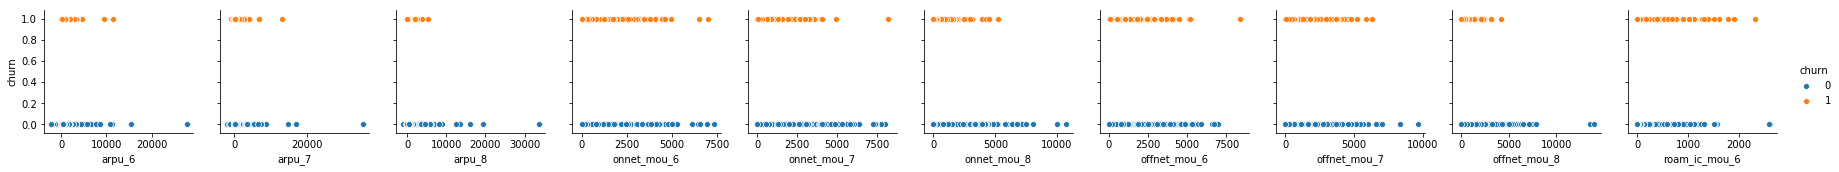

In [383]:
sns.pairplot(data = df, x_vars = df.iloc[:,0:10].columns, y_vars='churn', hue='churn')
plt.show()
#None of them show significant impact on churn, except for arpu variables

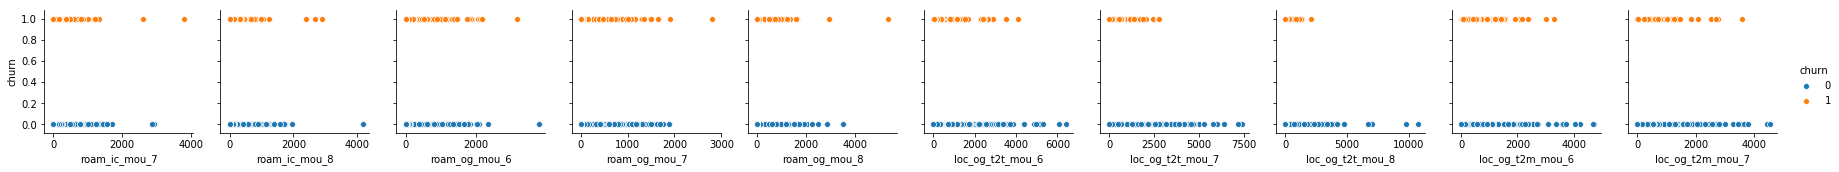

In [384]:
sns.pairplot(data = df, x_vars = df.iloc[:,10:20].columns, y_vars='churn', hue='churn')
plt.show()
#Seems like people availing roaming services and those who don't call local t2t have churned

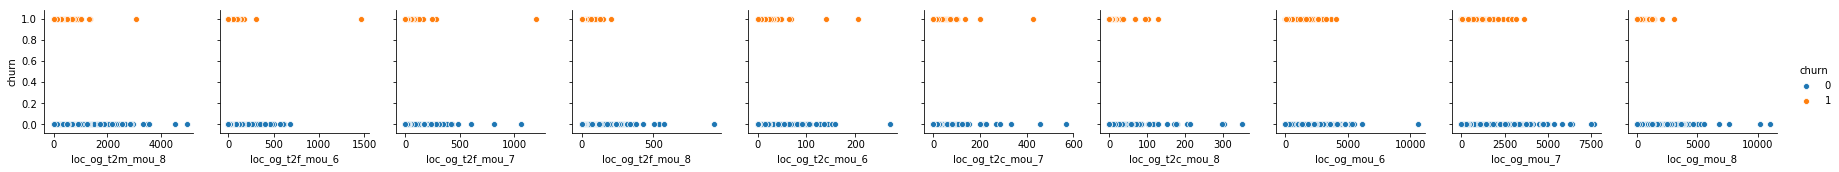

In [385]:
sns.pairplot(data = df, x_vars = df.iloc[:,20:30].columns, y_vars='churn', hue='churn')
plt.show()
#Doesn't have much insight

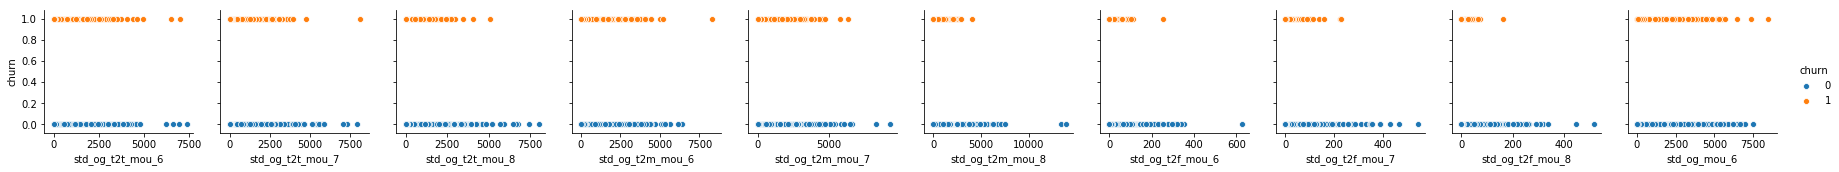

In [386]:
sns.pairplot(data = df, x_vars = df.iloc[:,30:40].columns, y_vars='churn', hue='churn')
plt.show()
#Those who call less local outgoing and std outgoing t2m,t2t and t2f have churned

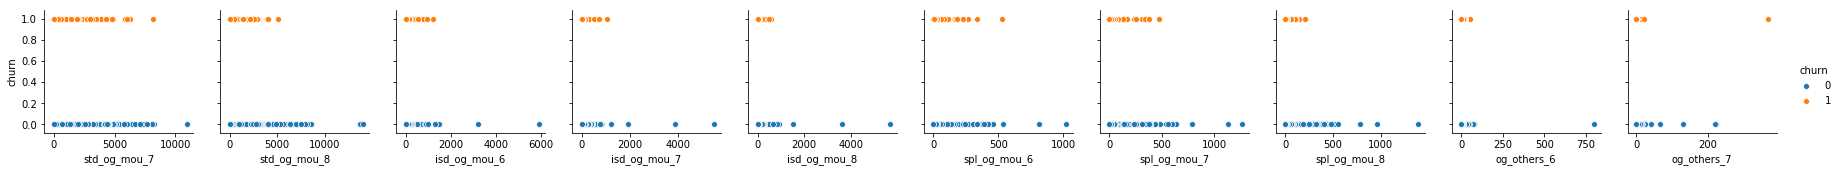

In [387]:
sns.pairplot(data = df, x_vars = df.iloc[:,40:50].columns, y_vars='churn', hue='churn')
plt.show()
#Doesn't have much insight

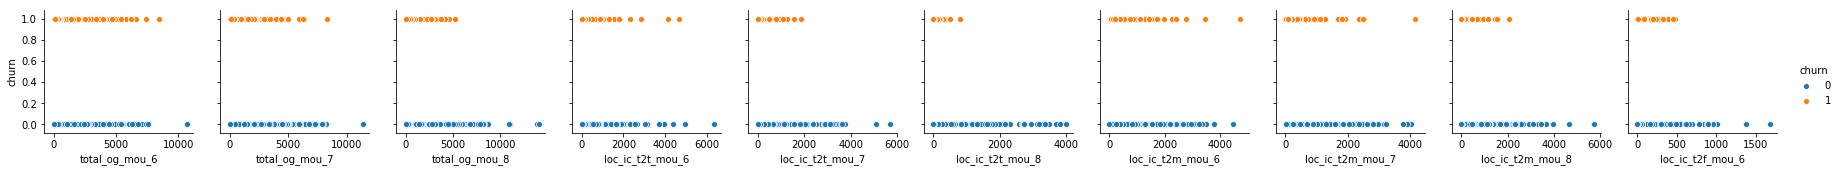

In [388]:
sns.pairplot(data = df, x_vars = df.iloc[:,50:60].columns, y_vars='churn', hue='churn')
plt.show()
#Those who have less local incoming t2t have churned

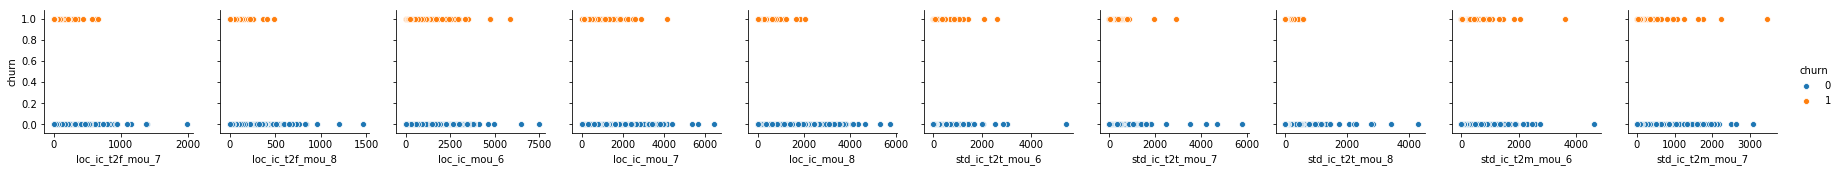

In [389]:
sns.pairplot(data = df, x_vars = df.iloc[:,60:70].columns, y_vars='churn', hue='churn')
plt.show()
#Doesn't have much insight

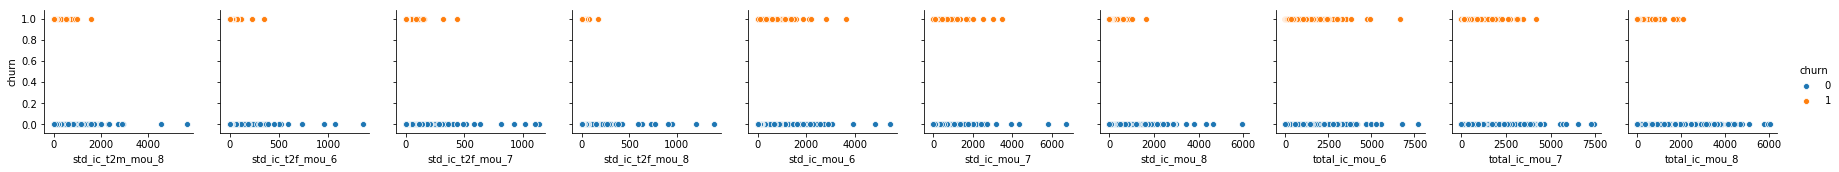

In [390]:
sns.pairplot(data = df, x_vars = df.iloc[:,70:80].columns, y_vars='churn', hue='churn')
plt.show()
#Doesn't have much insight

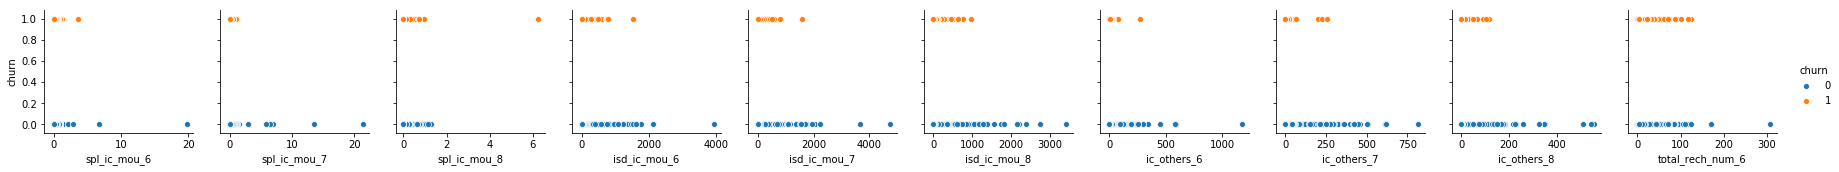

In [391]:
sns.pairplot(data = df, x_vars = df.iloc[:,80:90].columns, y_vars='churn', hue='churn')
plt.show()
#Those who have less total incoming and isd incoming have churned

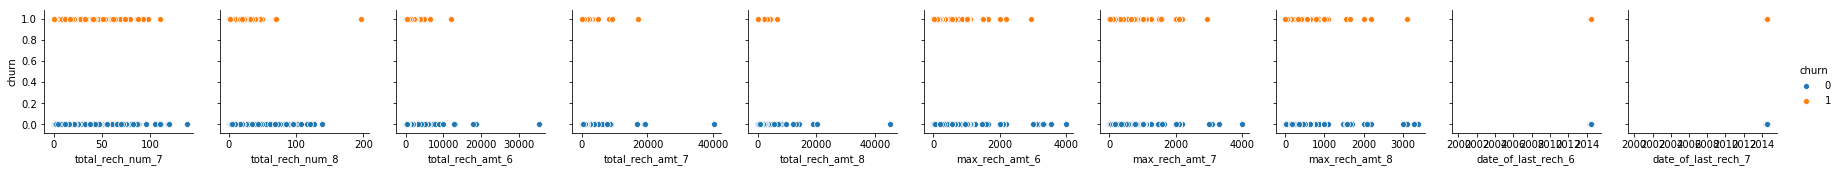

In [392]:
sns.pairplot(data = df, x_vars = df.iloc[:,90:100].columns, y_vars='churn', hue='churn')
plt.show()
#Doesn't have much insight

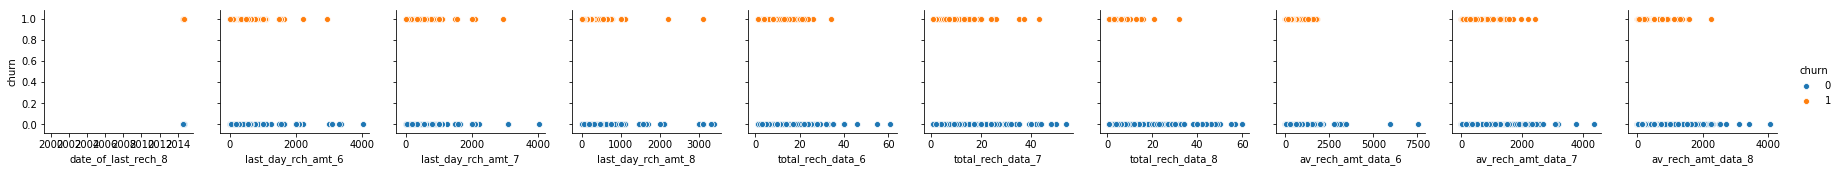

In [393]:
sns.pairplot(data = df, x_vars = df.iloc[:,100:110].columns, y_vars='churn', hue='churn')
plt.show()
#Those who have total recharge data less have churned

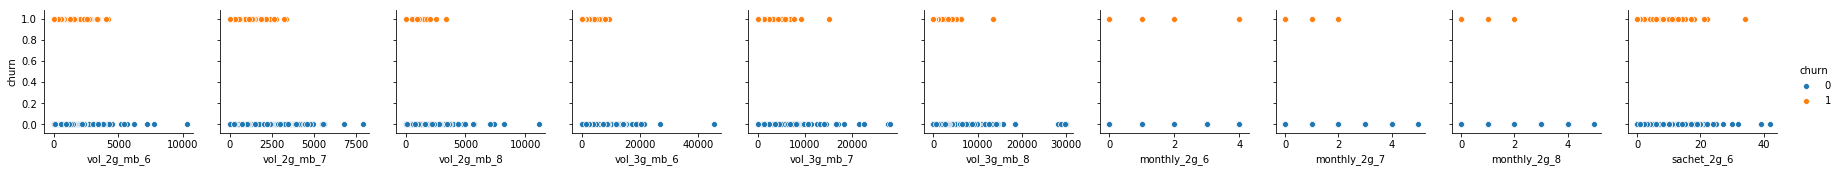

In [394]:
sns.pairplot(data = df, x_vars = df.iloc[:,110:120].columns, y_vars='churn', hue='churn')
plt.show()
#Those who have less volume of data and less average data recharge have churned

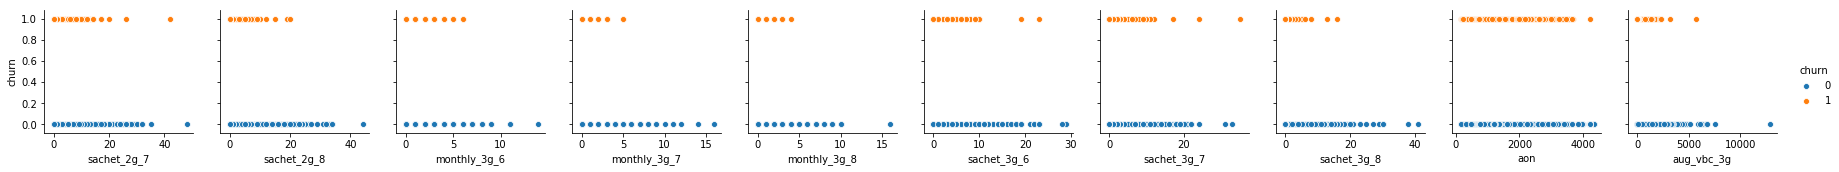

In [395]:
sns.pairplot(data = df, x_vars = df.iloc[:,120:130].columns, y_vars='churn', hue='churn')
plt.show()
#Those who have less monthly 3g recharges have churned

In [396]:
df.iloc[:,130:].head()

,jul_vbc_3g,jun_vbc_3g,total_data_6,total_data_7,total_rech_val_6,total_rech_val_7,total_rech_av_6_7,churn
3,0.00,0.00,1008.0,154.0,1238.0,464.0,851.0,0
7,19.38,18.74,504.0,616.0,2084.0,1406.0,1745.0,1
8,910.65,122.16,396.0,354.0,833.0,955.0,894.0,0
13,0.00,0.00,924.0,85.0,1431.0,338.0,884.5,0
16,2.45,21.89,792.0,308.0,1362.0,656.0,1009.0,0


/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


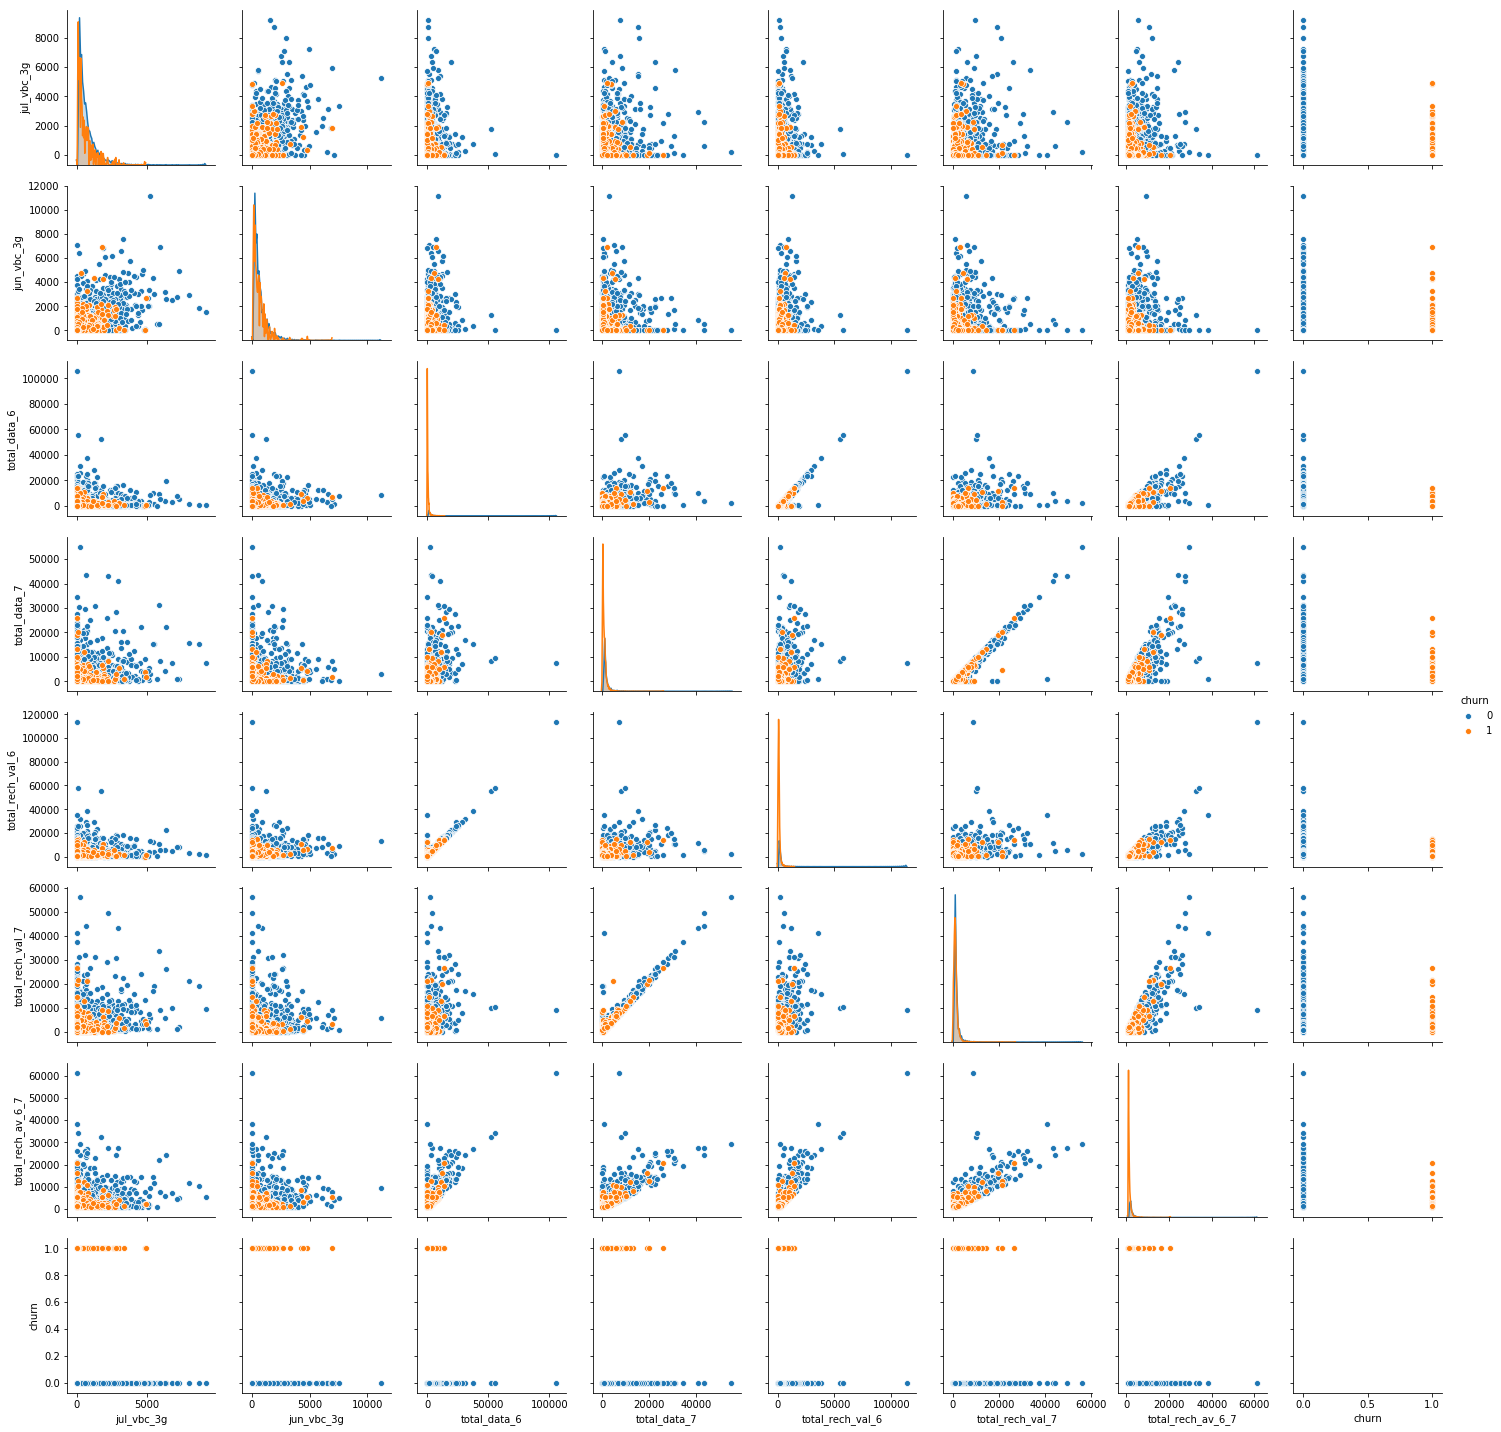

In [397]:
# sns.pairplot(data = df, x_vars = df.iloc[:,130:136].columns, y_vars='churn', hue='churn')
# plt.show()
sns.pairplot(df.iloc[:,130:], hue='churn')
plt.show()
#Those who have less volume based cost of 3g and less total data have churned

In [398]:
df['churn'].dtype

dtype('int64')

## Deriving new features

In [399]:
df['last_dom_6'] = '2014-06-30'
df['last_dom_7'] = '2014-07-31'
df['last_dom_8'] = '2014-08-31'

In [400]:
df['last_dom_6'] = df['last_dom_6'].astype('datetime64')
df['last_dom_7'] = df['last_dom_7'].astype('datetime64')
df['last_dom_8'] = df['last_dom_8'].astype('datetime64')

In [401]:
df['num_days_before_eom_6'] = (df['last_dom_6'] - df['date_of_last_rech_6']).dt.days
df['num_days_before_eom_7'] = (df['last_dom_7'] - df['date_of_last_rech_7']).dt.days
df['num_days_before_eom_8'] = (df['last_dom_8'] - df['date_of_last_rech_8']).dt.days

In [402]:
df[['num_days_before_eom_6','num_days_before_eom_7','num_days_before_eom_8']].head()

,num_days_before_eom_6,num_days_before_eom_7,num_days_before_eom_8
3,2,0,0
7,3,6,5
8,5,0,1
13,10,9,1
16,0,0,17


In [403]:
# As we have new features datetime variables can be removed
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [404]:
df.drop(['last_dom_6','last_dom_7','last_dom_8'],axis=1,inplace=True)

In [405]:
#To distinguish between good phase and action phase, let's take average of good months 6 and 7

In [406]:
list_of_6cols = [x for x in list(df.columns) if (x[-2:] == '_6')|(x[:3] == 'jun')]

In [407]:
list_of_6cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'jun_vbc_3g',
 'total_data_6',
 'total_rech_val_6',
 'num_days_before_eom_6']

In [408]:
df['arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['total_rech_num_6_7'] = df[['total_rech_num_6','total_rech_num_7']].mean(axis=1)
df['total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['max_rech_amt_6_7'] = df[['max_rech_amt_6','max_rech_amt_7']].mean(axis=1)
df['last_day_rch_amt_6_7'] = df[['last_day_rch_amt_6','last_day_rch_amt_7']].mean(axis=1)
df['total_rech_data_6_7'] = df[['total_rech_data_6','total_rech_data_7']].mean(axis=1)
df['av_rech_amt_data_6_7'] = df[['av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)
df['vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['total_data_6_7'] = df[['total_data_6','total_data_7']].mean(axis=1)
df['total_rech_val_6_7'] = df[['total_rech_val_6','total_rech_val_7']].mean(axis=1)
df['num_days_before_eom_6_7'] = df[['num_days_before_eom_6','num_days_before_eom_7']].mean(axis=1)

In [409]:
#Remove original features as we have taken average
final = df.drop(['arpu_6','arpu_7',
'onnet_mou_6','onnet_mou_7',
'offnet_mou_6','offnet_mou_7',
'roam_ic_mou_6','roam_ic_mou_7',
'roam_og_mou_6','roam_og_mou_7',
'loc_og_t2t_mou_6','loc_og_t2t_mou_7',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7',
'loc_og_t2f_mou_6','loc_og_t2f_mou_7',
'loc_og_t2c_mou_6','loc_og_t2c_mou_7',
'loc_og_mou_6','loc_og_mou_7',
'std_og_t2t_mou_6','std_og_t2t_mou_7',
'std_og_t2m_mou_6','std_og_t2m_mou_7',
'std_og_t2f_mou_6','std_og_t2f_mou_7',
'std_og_mou_6','std_og_mou_7',
'isd_og_mou_6','isd_og_mou_7',
'spl_og_mou_6','spl_og_mou_7',
'og_others_6','og_others_7',
'total_og_mou_6','total_og_mou_7',
'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7',
'loc_ic_mou_6','loc_ic_mou_7',
'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
'std_ic_t2m_mou_6','std_ic_t2m_mou_7',
'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
'std_ic_mou_6','std_ic_mou_7',
'total_ic_mou_6','total_ic_mou_7',
'spl_ic_mou_6','spl_ic_mou_7',
'isd_ic_mou_6','isd_ic_mou_7',
'ic_others_6','ic_others_7',
'total_rech_num_6','total_rech_num_7',
'total_rech_amt_6','total_rech_amt_7',
'max_rech_amt_6','max_rech_amt_7',
'last_day_rch_amt_6','last_day_rch_amt_7',
'total_rech_data_6','total_rech_data_7',
'av_rech_amt_data_6','av_rech_amt_data_7',
'vol_2g_mb_6','vol_2g_mb_7',
'vol_3g_mb_6','vol_3g_mb_7',
'monthly_2g_6','monthly_2g_7',
'sachet_2g_6','sachet_2g_7',
'monthly_3g_6','monthly_3g_7',
'sachet_3g_6','sachet_3g_7',
'jun_vbc_3g','jul_vbc_3g',
'total_data_6','total_data_7',
'total_rech_val_6','total_rech_val_7',
'num_days_before_eom_6','num_days_before_eom_7'],axis=1)

In [410]:
final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7,vbc_3g_6_7,total_data_6_7,total_rech_val_6_7,num_days_before_eom_6_7
3,508.054,310.98,71.68,44.38,39.04,10.61,22.46,4.91,0.00,37.99,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,581.0,851.0,1.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.0,0.000,0.0,0.0,0.0,0.0,19.060,560.0,1745.0,4.5
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,...,178.0,375.475,0.5,0.5,0.0,0.0,516.405,375.0,894.0,2.5
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,504.5,884.5,9.5
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,0.0,0.000,0.0,0.0,0.0,0.0,12.170,550.0,1009.0,0.0


## Correlation

In [411]:
df_corr = final.corr()

In [412]:
df_corr.shape

(92, 92)

In [413]:
for i in df_corr.columns:
    if len(df_corr.loc[((df_corr[i] > 0.86) | (df_corr[i] < -0.86)) & (df_corr[i] != 1.0),i]) != 0:
        print(df_corr.loc[((df_corr[i] > 0.86) | (df_corr[i] < -0.86)) & (df_corr[i] != 1.0),i],"\n")

total_rech_amt_8    0.960194
Name: arpu_8, dtype: float64 

std_og_t2t_mou_8    0.865886
Name: onnet_mou_8, dtype: float64 

onnet_mou_8    0.865886
Name: std_og_t2t_mou_8, dtype: float64 

isd_og_mou_6_7    0.953407
Name: isd_og_mou_8, dtype: float64 

loc_ic_mou_8    0.86684
Name: loc_ic_t2m_mou_8, dtype: float64 

loc_ic_t2m_mou_8    0.866840
total_ic_mou_8      0.889532
Name: loc_ic_mou_8, dtype: float64 

loc_ic_mou_8    0.889532
Name: total_ic_mou_8, dtype: float64 

arpu_8    0.960194
Name: total_rech_amt_8, dtype: float64 

total_data_6_7    0.911426
Name: total_rech_av_6_7, dtype: float64 

total_rech_amt_6_7    0.979522
Name: arpu_6_7, dtype: float64 

std_og_t2t_mou_6_7    0.86375
Name: onnet_mou_6_7, dtype: float64 

onnet_mou_6_7    0.86375
Name: std_og_t2t_mou_6_7, dtype: float64 

isd_og_mou_8    0.953407
Name: isd_og_mou_6_7, dtype: float64 

loc_ic_mou_6_7    0.862533
Name: loc_ic_t2m_mou_6_7, dtype: float64 

loc_ic_t2m_mou_6_7    0.862533
total_ic_mou_6_7      0.8964

In [414]:
# Higher correlations are between 
# arpu and total_rech_amt variables
# isd_og_mou of 8 and 6,7 variables
# also between similar type of variables like onnet with t2t and offnet with t2m

In [415]:
#Removing highly correlated variables
highly_corr_cols = ['total_rech_amt_8',
'onnet_mou_8',
'isd_og_mou_6_7',
'loc_ic_mou_8',
'total_ic_mou_8',
'total_data_6_7',
'total_rech_amt_6_7',
'onnet_mou_6_7',
'loc_ic_mou_6_7',
'total_ic_mou_6_7']
for i in highly_corr_cols:
    final.drop(i,axis=1,inplace=True)

In [416]:
# Since there is relation among 8 and 6,7 variables, 
# let's create difference between 6,7 and 8 variables to further add variables related to good and action months

In [417]:
list_of_67cols = [x for x in list(final.columns) if (x[-4:] == '_6_7')]

In [418]:
list_of_67cols

['total_rech_av_6_7',
 'arpu_6_7',
 'offnet_mou_6_7',
 'roam_ic_mou_6_7',
 'roam_og_mou_6_7',
 'loc_og_t2t_mou_6_7',
 'loc_og_t2m_mou_6_7',
 'loc_og_t2f_mou_6_7',
 'loc_og_t2c_mou_6_7',
 'loc_og_mou_6_7',
 'std_og_t2t_mou_6_7',
 'std_og_t2m_mou_6_7',
 'std_og_t2f_mou_6_7',
 'std_og_mou_6_7',
 'spl_og_mou_6_7',
 'og_others_6_7',
 'total_og_mou_6_7',
 'loc_ic_t2t_mou_6_7',
 'loc_ic_t2m_mou_6_7',
 'loc_ic_t2f_mou_6_7',
 'std_ic_t2t_mou_6_7',
 'std_ic_t2m_mou_6_7',
 'std_ic_t2f_mou_6_7',
 'std_ic_mou_6_7',
 'spl_ic_mou_6_7',
 'isd_ic_mou_6_7',
 'ic_others_6_7',
 'total_rech_num_6_7',
 'max_rech_amt_6_7',
 'last_day_rch_amt_6_7',
 'total_rech_data_6_7',
 'av_rech_amt_data_6_7',
 'vol_2g_mb_6_7',
 'vol_3g_mb_6_7',
 'monthly_2g_6_7',
 'sachet_2g_6_7',
 'monthly_3g_6_7',
 'sachet_3g_6_7',
 'vbc_3g_6_7',
 'total_rech_val_6_7',
 'num_days_before_eom_6_7']

In [419]:
final[ 'arpu_diff'] = final[ 'arpu_8'] - final[ 'arpu_6_7']
final[ 'offnet_mou_diff'] = final[ 'offnet_mou_8'] - final[ 'offnet_mou_6_7']
final[ 'roam_ic_mou_diff'] = final[ 'roam_ic_mou_8'] - final[ 'roam_ic_mou_6_7']
final[ 'roam_og_mou_diff'] = final[ 'roam_og_mou_8'] - final[ 'roam_og_mou_6_7']
final[ 'loc_og_t2t_mou_diff'] = final[ 'loc_og_t2t_mou_8'] - final[ 'loc_og_t2t_mou_6_7']
final[ 'loc_og_t2m_mou_diff'] = final[ 'loc_og_t2m_mou_8'] - final[ 'loc_og_t2m_mou_6_7']
final[ 'loc_og_t2f_mou_diff'] = final[ 'loc_og_t2f_mou_8'] - final[ 'loc_og_t2f_mou_6_7']
final[ 'loc_og_t2c_mou_diff'] = final[ 'loc_og_t2c_mou_8'] - final[ 'loc_og_t2c_mou_6_7']
final[ 'loc_og_mou_diff'] = final[ 'loc_og_mou_8'] - final[ 'loc_og_mou_6_7']
final[ 'std_og_t2t_mou_diff'] = final[ 'std_og_t2t_mou_8'] - final[ 'std_og_t2t_mou_6_7']
final[ 'std_og_t2m_mou_diff'] = final[ 'std_og_t2m_mou_8'] - final[ 'std_og_t2m_mou_6_7']
final[ 'std_og_t2f_mou_diff'] = final[ 'std_og_t2f_mou_8'] - final[ 'std_og_t2f_mou_6_7']
final[ 'std_og_mou_diff'] = final[ 'std_og_mou_8'] - final[ 'std_og_mou_6_7']
final[ 'spl_og_mou_diff'] = final[ 'spl_og_mou_8'] - final[ 'spl_og_mou_6_7']
final[ 'total_og_mou_diff'] = final[ 'total_og_mou_8'] - final[ 'total_og_mou_6_7']
final[ 'loc_ic_t2t_mou_diff'] = final[ 'loc_ic_t2t_mou_8'] - final[ 'loc_ic_t2t_mou_6_7']
final[ 'loc_ic_t2m_mou_diff'] = final[ 'loc_ic_t2m_mou_8'] - final[ 'loc_ic_t2m_mou_6_7']
final[ 'loc_ic_t2f_mou_diff'] = final[ 'loc_ic_t2f_mou_8'] - final[ 'loc_ic_t2f_mou_6_7']
final[ 'std_ic_t2t_mou_diff'] = final[ 'std_ic_t2t_mou_8'] - final[ 'std_ic_t2t_mou_6_7']
final[ 'std_ic_t2m_mou_diff'] = final[ 'std_ic_t2m_mou_8'] - final[ 'std_ic_t2m_mou_6_7']
final[ 'std_ic_t2f_mou_diff'] = final[ 'std_ic_t2f_mou_8'] - final[ 'std_ic_t2f_mou_6_7']
final[ 'std_ic_mou_diff'] = final[ 'std_ic_mou_8'] - final[ 'std_ic_mou_6_7']
final[ 'spl_ic_mou_diff'] = final[ 'spl_ic_mou_8'] - final[ 'spl_ic_mou_6_7']
final[ 'isd_ic_mou_diff'] = final[ 'isd_ic_mou_8'] - final[ 'isd_ic_mou_6_7']
final[ 'ic_others_diff'] = final[ 'ic_others_8'] - final[ 'ic_others_6_7']
final[ 'total_rech_num_diff'] = final[ 'total_rech_num_8'] - final[ 'total_rech_num_6_7']
final[ 'max_rech_amt_diff'] = final[ 'max_rech_amt_8'] - final[ 'max_rech_amt_6_7']
final[ 'last_day_rch_amt_diff'] = final[ 'last_day_rch_amt_8'] - final[ 'last_day_rch_amt_6_7']
final[ 'total_rech_data_diff'] = final[ 'total_rech_data_8'] - final[ 'total_rech_data_6_7']
final[ 'av_rech_amt_data_diff'] = final[ 'av_rech_amt_data_8'] - final[ 'av_rech_amt_data_6_7']
final[ 'vol_2g_mb_diff'] = final[ 'vol_2g_mb_8'] - final[ 'vol_2g_mb_6_7']
final[ 'vol_3g_mb_diff'] = final[ 'vol_3g_mb_8'] - final[ 'vol_3g_mb_6_7']
final[ 'monthly_2g_diff'] = final[ 'monthly_2g_8'] - final[ 'monthly_2g_6_7']
final[ 'sachet_2g_diff'] = final[ 'sachet_2g_8'] - final[ 'sachet_2g_6_7']
final[ 'monthly_3g_diff'] = final[ 'monthly_3g_8'] - final[ 'monthly_3g_6_7']
final[ 'sachet_3g_diff'] = final[ 'sachet_3g_8'] - final[ 'sachet_3g_6_7']
final[ 'vbc_3g_diff'] = final[ 'aug_vbc_3g'] - final[ 'vbc_3g_6_7']
final[ 'num_days_before_eom_diff'] = final[ 'num_days_before_eom_8'] - final[ 'num_days_before_eom_6_7']

In [420]:
list_of_diffcols = [x for x in list(final.columns) if (x[-4:] != 'diff')]

In [421]:
final = final[list_of_diffcols]

In [422]:
final.shape

(30009, 82)

## Dealing with Class Imbalance using SMOTE as random over sampling might lead to overfitting

In [423]:
print(final['churn'].value_counts()/len(final.index))
print(final['churn'].value_counts())

0    0.896264
1    0.103736
Name: churn, dtype: float64
0    26896
1     3113
Name: churn, dtype: int64


### First split the dataset into train and test and apply over sampling, this way we won't be making us of test data

In [424]:
X = final.drop('churn',axis=1)
y = final['churn']

In [425]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [426]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [810]:
#Train test split before random over sampling
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=42)

In [428]:
import imblearn
from imblearn.over_sampling import SMOTE

In [429]:
print("Before over sampling using SMOTE")
print("Churn", y_train.sum())
print("Non Churn",len(y_train) - y_train.sum())

Before over sampling using SMOTE
Churn 2152
Non Churn 18854


In [430]:
over_sample = SMOTE(random_state=42)
X_train_rs, y_train_rs = over_sample.fit_sample(X_train, y_train)

array([[-0.46997771, -0.54311277, -0.16612217, ..., -0.36534678,
        -0.47460404, -0.47434192],
       [ 0.14743616,  0.18500407, -0.16612217, ..., -0.36534678,
        -0.11283548, -0.34399628],
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.2350804 ,  2.26291668],
       ...,
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.08477855, -0.19505227],
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.43462899,  1.43424571],
       [ 0.40398191, -0.19501358, -0.16612217, ..., -0.3257908 ,
        -0.25404318, -0.73503322]])

In [431]:
y_train_rs.sum()

18854

In [432]:
print("After over sampling using SMOTE")
print("Churn", y_train_rs.sum())
print("Non Churn",len(y_train_rs) - y_train_rs.sum())
#Now the training data's class is balanced

After over sampling using SMOTE
Churn 18854
Non Churn 18854


## PCA for dimensionality reduction

In [433]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [434]:
pca.fit(X_train_rs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [435]:
pca.components_

array([[ 2.38201672e-01,  2.43217941e-01,  5.20989127e-02, ...,
         1.83557051e-02,  6.39438740e-02, -1.37342656e-01],
       [ 1.18626580e-01, -2.53679249e-02,  3.87978186e-02, ...,
         1.90584937e-01,  1.31912223e-01,  7.83948534e-02],
       [-1.39268224e-02, -1.06880605e-02,  2.43214158e-01, ...,
        -8.42407010e-02, -1.93600026e-01,  1.21015574e-01],
       ...,
       [-1.15965042e-07,  1.23644814e-06,  9.63729460e-08, ...,
        -9.18784128e-08,  2.53691936e-07, -3.88812333e-07],
       [ 4.02581731e-07, -8.50334987e-07, -5.76372303e-08, ...,
         9.67161409e-08, -1.33387991e-07,  1.83290831e-07],
       [ 0.00000000e+00,  1.01594028e-15, -1.59062824e-16, ...,
         5.42480386e-16,  7.07106781e-01, -5.23914794e-17]])

In [436]:
colnames = list(final.columns)
if 'churn' in colnames:
    print(colnames)
print(len(pca.components_[0]))

['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'total_rech_av_6_7', 'churn', 'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7', 'roam_ic_mou_6_7', 'roam_og_mou_6_7', 'loc_og_t2t_mou_6_7', 'loc_og_t2m_mou_6_7', 'loc_og_t2f_mou_6_7', 'loc_og_t2c_mou_6_7', 'loc_og_mou_6_7', 'std_og_t2t_mou_6_7', 'std_og_t2m_mou_6_7', 'std_og_t2f_mou_6_7', 'std_og_mou_6_7', 'spl_

In [437]:
colnames = list(final.columns)
colnames.remove('churn')
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.238202,0.118627,arpu_8
1,0.243218,-0.025368,offnet_mou_8
2,0.052099,0.038798,roam_ic_mou_8
3,0.091923,0.059432,roam_og_mou_8
4,0.089406,0.063653,loc_og_t2t_mou_8


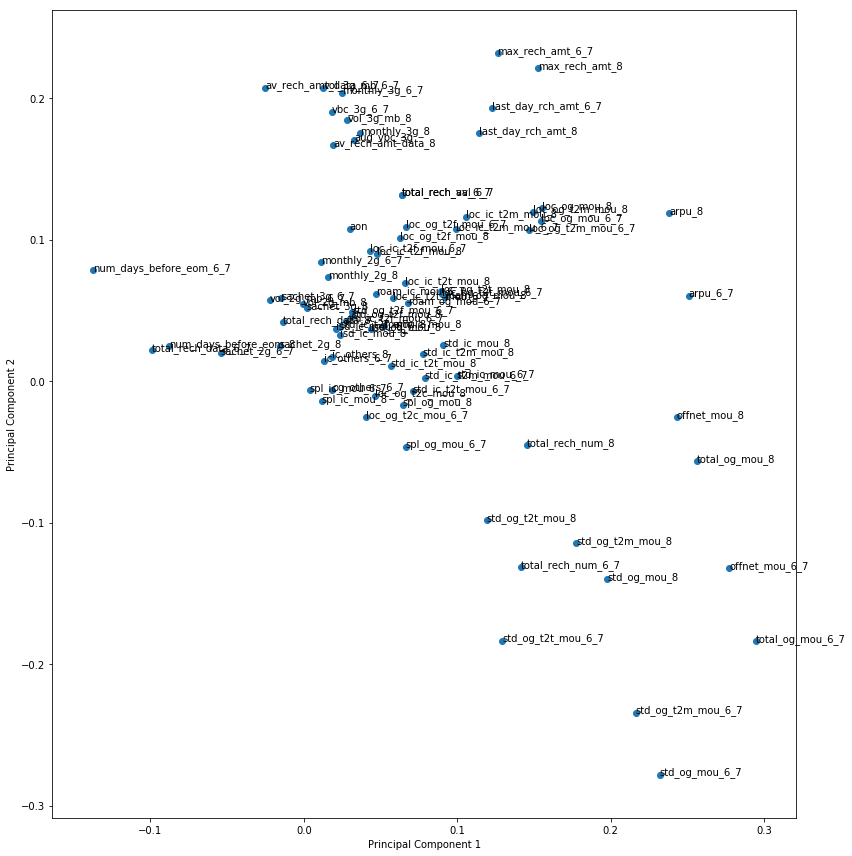

In [438]:
%matplotlib inline
fig = plt.figure(figsize = (12,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [470]:
sum(pca.explained_variance_ratio_[0:56])

0.9746410769550451

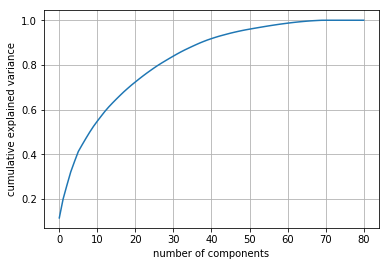

In [450]:
#Plotting the scree plot
%matplotlib inline
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
#56 components explaining almost 98% variance should be sufficient

In [451]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=56)

In [452]:
df_train_pca = pca_final.fit_transform(X_train_rs)
df_train_pca.shape

(37708, 56)

In [453]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

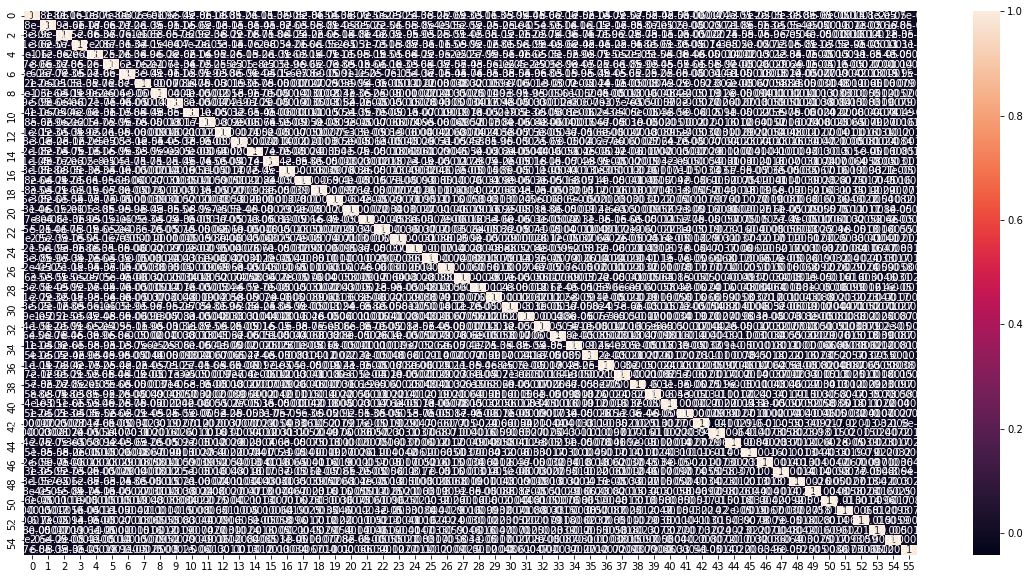

In [454]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [455]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# correlations are very close to 0

max corr: 0.02397070700992632 , min corr:  -0.041332346922156635


In [457]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9003, 56)

## Model Building - Logistic Regression after PCA

In [458]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_rs)

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [462]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
round(metrics.roc_auc_score(y_test, pred_probs_test),2)


0.89

In [472]:
#Accuracy is good, lets check the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [473]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )

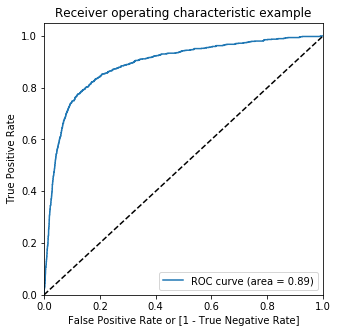

In [474]:
draw_roc(y_test, pred_probs_test)
#Accuracy is 0.89 and the Area under curve is also 0.89

In [483]:
y_test = pd.DataFrame(y_test)
pred_probs_test = pd.DataFrame(pred_probs_test)

In [481]:
pred_probs_test.rename(columns = {0:"Churn_Prob"},inplace=True)

In [489]:
y_test.head()

,churn
14052,0
73197,0
16637,0
51650,0
47503,0


In [488]:
pred_probs_test.head()

,Churn_Prob
0,0.302415
1,0.054821
2,0.153079
3,0.461335
4,0.893744


In [497]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test[i]= np.array(pred_probs_test.Churn_Prob.map(lambda x: 1 if x > i else 0))
y_test.head()

,churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
14052,0,1,1,1,1,0,0,0,0,0,0
73197,0,1,0,0,0,0,0,0,0,0,0
16637,0,1,1,0,0,0,0,0,0,0,0
51650,0,1,1,1,1,1,0,0,0,0,0
47503,0,1,1,1,1,1,1,1,1,1,0


In [561]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','prec','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test.churn, y_test[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,prec,speci]
print(cutoff_df)

     prob  accuracy     sensi      prec     speci
0.0   0.0  0.106742  1.000000  0.106742  0.000000
0.1   0.1  0.468399  0.955255  0.162162  0.410221
0.2   0.2  0.592469  0.933403  0.199245  0.551728
0.3   0.3  0.683883  0.908429  0.240430  0.657050
0.4   0.4  0.755082  0.874089  0.287278  0.740860
0.5   0.5  0.816061  0.834547  0.348847  0.813852
0.6   0.6  0.861491  0.780437  0.419933  0.871176
0.7   0.7  0.894146  0.710718  0.502946  0.916066
0.8   0.8  0.910585  0.565036  0.583871  0.951878
0.9   0.9  0.906698  0.277836  0.646489  0.981845


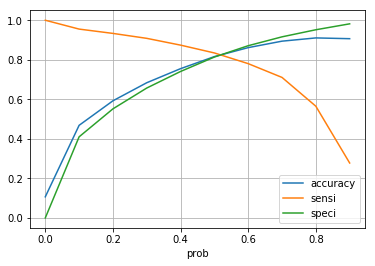

In [503]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()
#0.52 cut-off seems to be optimal

In [553]:
pred_probs_test['predicted_churn'] = np.array(pred_probs_test.Churn_Prob.map(lambda x: 1 if x > 0.52 else 0))
pred_probs_test.head()

,Churn_Prob,predicted_churn
0,0.302415,0
1,0.054821,0
2,0.153079,0
3,0.461335,0
4,0.893744,1


In [554]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test.churn, pred_probs_test.predicted_churn)

0.8253915361546151

In [555]:
confusion = metrics.confusion_matrix(y_test.churn, pred_probs_test.predicted_churn )
confusion

array([[6640, 1402],
       [ 170,  791]])

In [556]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [563]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)
#So, the model is predicting the actual churns well

0.8231009365244537

In [558]:
# Let us calculate specificity
TN / float(TN+FP)
#

0.825665257398657

In [564]:
#Precision
TP / float(TP + FP)


0.36069311445508434

## Logistic Regression Model model is predicting the actual churns well, and many non-churns as churns, which is not an issue, as those customers will continue to stay

In [567]:
y_test.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)

## Model Building Part 2 - Random Forest

In [568]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [570]:
# fit
rfc.fit(df_train_pca,y_train_rs)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [571]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [572]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [573]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8042
           1       0.51      0.50      0.51       961

    accuracy                           0.90      9003
   macro avg       0.73      0.72      0.73      9003
weighted avg       0.90      0.90      0.90      9003



In [574]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7588  454]
 [ 479  482]]


In [575]:
print(accuracy_score(y_test,predictions))

0.8963678773742086


In [586]:
# GridSearchCV to find optimal min_samples_split after trial and error (2 iterations done)
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10],
    'min_samples_leaf': range(100,200,300),
    'min_samples_split': range(200,300,400),
    'n_estimators': [75,100,125], 
    'max_features': [15,20,25]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [587]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_rs)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [592]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8503765779145009 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 75}


In [594]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=75)

In [595]:
# fit
rfc.fit(df_train_pca,y_train_rs)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [597]:
# predict
predictions = rfc.predict(df_test_pca)

In [598]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [599]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8042
           1       0.42      0.75      0.53       961

    accuracy                           0.86      9003
   macro avg       0.69      0.81      0.73      9003
weighted avg       0.91      0.86      0.88      9003



## Logistic Regression is performing better on this data than Random Forests in precision and recall metrics

In [667]:
#Lets create Logistic Regression model to identify the predictor variables impacting churn

In [668]:
import statsmodels.api as sm

In [669]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [670]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)# As we know from Random Forests, the max predictors should be 20, taking little more
rfe = rfe.fit(X_train_rs, y_train_rs)

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/raghavpulipati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

In [671]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [672]:
X_train_rs

array([[-0.46997771, -0.54311277, -0.16612217, ..., -0.36534678,
        -0.47460404, -0.47434192],
       [ 0.14743616,  0.18500407, -0.16612217, ..., -0.36534678,
        -0.11283548, -0.34399628],
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.2350804 ,  2.26291668],
       ...,
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.08477855, -0.19505227],
       [-0.93676978, -0.68173546, -0.16612217, ..., -0.36534678,
        -0.43462899,  1.43424571],
       [ 0.40398191, -0.19501358, -0.16612217, ..., -0.3257908 ,
        -0.25404318, -0.73503322]])

In [673]:
print(list(final.columns))

['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'total_rech_av_6_7', 'churn', 'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7', 'roam_ic_mou_6_7', 'roam_og_mou_6_7', 'loc_og_t2t_mou_6_7', 'loc_og_t2m_mou_6_7', 'loc_og_t2f_mou_6_7', 'loc_og_t2c_mou_6_7', 'loc_og_mou_6_7', 'std_og_t2t_mou_6_7', 'std_og_t2m_mou_6_7', 'std_og_t2f_mou_6_7', 'std_og_mou_6_7', 'spl_

In [674]:
X_cols = list(final.columns)

In [675]:
X_cols.remove('churn')

In [676]:
X_train_rs_df = pd.DataFrame(X_train_rs,columns = X_cols)

In [769]:
X_test_df = pd.DataFrame(X_test,columns = X_cols)

In [678]:
X_train_rs_df.head()

,arpu_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,...,av_rech_amt_data_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,sachet_2g_6_7,monthly_3g_6_7,sachet_3g_6_7,vbc_3g_6_7,total_rech_val_6_7,num_days_before_eom_6_7
0,-0.469978,-0.543113,-0.166122,-0.185202,-0.185457,-0.417161,-0.295142,-0.108883,-0.399784,-0.305761,...,-0.141167,-0.338445,-0.357347,-0.349515,-0.401592,-0.334097,-0.207237,-0.365347,-0.474604,-0.474342
1,0.147436,0.185004,-0.166122,-0.185202,-0.193555,1.047246,0.318620,-0.230872,0.575428,-0.372389,...,-0.141167,-0.338445,-0.357347,-0.349515,-0.401592,-0.334097,-0.207237,-0.365347,-0.112835,-0.343996
2,-0.936770,-0.681735,-0.166122,-0.185202,-0.335102,-0.632287,-0.295142,-0.230872,-0.631070,-0.372389,...,1.017624,1.195603,-0.357347,-0.349515,-0.401592,0.568488,-0.207237,-0.365347,-0.235080,2.262917
3,-0.936770,-0.681735,-0.166122,-0.185202,-0.335102,-0.632287,-0.295142,-0.230872,-0.631070,-0.372389,...,-0.465629,-0.338445,-0.357347,-0.349515,-0.401592,-0.334097,-0.207237,-0.365347,-0.263732,-0.474342
4,-0.208272,0.078139,-0.166122,-0.185202,-0.335102,0.907977,-0.242277,-0.212432,0.368273,-0.369062,...,-0.651035,-0.338445,-0.357347,-0.349515,-0.401592,-0.334097,-0.207237,-0.365347,-0.427616,-0.343996


In [679]:
list(zip(X_train_rs_df, rfe.support_, rfe.ranking_))

[('arpu_8', False, 40),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 51),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 6),
 ('loc_og_t2c_mou_8', False, 31),
 ('loc_og_mou_8', False, 8),
 ('std_og_t2t_mou_8', False, 2),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 35),
 ('std_og_mou_8', False, 30),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 12),
 ('total_og_mou_8', False, 50),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 16),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', False, 44),
 ('std_ic_t2f_mou_8', True, 1),
 ('std_ic_mou_8', False, 4),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 9),
 ('ic_others_8', False, 38),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', False, 55),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', False, 47),
 ('av_rech_amt_data_8', False, 33),
 ('vol_2g_mb_8', False, 7),
 

In [680]:
col = X_train_rs_df.columns[rfe.support_]

In [681]:
#25 features selected by RFE
col

Index(['offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7',
       'loc_og_t2m_mou_6_7', 'loc_og_mou_6_7', 'std_og_t2m_mou_6_7',
       'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [682]:
#56 features discarded by RFE
X_train_rs_df.columns[~rfe.support_]

Index(['arpu_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'max_rech_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_3g_8', 'total_rech_av_6_7',
       'roam_ic_mou_6_7', 'roam_og_mou_6_7', 'loc_og_t2t_mou_6_7',
       'loc_og_t2f_mou_6_7', 'loc_og_t2c_mou_6_7', 'std_og_t2t_mou_6_7',
       'std_og_t2f_mou_6_7', 'std_og_mou_6_7', 'spl_og_mou_6_7',
       'og_others_6_7', 'total_og_mou_6_7', 'loc_ic_t2t_mou_6_7',
       'loc_ic_t2f_mou_6_7', 'std_ic_t2t_mou_6_7', 'std_ic_t2m_mou_6_7',
       'std_ic_t2f_mou_6_7', 'std_ic_mou_6_7', 'spl_ic_mou_6_7',
       'isd_ic_mou_6_7', 'ic_others_6_7', 'total_rech_num_6_7',
       'max_rech_amt_6_7', 'last_day_rch_amt_6_7', 'total_rech_data_6_7',
       'av_rech_amt_data

In [683]:
X_train_sm = sm.add_constant(X_train_rs_df[col])
logm = sm.GLM(y_train_rs,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37682
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15388.
Date:                Mon, 11 Nov 2019   Deviance:                       30775.
Time:                        22:25:47   Pearson chi2:                 3.10e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8333      0.028    -65.157      0.000      -1.888      -1.778
offnet_mou_8             -2.0153      0.190    -10.580      0.000      -2.389      -1.642
roam_og_mou_8             0.3876      0.025     15.235      0.000       0.338       0.437
loc_og_t2t_mou_8         -0.7387      0.083     -8.879      0.000      -0.902      -0.576
loc_og_t2m_mou_8          0.5066      0.111      4.555      0.000       0.289       0.725
std_og_t2m_mou_8          1.4577      0.164      8.895      0.000       1.136       1.779
isd_og_mou_8             -0.1952      0.052     -3.724      0.000      -0.298      -0.092
loc_ic_t2t_mou_8         -0.8008      0.064    -12.466      0.000      -0.927      -0.675
loc_ic_t2m_mou_8         -1.6991      0.070    -24.133      0.000      -1.837      -1.561
std_ic_t2t_mou_8         -0.3364      0.039     -8.725      0.000      -0.412      -0.261
std_ic_t2f_mou_8         -0.5603      0.077     -7.310      0.000      -0.710      -0.410
spl_ic_mou_8             -0.4136      0.024    -17.094      0.000      -0.461      -0.366
total_rech_num_8         -0.5962      0.026    -22.778      0.000      -0.647      -0.545
last_day_rch_amt_8       -0.8111      0.029    -28.310      0.000      -0.867      -0.755
monthly_2g_8             -0.3591      0.025    -14.376      0.000      -0.408      -0.310
sachet_2g_8              -0.3494      0.025    -14.085      0.000      -0.398      -0.301
monthly_3g_8             -0.3106      0.029    -10.593      0.000      -0.368      -0.253
aon                      -0.4523      0.018    -25.404      0.000      -0.487      -0.417
aug_vbc_3g               -0.3675      0.035    -10.502      0.000      -0.436      -0.299
num_days_before_eom_8     0.4663      0.016     28.823      0.000       0.435       0.498
arpu_6_7                  0.3970      0.029     13.612      0.000       0.340       0.454
offnet_mou_6_7            0.9224      0.131      7.058      0.000       0.666       1.179
loc_og_t2m_mou_6_7       -0.8689      0.090     -9.656      0.000      -1.045      -0.693
loc_og_mou_6_7            0.5783      0.071      8.190      0.000       0.440       0.717
std_og_t2m_mou_6_7       -0.6206      0.110     -5.632      0.000      -0.837      -0.405
loc_ic_t2m_mou_6_7        0.5090      0.043     11.724      0.000       0.424       0.594
=========================================================================================
"""

In [684]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [685]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rs_df[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rs_df[col].values, i) for i in range(X_train_rs_df[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,offnet_mou_8,110.90
4,std_og_t2m_mou_8,74.90
20,offnet_mou_6_7,67.41
23,std_og_t2m_mou_6_7,54.17
3,loc_og_t2m_mou_8,27.68


In [686]:
#Let's remove offnet_mou_8, as it has highest VIF value
col = col.drop('offnet_mou_8',1)
col

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7',
       'loc_og_t2m_mou_6_7', 'loc_og_mou_6_7', 'std_og_t2m_mou_6_7',
       'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [687]:
# Let's re-run the model using the selected variables
X_train_sm1 = sm.add_constant(X_train_rs_df[col])
logm2 = sm.GLM(y_train_rs,X_train_sm1, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37683
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15450.
Date:                Mon, 11 Nov 2019   Deviance:                       30901.
Time:                        22:26:26   Pearson chi2:                 2.96e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8320      0.028    -65.127      0.000      -1.887      -1.777
roam_og_mou_8             0.2028      0.017     12.095      0.000       0.170       0.236
loc_og_t2t_mou_8         -0.7219      0.083     -8.712      0.000      -0.884      -0.560
loc_og_t2m_mou_8         -0.5040      0.058     -8.752      0.000      -0.617      -0.391
std_og_t2m_mou_8         -0.2518      0.029     -8.562      0.000      -0.309      -0.194
isd_og_mou_8             -0.3478      0.053     -6.561      0.000      -0.452      -0.244
loc_ic_t2t_mou_8         -0.8034      0.064    -12.504      0.000      -0.929      -0.677
loc_ic_t2m_mou_8         -1.6955      0.070    -24.088      0.000      -1.833      -1.558
std_ic_t2t_mou_8         -0.3413      0.039     -8.841      0.000      -0.417      -0.266
std_ic_t2f_mou_8         -0.5935      0.078     -7.650      0.000      -0.746      -0.441
spl_ic_mou_8             -0.4134      0.024    -17.098      0.000      -0.461      -0.366
total_rech_num_8         -0.6220      0.026    -23.570      0.000      -0.674      -0.570
last_day_rch_amt_8       -0.7490      0.028    -27.157      0.000      -0.803      -0.695
monthly_2g_8             -0.3697      0.025    -14.813      0.000      -0.419      -0.321
sachet_2g_8              -0.3461      0.025    -13.921      0.000      -0.395      -0.297
monthly_3g_8             -0.3391      0.029    -11.588      0.000      -0.396      -0.282
aon                      -0.4603      0.018    -25.903      0.000      -0.495      -0.425
aug_vbc_3g               -0.3752      0.035    -10.780      0.000      -0.443      -0.307
num_days_before_eom_8     0.4599      0.016     28.609      0.000       0.428       0.491
arpu_6_7                  0.4317      0.029     14.872      0.000       0.375       0.489
offnet_mou_6_7            0.2739      0.118      2.327      0.020       0.043       0.505
loc_og_t2m_mou_6_7       -0.5356      0.085     -6.336      0.000      -0.701      -0.370
loc_og_mou_6_7            0.5441      0.070      7.762      0.000       0.407       0.681
std_og_t2m_mou_6_7       -0.0871      0.100     -0.869      0.385      -0.284       0.109
loc_ic_t2m_mou_6_7        0.5014      0.043     11.599      0.000       0.417       0.586
=========================================================================================
"""

In [688]:
#std_og_t2m_mou_6_7 has highest p value, it is insignificant, let's remove it
col = col.drop('std_og_t2m_mou_6_7',1)
col

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7',
       'loc_og_t2m_mou_6_7', 'loc_og_mou_6_7', 'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [689]:
# Let's re-run the model using the selected variables
X_train_sm2 = sm.add_constant(X_train_rs_df[col])
logm3 = sm.GLM(y_train_rs,X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37684
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15451.
Date:                Mon, 11 Nov 2019   Deviance:                       30902.
Time:                        22:26:50   Pearson chi2:                 2.94e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8316      0.028    -65.138      0.000      -1.887      -1.776
roam_og_mou_8             0.2097      0.015     14.376      0.000       0.181       0.238
loc_og_t2t_mou_8         -0.7236      0.083     -8.729      0.000      -0.886      -0.561
loc_og_t2m_mou_8         -0.5000      0.057     -8.719      0.000      -0.612      -0.388
std_og_t2m_mou_8         -0.2548      0.029     -8.702      0.000      -0.312      -0.197
isd_og_mou_8             -0.3421      0.053     -6.467      0.000      -0.446      -0.238
loc_ic_t2t_mou_8         -0.8040      0.064    -12.511      0.000      -0.930      -0.678
loc_ic_t2m_mou_8         -1.6911      0.070    -24.101      0.000      -1.829      -1.554
std_ic_t2t_mou_8         -0.3415      0.039     -8.845      0.000      -0.417      -0.266
std_ic_t2f_mou_8         -0.5902      0.077     -7.629      0.000      -0.742      -0.439
spl_ic_mou_8             -0.4133      0.024    -17.096      0.000      -0.461      -0.366
total_rech_num_8         -0.6239      0.026    -23.707      0.000      -0.675      -0.572
last_day_rch_amt_8       -0.7500      0.027    -27.308      0.000      -0.804      -0.696
monthly_2g_8             -0.3696      0.025    -14.814      0.000      -0.418      -0.321
sachet_2g_8              -0.3460      0.025    -13.914      0.000      -0.395      -0.297
monthly_3g_8             -0.3393      0.029    -11.594      0.000      -0.397      -0.282
aon                      -0.4596      0.018    -25.900      0.000      -0.494      -0.425
aug_vbc_3g               -0.3755      0.035    -10.788      0.000      -0.444      -0.307
num_days_before_eom_8     0.4599      0.016     28.613      0.000       0.428       0.491
arpu_6_7                  0.4367      0.028     15.341      0.000       0.381       0.493
offnet_mou_6_7            0.1745      0.027      6.410      0.000       0.121       0.228
loc_og_t2m_mou_6_7       -0.4880      0.064     -7.596      0.000      -0.614      -0.362
loc_og_mou_6_7            0.5444      0.070      7.767      0.000       0.407       0.682
loc_ic_t2m_mou_6_7        0.4984      0.043     11.576      0.000       0.414       0.583
=========================================================================================
"""

In [690]:
# let's check VIF
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rs_df[col].columns
vif1['VIF'] = [variance_inflation_factor(X_train_rs_df[col].values, i) for i in range(X_train_rs_df[col].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1.head()

,Features,VIF
20,loc_og_t2m_mou_6_7,7.17
21,loc_og_mou_6_7,6.96
2,loc_og_t2m_mou_8,3.51
6,loc_ic_t2m_mou_8,3.43
22,loc_ic_t2m_mou_6_7,3.08


In [691]:
#Let's remove loc_og_t2m_mou_6_7, as it has highest VIF value
col = col.drop('loc_og_t2m_mou_6_7',1)
col

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7', 'loc_og_mou_6_7',
       'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [692]:
# Let's re-run the model using the selected variables
X_train_sm3 = sm.add_constant(X_train_rs_df[col])
logm4 = sm.GLM(y_train_rs,X_train_sm3, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37685
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15480.
Date:                Mon, 11 Nov 2019   Deviance:                       30960.
Time:                        22:27:21   Pearson chi2:                 3.20e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8196      0.028    -65.291      0.000      -1.874      -1.765
roam_og_mou_8             0.2119      0.015     14.589      0.000       0.183       0.240
loc_og_t2t_mou_8         -0.4072      0.063     -6.470      0.000      -0.531      -0.284
loc_og_t2m_mou_8         -0.7167      0.052    -13.746      0.000      -0.819      -0.615
std_og_t2m_mou_8         -0.2272      0.028     -8.032      0.000      -0.283      -0.172
isd_og_mou_8             -0.3437      0.055     -6.290      0.000      -0.451      -0.237
loc_ic_t2t_mou_8         -0.8075      0.064    -12.608      0.000      -0.933      -0.682
loc_ic_t2m_mou_8         -1.6176      0.069    -23.469      0.000      -1.753      -1.482
std_ic_t2t_mou_8         -0.3341      0.039     -8.677      0.000      -0.410      -0.259
std_ic_t2f_mou_8         -0.5837      0.077     -7.563      0.000      -0.735      -0.432
spl_ic_mou_8             -0.4143      0.024    -17.132      0.000      -0.462      -0.367
total_rech_num_8         -0.6260      0.026    -23.789      0.000      -0.678      -0.574
last_day_rch_amt_8       -0.7533      0.027    -27.430      0.000      -0.807      -0.699
monthly_2g_8             -0.3670      0.025    -14.748      0.000      -0.416      -0.318
sachet_2g_8              -0.3474      0.025    -13.967      0.000      -0.396      -0.299
monthly_3g_8             -0.3398      0.029    -11.593      0.000      -0.397      -0.282
aon                      -0.4642      0.018    -26.162      0.000      -0.499      -0.429
aug_vbc_3g               -0.3739      0.035    -10.771      0.000      -0.442      -0.306
num_days_before_eom_8     0.4603      0.016     28.621      0.000       0.429       0.492
arpu_6_7                  0.4457      0.028     15.662      0.000       0.390       0.501
offnet_mou_6_7            0.1357      0.026      5.209      0.000       0.085       0.187
loc_og_mou_6_7            0.1577      0.044      3.605      0.000       0.072       0.243
loc_ic_t2m_mou_6_7        0.4167      0.042     10.020      0.000       0.335       0.498
=========================================================================================
"""

In [693]:
#Let's see the VIF values as p values are good
vif2 = pd.DataFrame()
vif2['Features'] = X_train_rs_df[col].columns
vif2['VIF'] = [variance_inflation_factor(X_train_rs_df[col].values, i) for i in range(X_train_rs_df[col].shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2.head()

,Features,VIF
20,loc_og_mou_6_7,3.35
6,loc_ic_t2m_mou_8,3.32
21,loc_ic_t2m_mou_6_7,2.86
2,loc_og_t2m_mou_8,2.63
19,offnet_mou_6_7,2.16


In [695]:
#let's drop loc_og_mou_6_7, as its VIF value is high and we need 20 features
col = col.drop('loc_og_mou_6_7',1)
col

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g',
       'num_days_before_eom_8', 'arpu_6_7', 'offnet_mou_6_7',
       'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [696]:
# Let's re-run the model using the selected variables
X_train_sm4 = sm.add_constant(X_train_rs_df[col])
logm5 = sm.GLM(y_train_rs,X_train_sm4, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37686
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15487.
Date:                Mon, 11 Nov 2019   Deviance:                       30973.
Time:                        22:29:45   Pearson chi2:                 3.17e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8123      0.028    -65.380      0.000      -1.867      -1.758
roam_og_mou_8             0.2105      0.015     14.455      0.000       0.182       0.239
loc_og_t2t_mou_8         -0.2926      0.052     -5.576      0.000      -0.395      -0.190
loc_og_t2m_mou_8         -0.6286      0.046    -13.736      0.000      -0.718      -0.539
std_og_t2m_mou_8         -0.2464      0.028     -8.743      0.000      -0.302      -0.191
isd_og_mou_8             -0.3605      0.054     -6.717      0.000      -0.466      -0.255
loc_ic_t2t_mou_8         -0.8096      0.064    -12.680      0.000      -0.935      -0.684
loc_ic_t2m_mou_8         -1.6648      0.068    -24.524      0.000      -1.798      -1.532
std_ic_t2t_mou_8         -0.3347      0.039     -8.680      0.000      -0.410      -0.259
std_ic_t2f_mou_8         -0.5868      0.077     -7.605      0.000      -0.738      -0.436
spl_ic_mou_8             -0.4151      0.024    -17.163      0.000      -0.463      -0.368
total_rech_num_8         -0.6338      0.026    -24.131      0.000      -0.685      -0.582
last_day_rch_amt_8       -0.7563      0.027    -27.513      0.000      -0.810      -0.702
monthly_2g_8             -0.3681      0.025    -14.774      0.000      -0.417      -0.319
sachet_2g_8              -0.3461      0.025    -13.912      0.000      -0.395      -0.297
monthly_3g_8             -0.3437      0.029    -11.721      0.000      -0.401      -0.286
aon                      -0.4633      0.018    -26.140      0.000      -0.498      -0.429
aug_vbc_3g               -0.3746      0.035    -10.788      0.000      -0.443      -0.307
num_days_before_eom_8     0.4632      0.016     28.850      0.000       0.432       0.495
arpu_6_7                  0.4624      0.028     16.422      0.000       0.407       0.518
offnet_mou_6_7            0.1509      0.026      5.807      0.000       0.100       0.202
loc_ic_t2m_mou_6_7        0.4761      0.039     12.366      0.000       0.401       0.552
=========================================================================================
"""

In [697]:
#Let's see the VIF values as p values are good
vif3 = pd.DataFrame()
vif3['Features'] = X_train_rs_df[col].columns
vif3['VIF'] = [variance_inflation_factor(X_train_rs_df[col].values, i) for i in range(X_train_rs_df[col].shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3.head()

,Features,VIF
6,loc_ic_t2m_mou_8,3.18
20,loc_ic_t2m_mou_6_7,2.51
19,offnet_mou_6_7,2.09
18,arpu_6_7,1.99
2,loc_og_t2m_mou_8,1.98


In [698]:
#let's remove loc_ic_t2m_mou_8 which has highest VIF value
col = col.drop('loc_ic_t2m_mou_8',1)
col

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon', 'aug_vbc_3g', 'num_days_before_eom_8',
       'arpu_6_7', 'offnet_mou_6_7', 'loc_ic_t2m_mou_6_7'],
      dtype='object')

In [699]:
# Let's re-run the model using the selected variables
X_train_sm5 = sm.add_constant(X_train_rs_df[col])
logm6 = sm.GLM(y_train_rs,X_train_sm5, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37708
Model:                            GLM   Df Residuals:                    37687
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15877.
Date:                Mon, 11 Nov 2019   Deviance:                       31753.
Time:                        22:30:36   Pearson chi2:                 8.04e+11
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.7014      0.027    -63.817      0.000      -1.754      -1.649
roam_og_mou_8             0.2321      0.015     15.663      0.000       0.203       0.261
loc_og_t2t_mou_8         -0.2539      0.050     -5.037      0.000      -0.353      -0.155
loc_og_t2m_mou_8         -1.1804      0.045    -26.472      0.000      -1.268      -1.093
std_og_t2m_mou_8         -0.3206      0.029    -11.056      0.000      -0.377      -0.264
isd_og_mou_8             -0.3838      0.066     -5.798      0.000      -0.514      -0.254
loc_ic_t2t_mou_8         -1.2179      0.067    -18.214      0.000      -1.349      -1.087
std_ic_t2t_mou_8         -0.3663      0.039     -9.384      0.000      -0.443      -0.290
std_ic_t2f_mou_8         -0.6962      0.080     -8.752      0.000      -0.852      -0.540
spl_ic_mou_8             -0.4323      0.024    -17.816      0.000      -0.480      -0.385
total_rech_num_8         -0.7228      0.027    -27.199      0.000      -0.775      -0.671
last_day_rch_amt_8       -0.8111      0.028    -29.057      0.000      -0.866      -0.756
monthly_2g_8             -0.3834      0.025    -15.496      0.000      -0.432      -0.335
sachet_2g_8              -0.3597      0.025    -14.504      0.000      -0.408      -0.311
monthly_3g_8             -0.3471      0.029    -11.863      0.000      -0.404      -0.290
aon                      -0.4691      0.017    -27.075      0.000      -0.503      -0.435
aug_vbc_3g               -0.4141      0.035    -11.878      0.000      -0.482      -0.346
num_days_before_eom_8     0.4577      0.016     29.005      0.000       0.427       0.489
arpu_6_7                  0.5069      0.028     17.811      0.000       0.451       0.563
offnet_mou_6_7            0.2297      0.027      8.625      0.000       0.177       0.282
loc_ic_t2m_mou_6_7       -0.1169      0.023     -5.000      0.000      -0.163      -0.071
=========================================================================================
"""

In [702]:
len(col)
#We got our 20 features

20

## Top 5 predictor variables for the business are below
#arpu_6_7 - revenue per user in good months
#num_days_before_eom_8 - number of days before end of month user recharged
#offnet_mou_6_7 - minutes of usage outside network
#roam_og_mou_8 - roaming outgoing
#loc_ic_t2t_mou_8 - local incoming within network